In [1]:
import tensorflow as tf
from keras import backend as K
from tensorflow.keras import layers
from tensorflow.keras.layers import Layer
from keras.layers.core import Activation
from tensorflow.keras.activations import *
import numpy as np

from tensorflow.keras.utils import get_custom_objects
import time
import matplotlib.pyplot as plt

### Note! You cannot use random python functions, activation function gets as an input tensorflow tensors and should return tensors. There are a lot of helper functions in keras backend.
def talu(x, alpha = 1.0): 
    return tf.where(x>=0.0, x, tf.nn.tanh(alpha * x))
     
get_custom_objects().update({'talu': Activation(talu)})

In [2]:
class TaLU(Layer):

    def __init__(self, alpha=1.0, trainable=False, **kwargs):
        super(TaLU, self).__init__(**kwargs)
        self.supports_masking = True
        self.alpha = alpha
        self.trainable = trainable

    def build(self, input_shape):
        self.alpha_factor = K.variable(self.alpha,
                                      dtype=K.floatx(),
                                      name='alpha_factor')
        if self.trainable:
            self._trainable_weights.append(self.alpha_factor)

        super(TaLU, self).build(input_shape)

    def call(self, inputs, mask=None):
        return talu(inputs, self.alpha_factor)

    def get_config(self):
        config = {'alpha': self.get_weights()[0] if self.trainable else self.alpha,
                  'trainable': self.trainable}
        base_config = super(TaLU, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

    def compute_output_shape(self, input_shape):
        return input_shape

In [3]:
#tf.random.set_seed(100)
#np.random.seed(100)

In [4]:
# save the final model to file
from keras.datasets import cifar10, mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import BatchNormalization
from keras.optimizers import SGD, Adam


# load train and test dataset
def load_dataset(d):
    if(d == 'mnist'):
        (trainX, trainY), (testX, testY) = mnist.load_data()
    else:
        (trainX, trainY), (testX, testY) = cifar10.load_data()
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY

# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

# define cnn model
def define_model_simple_cifar_batch(act, lrate):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation=act,  kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    #model.add(TaLU(alpha=1.0, trainable=True))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), activation=act,   kernel_initializer='he_uniform', padding='same'))
    #model.add(TaLU(alpha=1.0, trainable=True))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation=act,  kernel_initializer='he_uniform', padding='same'))
    #model.add(TaLU(alpha=1.0, trainable=True))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation=act,  kernel_initializer='he_uniform', padding='same'))
    #model.add(TaLU(alpha=1.0, trainable=True))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation=act,   kernel_initializer='he_uniform', padding='same'))
    #model.add(TaLU(alpha=1.0, trainable=True))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3),  activation=act,  kernel_initializer='he_uniform', padding='same'))
    #model.add(TaLU(alpha=1.0, trainable=True))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128,  activation=act,  kernel_initializer='he_uniform'))
    #model.add(TaLU(alpha=1.0, trainable=True))
    model.add(BatchNormalization())
    model.add(Dense(10, activation='softmax'))
	# compile model
    opt = SGD(lr=lrate, decay=0.0001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy',  metrics=['accuracy'])
    return model


# define cnn model
def define_model_simple_cifar_no_batch(act, lrate):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation=act,  kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    #model.add(TaLU(alpha=1.0, trainable=True))
    #model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), activation=act,   kernel_initializer='he_uniform', padding='same'))
    #model.add(TaLU(alpha=1.0, trainable=True))
    #model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation=act,  kernel_initializer='he_uniform', padding='same'))
    #model.add(TaLU(alpha=1.0, trainable=True))
    #model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation=act,  kernel_initializer='he_uniform', padding='same'))
    #model.add(TaLU(alpha=1.0, trainable=True))
    #model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation=act,   kernel_initializer='he_uniform', padding='same'))
    #model.add(TaLU(alpha=1.0, trainable=True))
    #model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3),  activation=act,  kernel_initializer='he_uniform', padding='same'))
    #model.add(TaLU(alpha=1.0, trainable=True))
    #model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128,  activation=act,  kernel_initializer='he_uniform'))
    #model.add(TaLU(alpha=1.0, trainable=True))
    #model.add(BatchNormalization())
    model.add(Dense(10, activation='softmax'))
	# compile model
    opt = SGD(lr=lrate, decay=0.0001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy',  metrics=['accuracy'])
    return model

# define cnn model
def define_model_simple_mnist_batch(act, lrate):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation=act,  kernel_initializer='he_uniform', padding='same', input_shape=(28, 28, 1)))
    #model.add(TaLU(alpha=1.0, trainable=True))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), activation=act,   kernel_initializer='he_uniform', padding='same'))
    #model.add(TaLU(alpha=1.0, trainable=True))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation=act,  kernel_initializer='he_uniform', padding='same'))
    #model.add(TaLU(alpha=1.0, trainable=True))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation=act,  kernel_initializer='he_uniform', padding='same'))
    #model.add(TaLU(alpha=1.0, trainable=True))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation=act,   kernel_initializer='he_uniform', padding='same'))
    #model.add(TaLU(alpha=1.0, trainable=True))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3),  activation=act,  kernel_initializer='he_uniform', padding='same'))
    #model.add(TaLU(alpha=1.0, trainable=True))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128,  activation=act,  kernel_initializer='he_uniform'))
    #model.add(TaLU(alpha=1.0, trainable=True))
    model.add(BatchNormalization())
    model.add(Dense(10, activation='softmax'))
	# compile model
    opt = SGD(lr=lrate, decay=0.0001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy',  metrics=['accuracy'])
    return model


# define cnn model
def define_model_simple_mnist_no_batch(act, lrate):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation=act,  kernel_initializer='he_uniform', padding='same', input_shape=(28, 28, 1)))
    #model.add(TaLU(alpha=1.0, trainable=True))
    #model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), activation=act,   kernel_initializer='he_uniform', padding='same'))
    #model.add(TaLU(alpha=1.0, trainable=True))
    #model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation=act,  kernel_initializer='he_uniform', padding='same'))
    #model.add(TaLU(alpha=1.0, trainable=True))
    #model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation=act,  kernel_initializer='he_uniform', padding='same'))
    #model.add(TaLU(alpha=1.0, trainable=True))
    #model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation=act,   kernel_initializer='he_uniform', padding='same'))
    #model.add(TaLU(alpha=1.0, trainable=True))
    #model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3),  activation=act,  kernel_initializer='he_uniform', padding='same'))
    #model.add(TaLU(alpha=1.0, trainable=True))
    #model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128,  activation=act,  kernel_initializer='he_uniform'))
    #model.add(TaLU(alpha=1.0, trainable=True))
    #model.add(BatchNormalization())
    model.add(Dense(10, activation='softmax'))
	# compile model
    opt = SGD(lr=lrate, decay=0.0001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy',  metrics=['accuracy'])
    return model



def resblock_no_batch(x, kernelsize, filters, act):
    fx = layers.Conv2D(filters, kernelsize, activation=act, padding='same')(x)
    #fx = layers.BatchNormalization()(fx)
    fx = layers.Conv2D(filters, kernelsize, activation=act, padding='same')(fx)
    out = layers.Add()([x,fx])
    #out = layers.BatchNormalization()(out)
    return out


def resblock_batch(x, kernelsize, filters, act):
    fx = layers.Conv2D(filters, kernelsize, activation=act, padding='same')(x)
    fx = layers.BatchNormalization()(fx)
    fx = layers.Conv2D(filters, kernelsize, activation=act, padding='same')(fx)
    out = layers.Add()([x,fx])
    out = layers.BatchNormalization()(out)
    return out

def define_model_cifar_no_batch_res(act):
    inputs = layers.Input(shape=(32, 32, 3))
    x = layers.Conv2D(32, (3, 3),  kernel_initializer='he_uniform', padding='same', activation=act)(inputs)
    x = resblock_no_batch(x, (3,3), 32, act)
    x = resblock_no_batch(x, (3,3), 32, act)
    x = resblock_no_batch(x, (3,3), 32, act)
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation=act, kernel_initializer='he_uniform')(x)
    outputs = Dense(10, activation='softmax')(x)
    model = tf.keras.Model(inputs, outputs)
    #print(model.summary())
    return model




def define_model_cifar_batch_res(act):
    inputs = layers.Input(shape=(32, 32, 3))
    x = layers.Conv2D(32, (3, 3),  kernel_initializer='he_uniform', padding='same', activation=act)(inputs)
    x = resblock_batch(x, (3,3), 32, act)
    x = resblock_batch(x, (3,3), 32, act)
    x = resblock_batch(x, (3,3), 32, act)
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation=act, kernel_initializer='he_uniform')(x)
    outputs = Dense(10, activation='softmax')(x)
    model = tf.keras.Model(inputs, outputs)
    #print(model.summary())
    return model




def define_model_mnist_no_batch_res(act):
    inputs = layers.Input(shape=(28, 28, 1))
    x = layers.Conv2D(32, (3, 3),  kernel_initializer='he_uniform', padding='same', activation=act)(inputs)
    x = resblock_no_batch(x, (3,3), 32, act)
    x = resblock_no_batch(x, (3,3), 32, act)
    x = resblock_no_batch(x, (3,3), 32, act)
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation=act, kernel_initializer='he_uniform')(x)
    outputs = Dense(10, activation='softmax')(x)
    model = tf.keras.Model(inputs, outputs)
    #print(model.summary())
    return model


def define_model_mnist_batch_res(act):
    inputs = layers.Input(shape=(28, 28, 1))
    x = layers.Conv2D(32, (3, 3),  kernel_initializer='he_uniform', padding='same', activation=act)(inputs)
    x = resblock_batch(x, (3,3), 32, act)
    x = resblock_batch(x, (3,3), 32, act)
    x = resblock_batch(x, (3,3), 32, act)
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation=act, kernel_initializer='he_uniform')(x)
    outputs = Dense(10, activation='softmax')(x)
    model = tf.keras.Model(inputs, outputs)
    #print(model.summary())
    return model

# lr=0.1 CIFAR Batch Norm

170498071/170498071 [==============================] - 3s 0us/step


/opt/conda/lib/python3.7/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


313/313 [==============================] - 2s 4ms/step - loss: 1.0995 - accuracy: 0.8028
> 80.280
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5259e-04 - accuracy: 1.0000
> 100.000


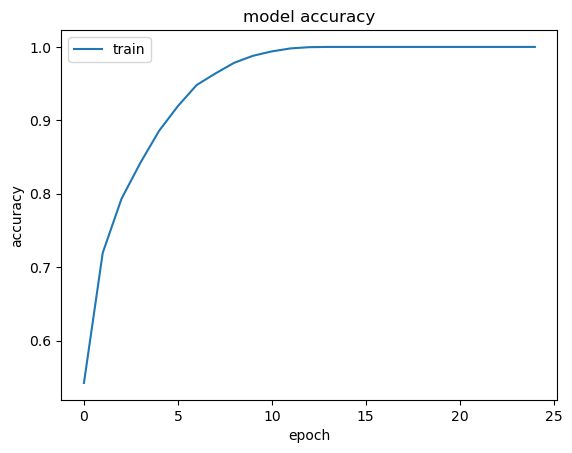

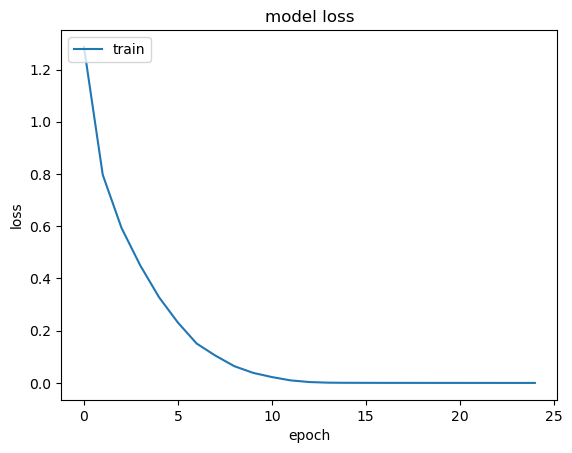

313/313 [==============================] - 2s 5ms/step - loss: 1.0899 - accuracy: 0.8034
> 80.340
1563/1563 [==============================] - 7s 5ms/step - loss: 1.6724e-04 - accuracy: 1.0000
> 100.000


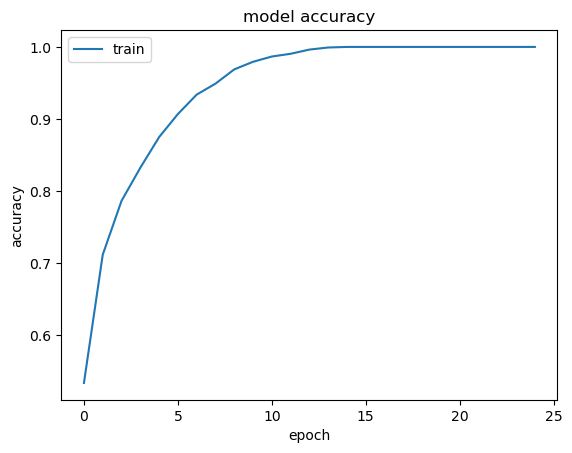

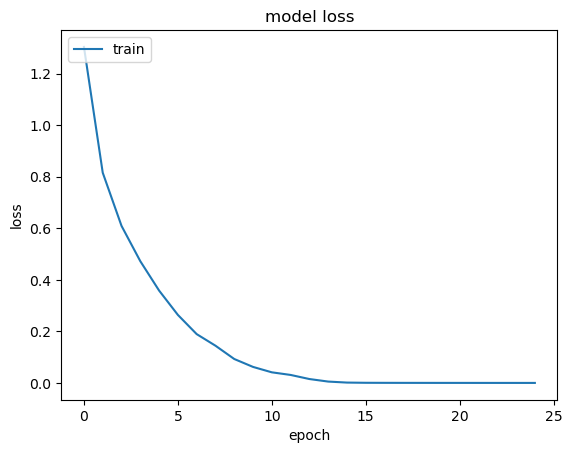

313/313 [==============================] - 2s 5ms/step - loss: 1.0407 - accuracy: 0.8087
> 80.870
1563/1563 [==============================] - 7s 4ms/step - loss: 2.1009e-04 - accuracy: 1.0000
> 100.000


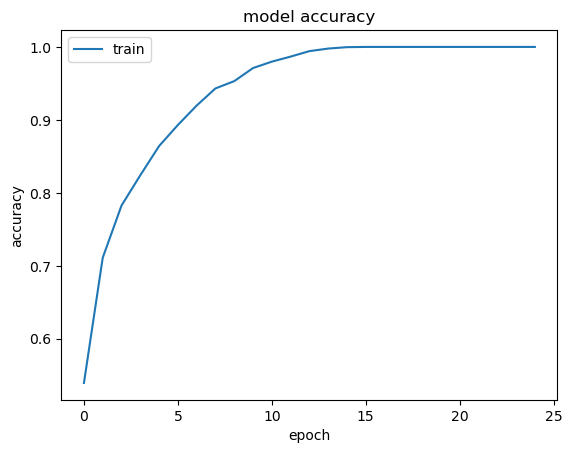

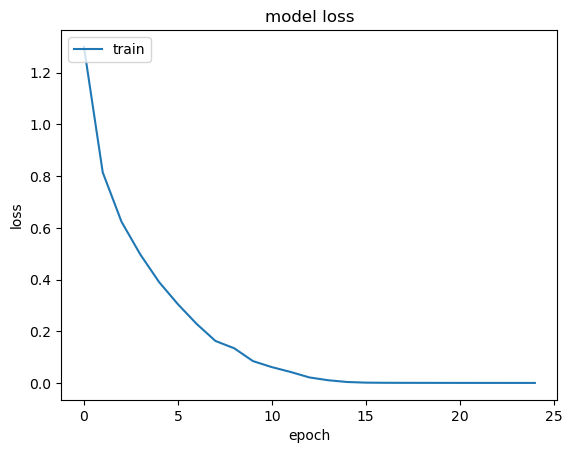

313/313 [==============================] - 2s 4ms/step - loss: 1.0771 - accuracy: 0.8127
> 81.270
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8814e-04 - accuracy: 1.0000
> 100.000


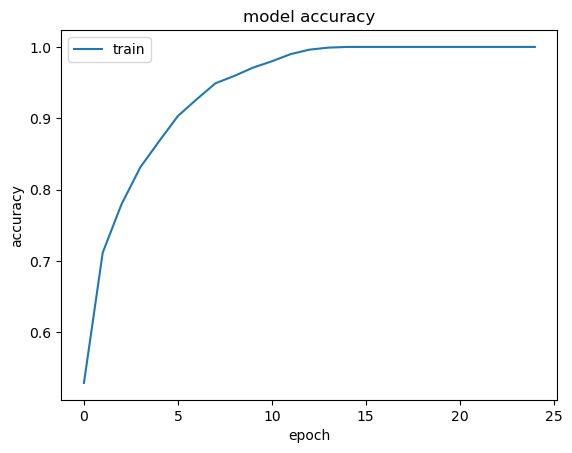

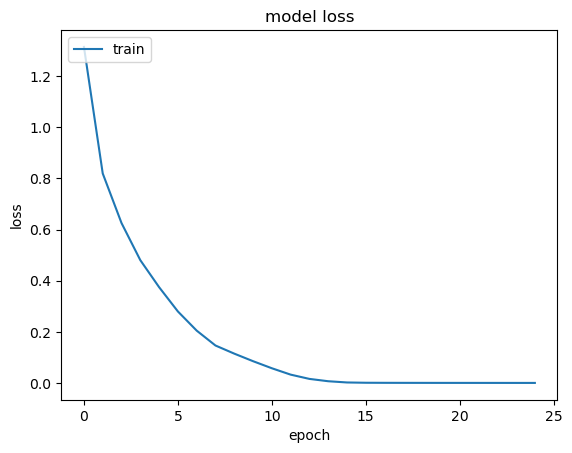

313/313 [==============================] - 2s 4ms/step - loss: 1.0821 - accuracy: 0.8031
> 80.310
1563/1563 [==============================] - 8s 5ms/step - loss: 2.1452e-04 - accuracy: 1.0000
> 100.000


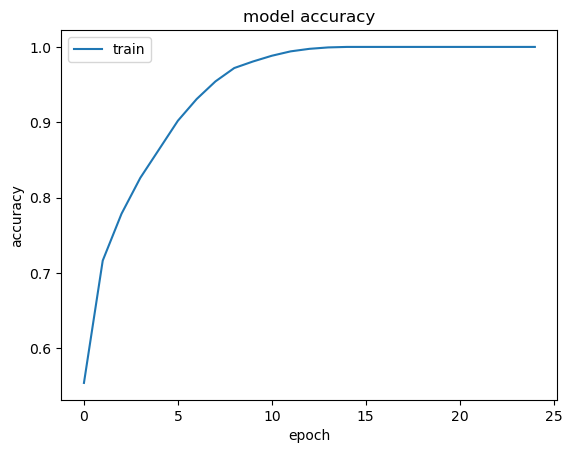

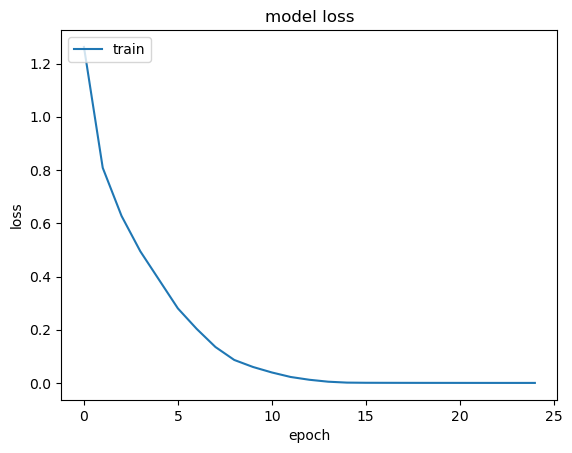

313/313 [==============================] - 2s 4ms/step - loss: 1.0769 - accuracy: 0.8068
> 80.680
1563/1563 [==============================] - 8s 5ms/step - loss: 2.6214e-04 - accuracy: 1.0000
> 100.000


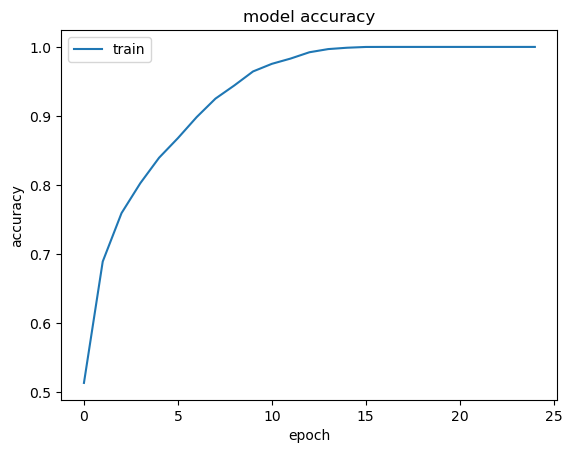

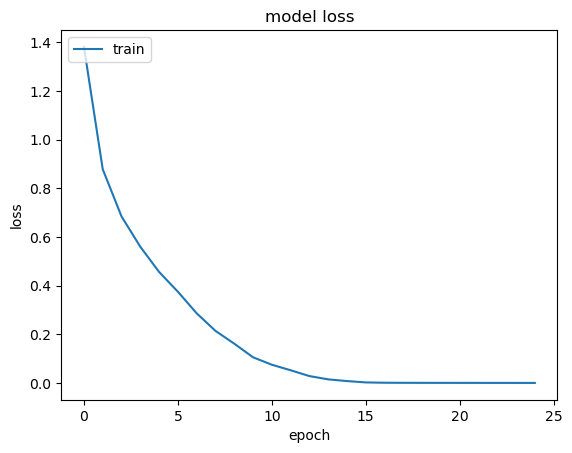

313/313 [==============================] - 2s 5ms/step - loss: 1.0729 - accuracy: 0.8011
> 80.110
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8561e-04 - accuracy: 1.0000
> 100.000


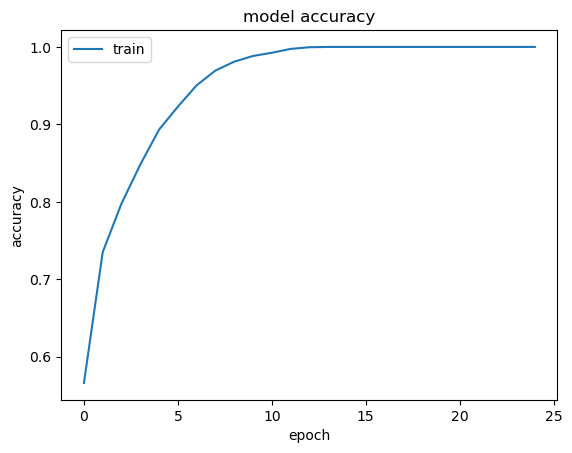

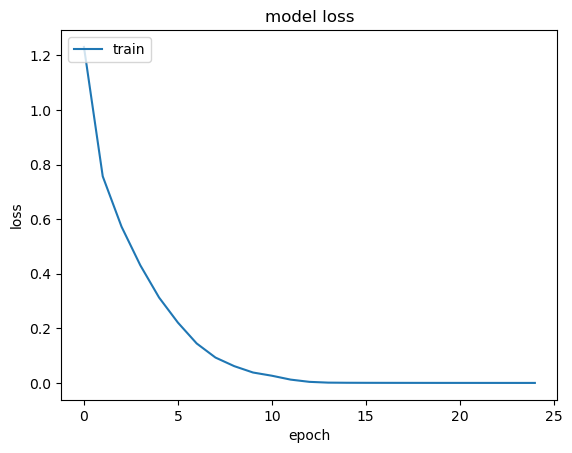

313/313 [==============================] - 2s 5ms/step - loss: 1.4990 - accuracy: 0.7255
> 72.550
1563/1563 [==============================] - 7s 5ms/step - loss: 0.1771 - accuracy: 0.9406
> 94.058


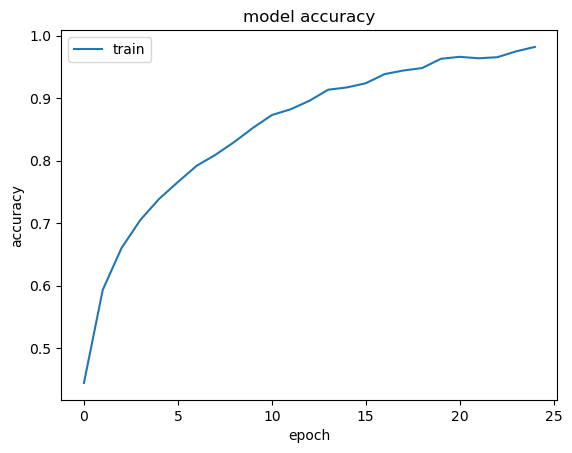

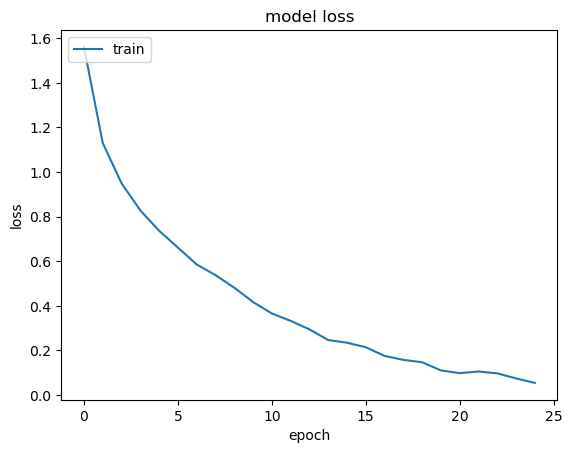

2023-04-15 14:58:19.320254: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape ingradient_tape/sequential_8/conv2d_53/ta_lu/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


313/313 [==============================] - 2s 5ms/step - loss: 1.3670 - accuracy: 0.7764
> 77.640
1563/1563 [==============================] - 7s 5ms/step - loss: 3.6449e-04 - accuracy: 1.0000
> 99.998


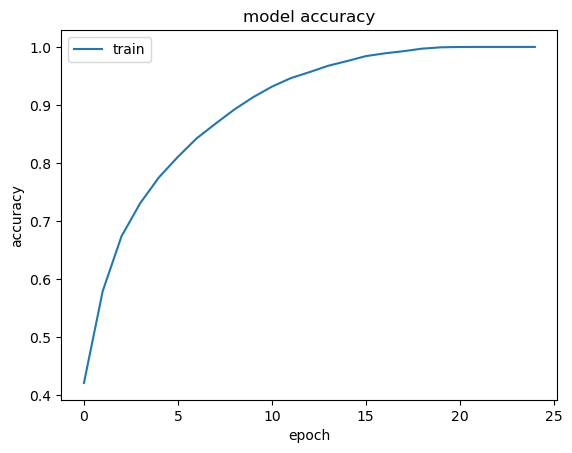

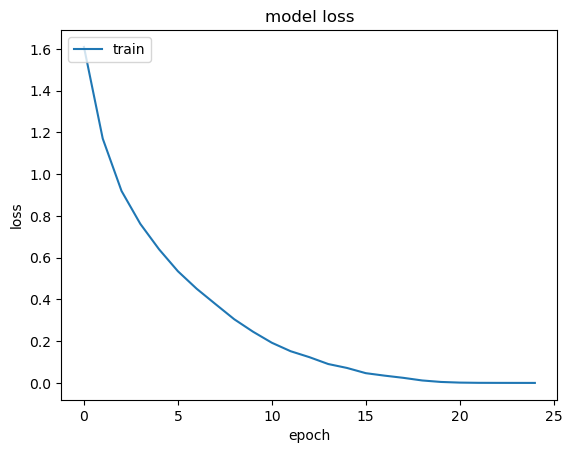

In [5]:

# run the test harness for evaluating a model
def run_test_harness(act):
    # load dataset
    trainX, trainY, testX, testY = load_dataset(d='cifar10')
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # define model
    model = define_model_simple_cifar_batch(act, 0.1)
    # fit model
    history=model.fit(trainX, trainY, epochs=25, batch_size=512, verbose=0)
    _, acc = model.evaluate(testX, testY, verbose=1)
    print('> %.3f' % (acc * 100.0))
    _, acc2 = model.evaluate(trainX, trainY, verbose=1)
    print('> %.3f' % (acc2 * 100.0))
    # save model
    #model.save('final_model.h5')
    return model,history, acc




hist = []
accuracy = []
act = [tf.keras.activations.swish, tf.keras.activations.gelu, tf.keras.layers.LeakyReLU(alpha=0.1), 'relu', 'elu', 'selu', 'softplus', 'softsign', TaLU(alpha=0.0, trainable=True)]
#act = [TaLU(alpha=0.0, trainable=True)]
for i in act:
    # entry point, run the test harness
    model, history, acc = run_test_harness(act=i)
    hist.append(history)
    accuracy.append(acc)
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    #plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    #plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

# lr=0.01 CIFAR Batch Norm

313/313 [==============================] - 2s 4ms/step - loss: 1.3202 - accuracy: 0.7080
> 70.800
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0040 - accuracy: 1.0000
> 100.000


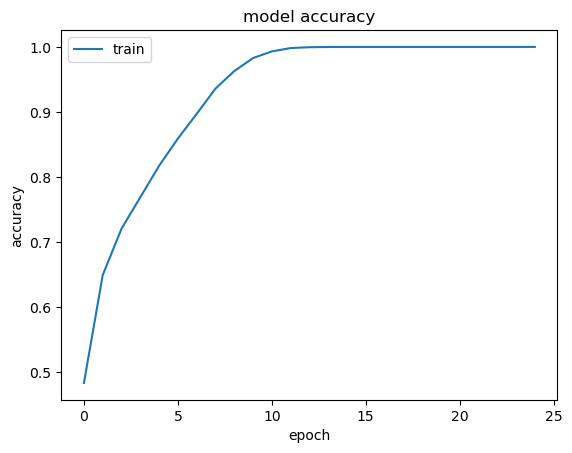

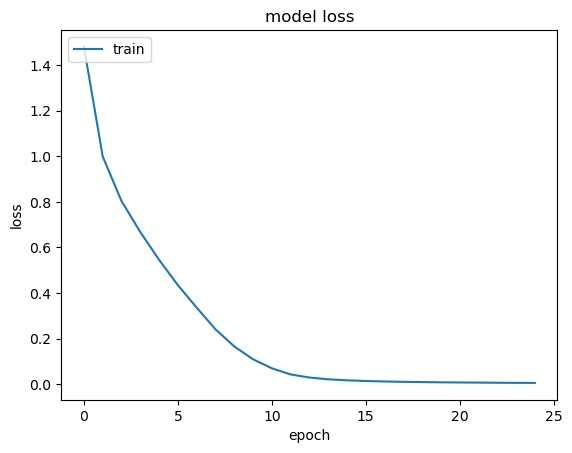

313/313 [==============================] - 2s 5ms/step - loss: 1.3152 - accuracy: 0.7096
> 70.960
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0036 - accuracy: 1.0000
> 100.000


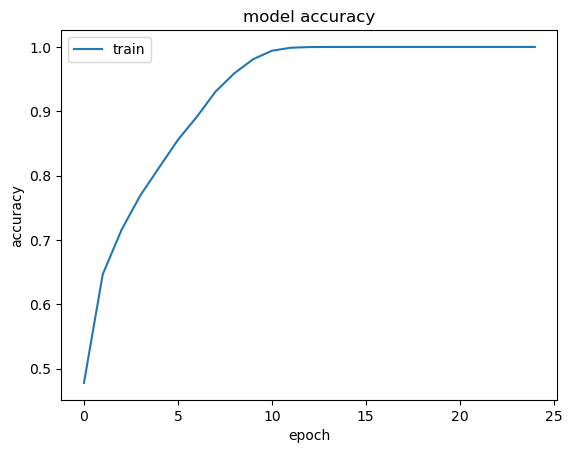

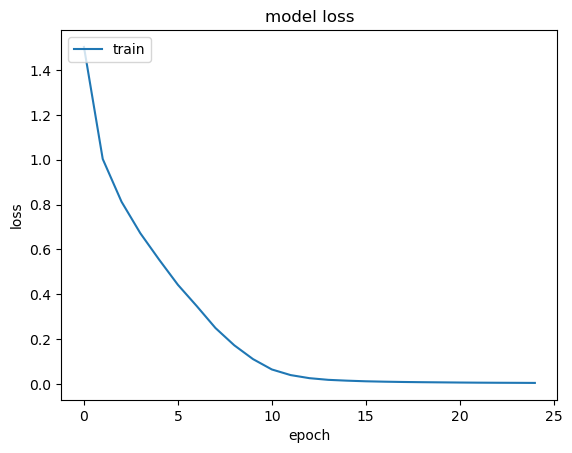

313/313 [==============================] - 2s 4ms/step - loss: 1.2908 - accuracy: 0.7129
> 71.290
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0040 - accuracy: 1.0000
> 100.000


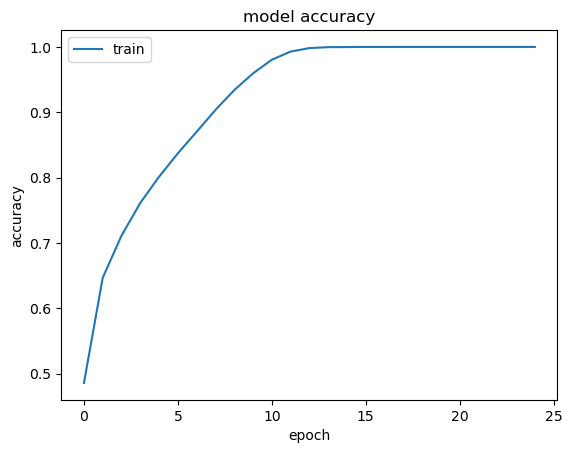

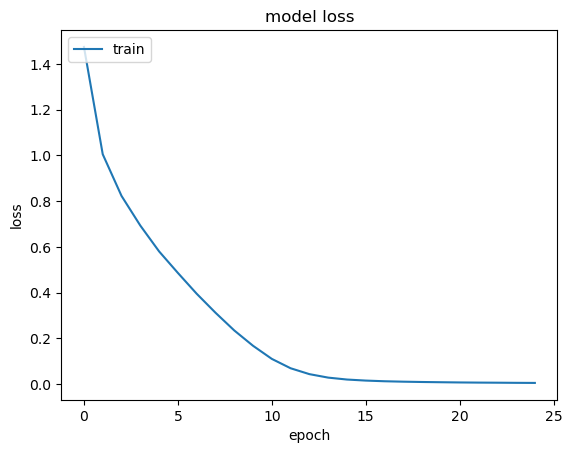

313/313 [==============================] - 2s 4ms/step - loss: 1.3015 - accuracy: 0.7071
> 70.710
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0038 - accuracy: 1.0000
> 100.000


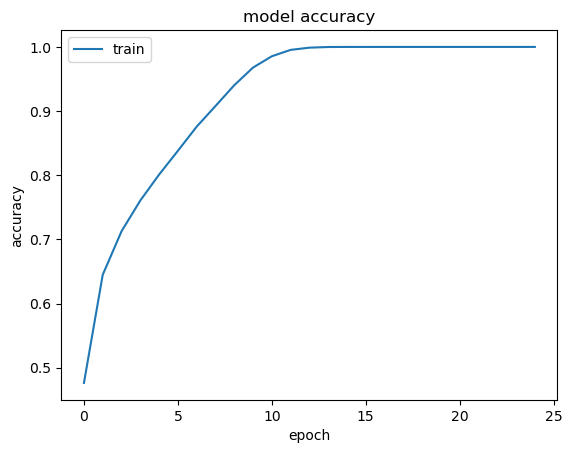

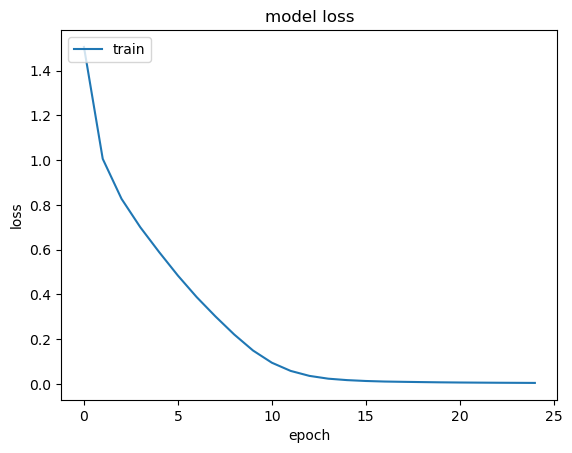

313/313 [==============================] - 2s 4ms/step - loss: 1.2404 - accuracy: 0.7198
> 71.980
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0048 - accuracy: 1.0000
> 100.000


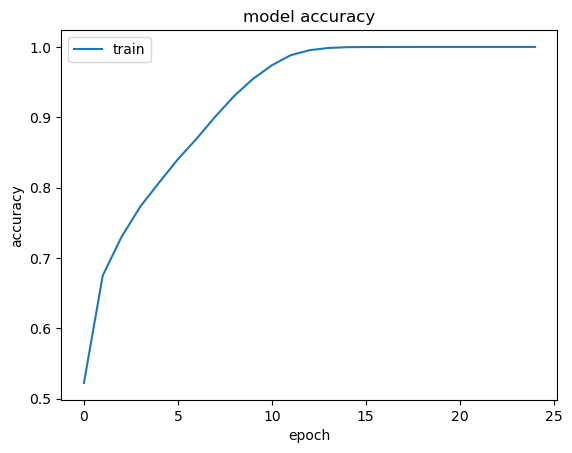

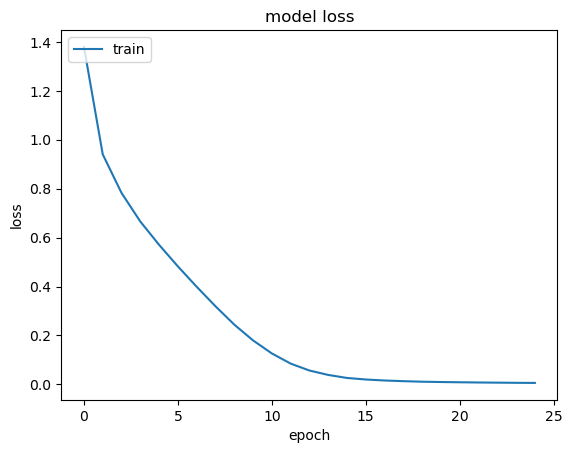

313/313 [==============================] - 2s 4ms/step - loss: 1.2352 - accuracy: 0.7225
> 72.250
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0055 - accuracy: 1.0000
> 100.000


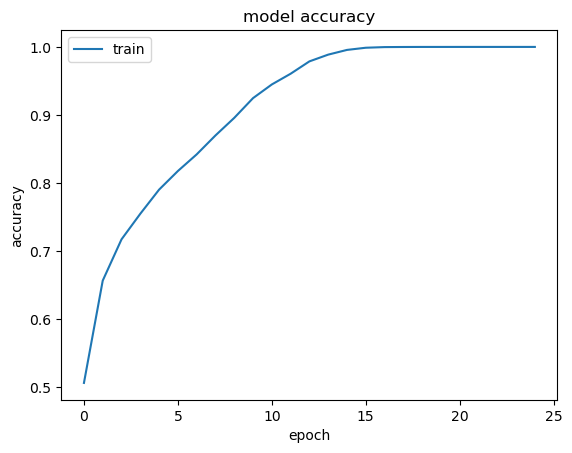

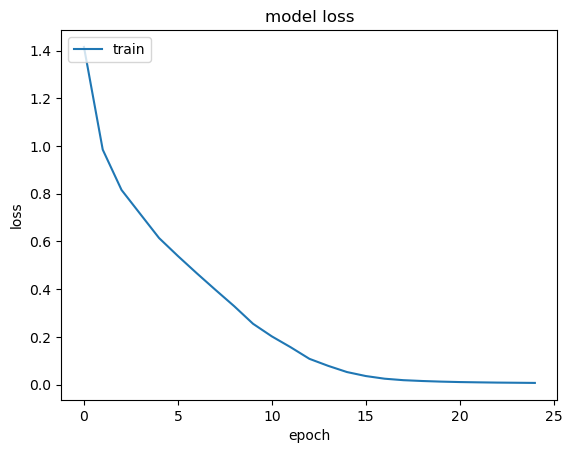

313/313 [==============================] - 2s 5ms/step - loss: 1.2431 - accuracy: 0.7215
> 72.150
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0047 - accuracy: 1.0000
> 100.000


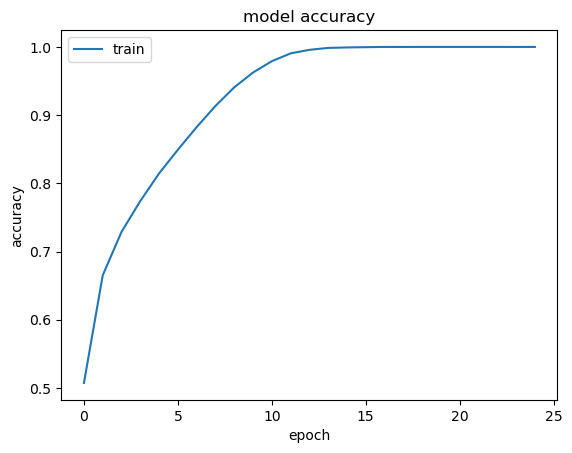

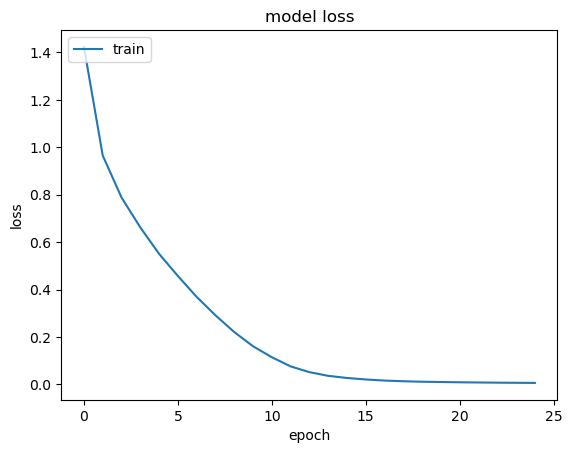

313/313 [==============================] - 2s 5ms/step - loss: 1.3801 - accuracy: 0.6904
> 69.040
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0049 - accuracy: 1.0000
> 100.000


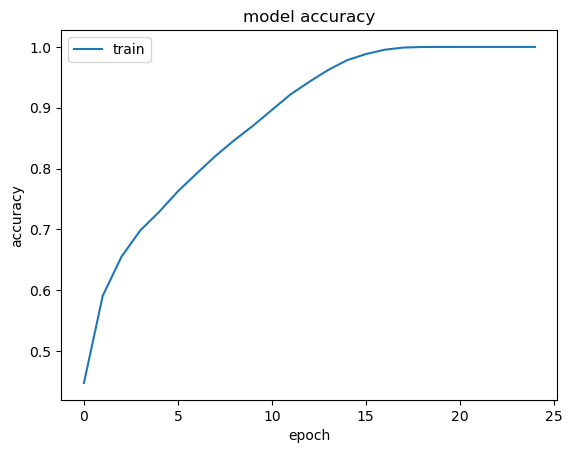

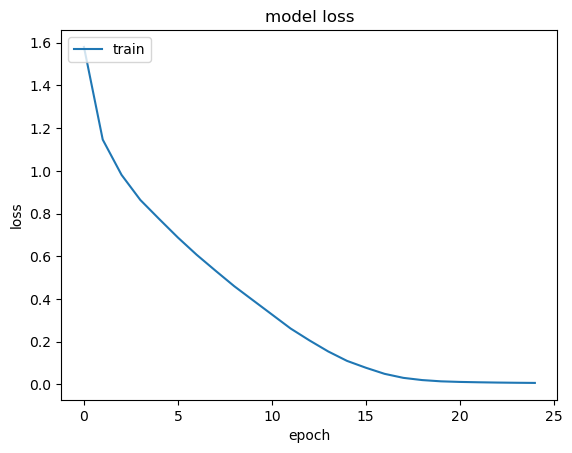

2023-04-15 15:24:50.292774: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape ingradient_tape/sequential_17/conv2d_107/ta_lu_1/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


313/313 [==============================] - 2s 5ms/step - loss: 1.2131 - accuracy: 0.7298
> 72.980
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0051 - accuracy: 1.0000
> 100.000


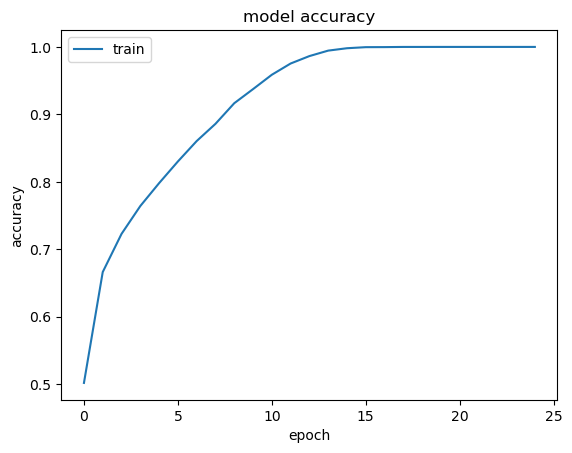

In [6]:

# run the test harness for evaluating a model
def run_test_harness(act):
    # load dataset
    trainX, trainY, testX, testY = load_dataset(d='cifar10')
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # define model
    model = define_model_simple_cifar_batch(act, 0.01)
    # fit model
    history=model.fit(trainX, trainY, epochs=25, batch_size=512, verbose=0)
    _, acc = model.evaluate(testX, testY, verbose=1)
    print('> %.3f' % (acc * 100.0))
    _, acc2 = model.evaluate(trainX, trainY, verbose=1)
    print('> %.3f' % (acc2 * 100.0))
    # save model
    #model.save('final_model.h5')
    return model,history, acc




hist = []
accuracy = []
act = [tf.keras.activations.swish, tf.keras.activations.gelu, tf.keras.layers.LeakyReLU(alpha=0.1), 'relu', 'elu', 'selu', 'softplus', 'softsign', TaLU(alpha=0.0, trainable=True)]
#act = [TaLU(alpha=0.0, trainable=True)]
for i in act:
    # entry point, run the test harness
    model, history, acc = run_test_harness(act=i)
    hist.append(history)
    accuracy.append(acc)
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    #plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    #plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

# lr=0.1 CIFAR No batch

313/313 [==============================] - 2s 4ms/step - loss: 1.6232 - accuracy: 0.7749
> 77.490
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0042 - accuracy: 0.9989
> 99.892


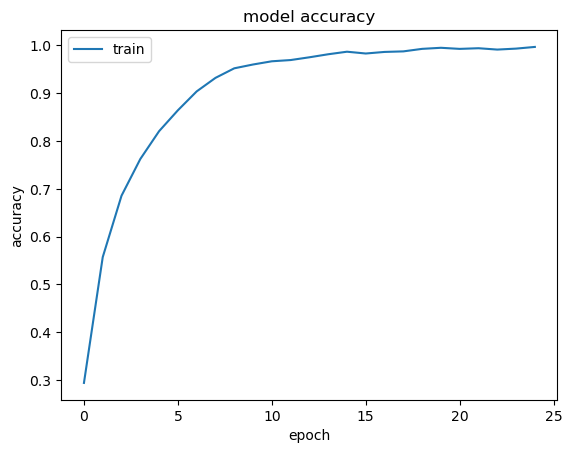

313/313 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.1000
> 10.000
1563/1563 [==============================] - 7s 4ms/step - loss: nan - accuracy: 0.1000
> 10.000


313/313 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.1000
> 10.000
1563/1563 [==============================] - 6s 4ms/step - loss: nan - accuracy: 0.1000
> 10.000


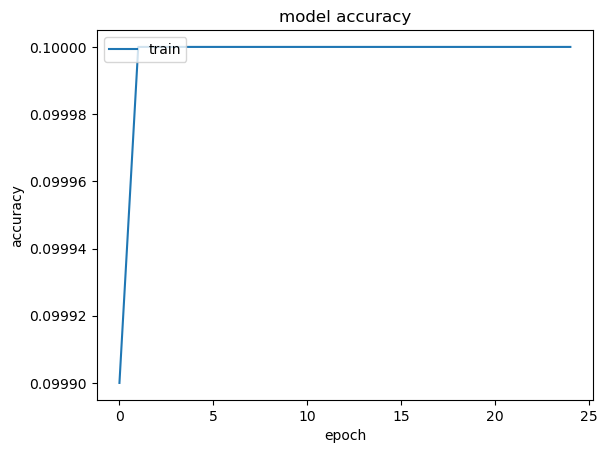

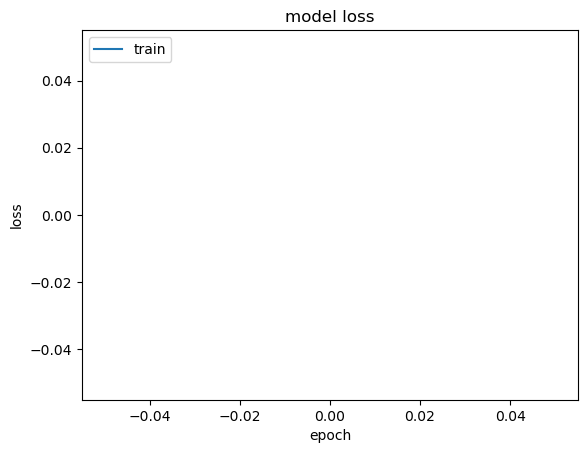

313/313 [==============================] - 1s 4ms/step - loss: 1.4092 - accuracy: 0.6958
> 69.580
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2042 - accuracy: 0.9276
> 92.760


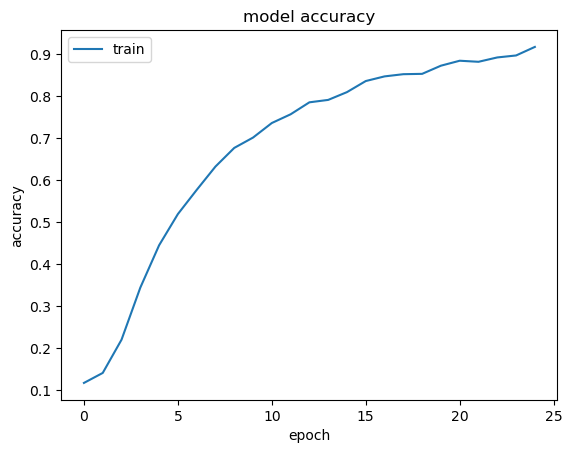

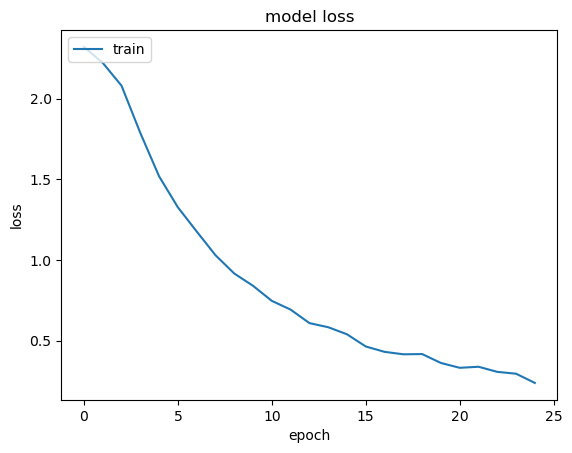

313/313 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.1000
> 10.000
1563/1563 [==============================] - 6s 4ms/step - loss: nan - accuracy: 0.1000
> 10.000


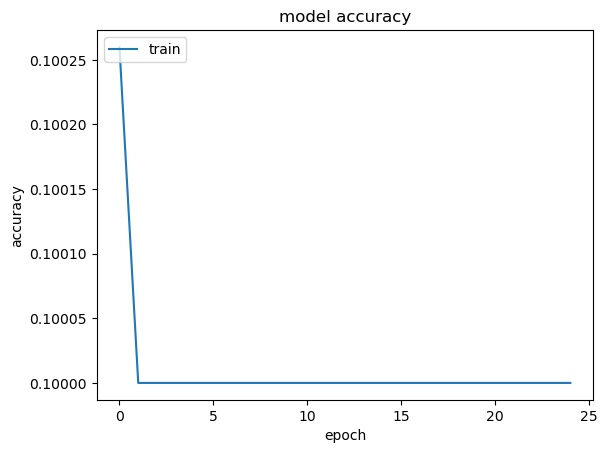

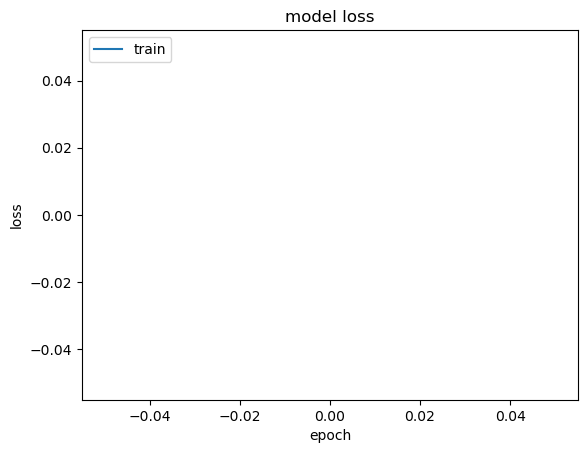

313/313 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.1000
> 10.000
1563/1563 [==============================] - 6s 4ms/step - loss: nan - accuracy: 0.1000
> 10.000


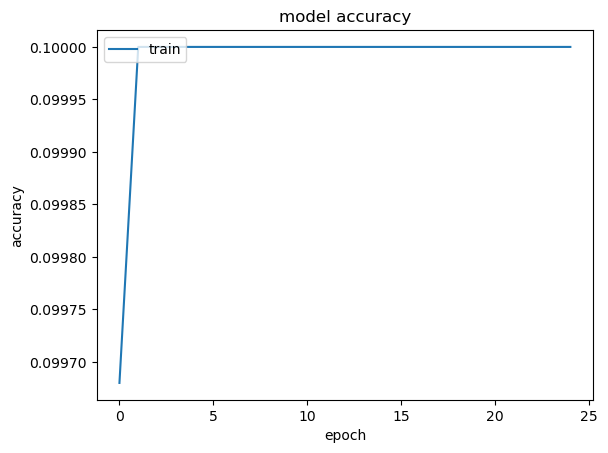

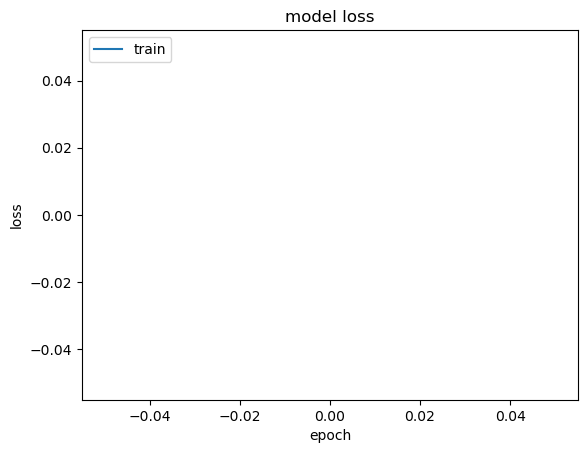

313/313 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.1000
> 10.000
1563/1563 [==============================] - 6s 4ms/step - loss: nan - accuracy: 0.1000
> 10.000


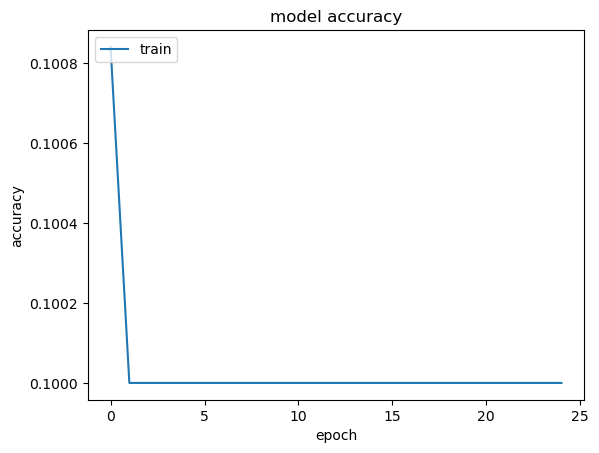

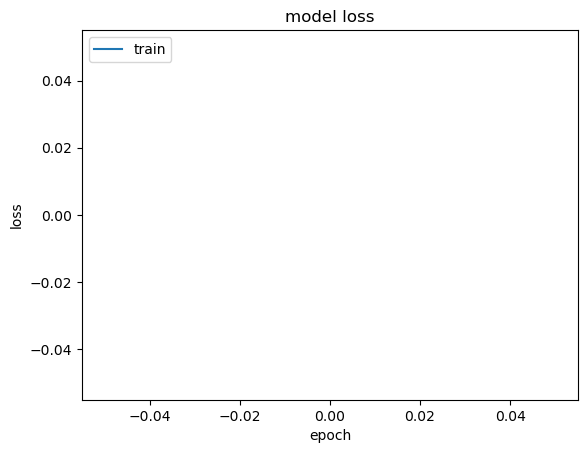

313/313 [==============================] - 2s 5ms/step - loss: 1.0987 - accuracy: 0.7662
> 76.620
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0026 - accuracy: 1.0000
> 100.000


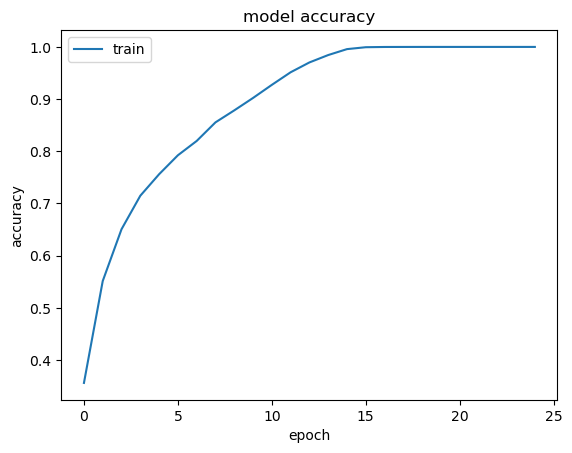

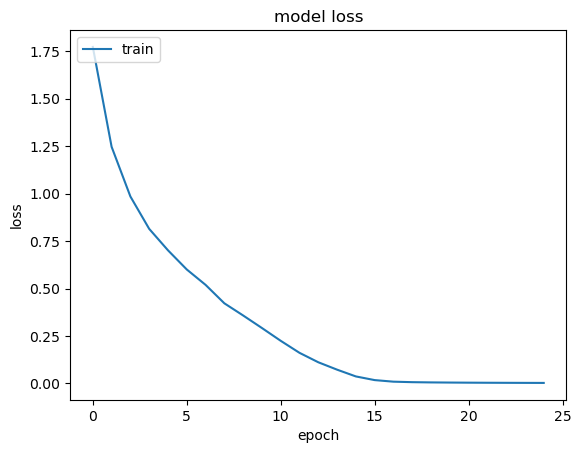

2023-04-15 15:50:27.421505: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape ingradient_tape/sequential_26/conv2d_161/ta_lu_2/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


313/313 [==============================] - 2s 5ms/step - loss: nan - accuracy: 0.1000
> 10.000
1563/1563 [==============================] - 7s 4ms/step - loss: nan - accuracy: 0.1000
> 10.000


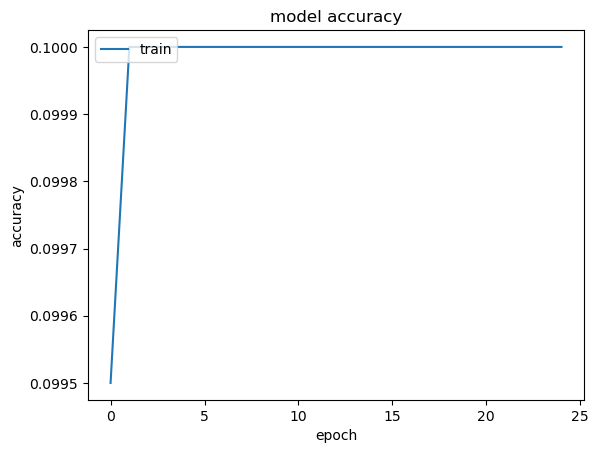

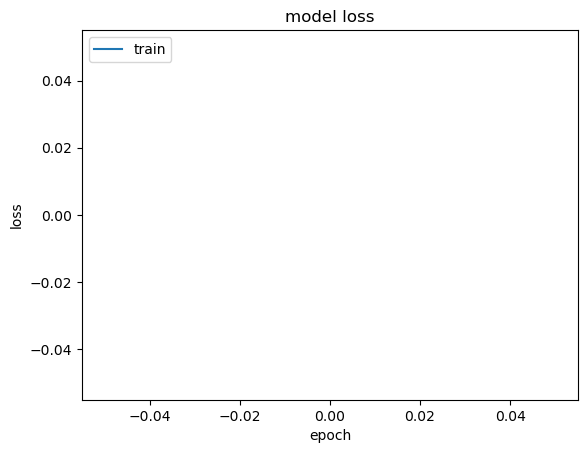

In [7]:

# run the test harness for evaluating a model
def run_test_harness(act):
    # load dataset
    trainX, trainY, testX, testY = load_dataset(d='cifar10')
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # define model
    model = define_model_simple_cifar_no_batch(act, 0.1)
    # fit model
    history=model.fit(trainX, trainY, epochs=25, batch_size=512, verbose=0)
    _, acc = model.evaluate(testX, testY, verbose=1)
    print('> %.3f' % (acc * 100.0))
    _, acc2 = model.evaluate(trainX, trainY, verbose=1)
    print('> %.3f' % (acc2 * 100.0))
    # save model
    #model.save('final_model.h5')
    return model,history, acc




hist = []
accuracy = []
act = [tf.keras.activations.swish, tf.keras.activations.gelu, tf.keras.layers.LeakyReLU(alpha=0.1), 'relu', 'elu', 'selu', 'softplus', 'softsign', TaLU(alpha=0.0, trainable=True)]
#act = [TaLU(alpha=0.0, trainable=True)]
for i in act:
    # entry point, run the test harness
    model, history, acc = run_test_harness(act=i)
    hist.append(history)
    accuracy.append(acc)
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    #plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    #plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

# lr=0.01 CIFAR No batch

313/313 [==============================] - 2s 4ms/step - loss: 2.4103 - accuracy: 0.6764
> 67.640
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0032 - accuracy: 0.9998
> 99.984


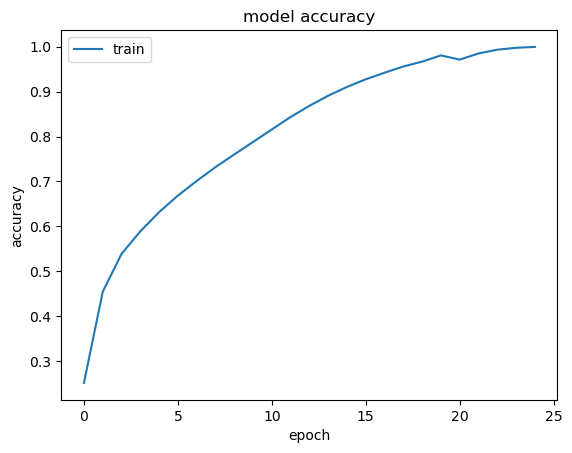

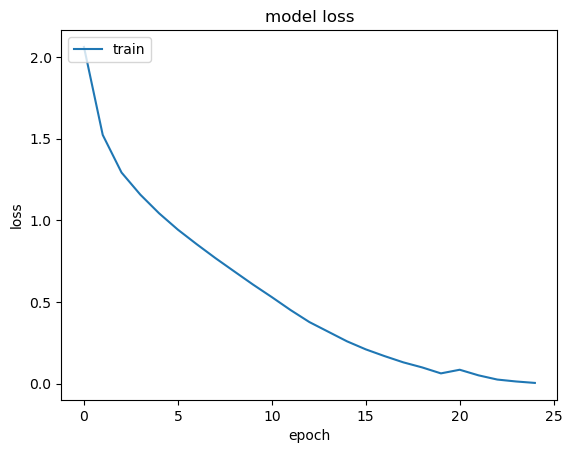

313/313 [==============================] - 2s 5ms/step - loss: 2.1399 - accuracy: 0.6633
> 66.330
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0431 - accuracy: 0.9867
> 98.672


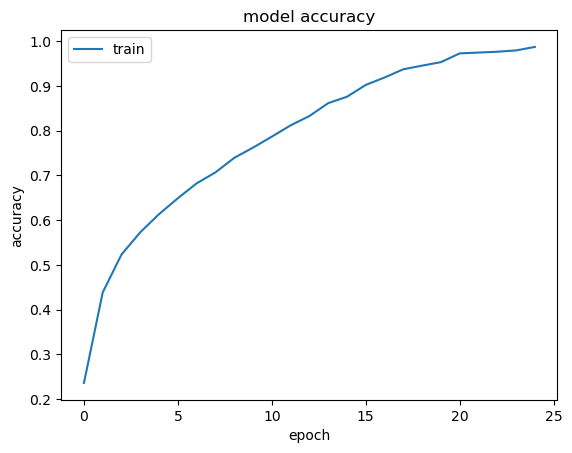

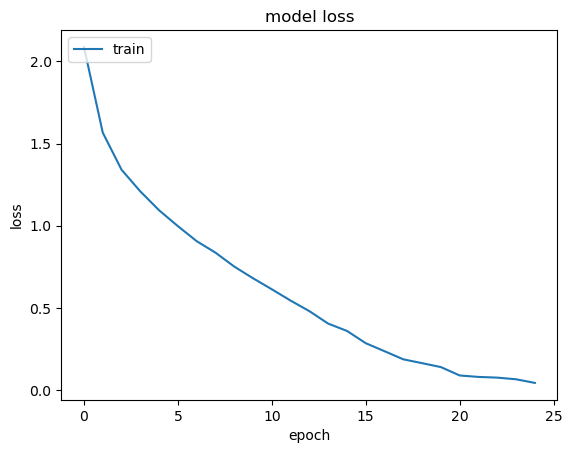

313/313 [==============================] - 1s 4ms/step - loss: 1.4913 - accuracy: 0.7265
> 72.650
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0598 - accuracy: 0.9811
> 98.112


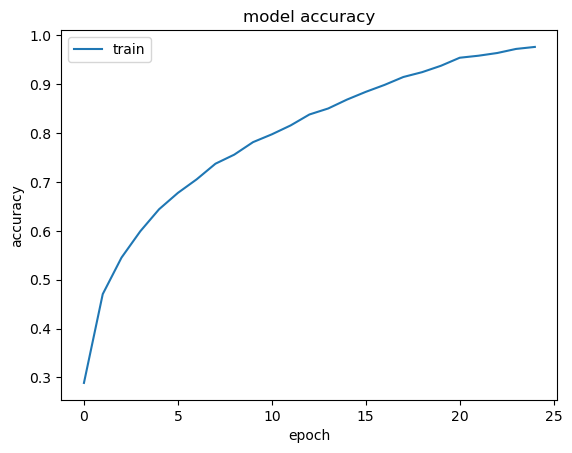

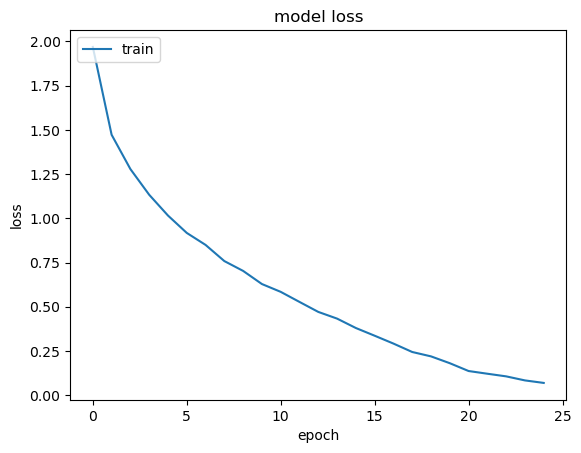

313/313 [==============================] - 1s 4ms/step - loss: 1.7645 - accuracy: 0.6953
> 69.530
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1070 - accuracy: 0.9613
> 96.132


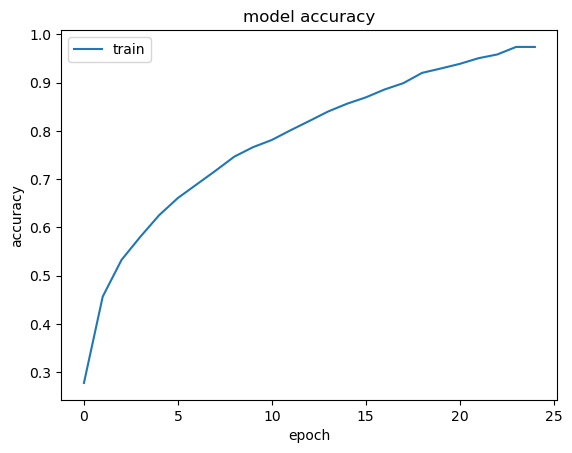

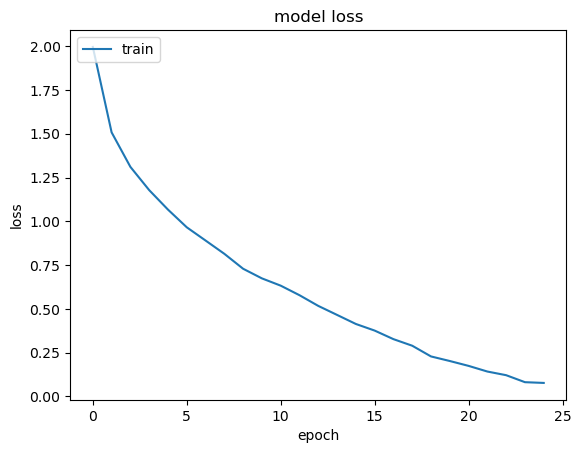

313/313 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.1000
> 10.000
1563/1563 [==============================] - 7s 4ms/step - loss: nan - accuracy: 0.1000
> 10.000


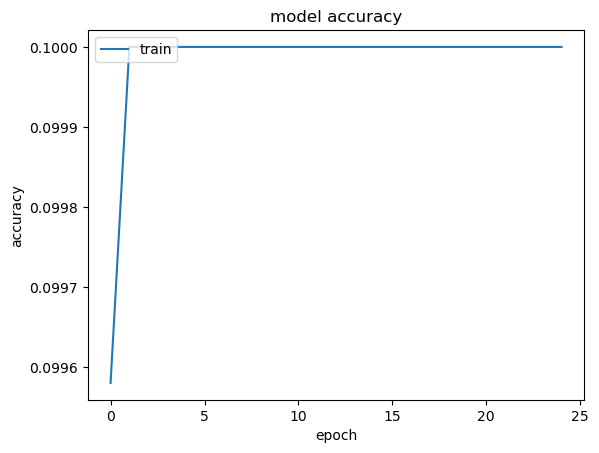

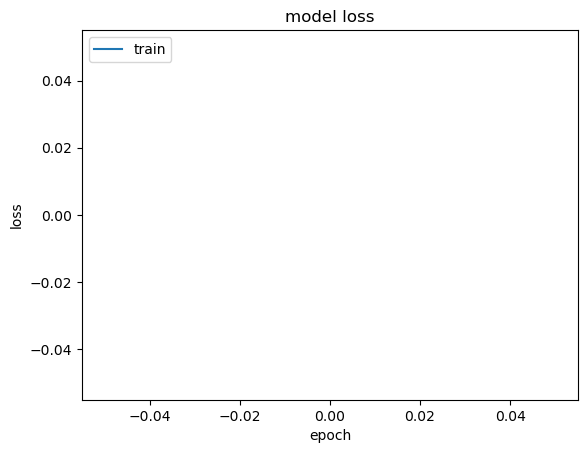

313/313 [==============================] - 2s 5ms/step - loss: 6350495023104.0000 - accuracy: 0.1000
> 10.000
1563/1563 [==============================] - 6s 4ms/step - loss: 6350494498816.0000 - accuracy: 0.1000
> 10.000


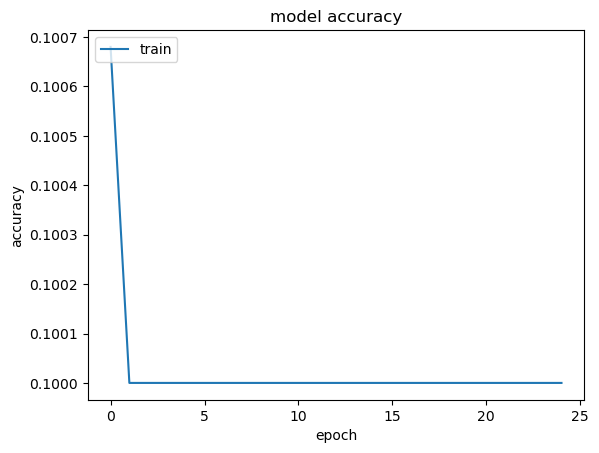

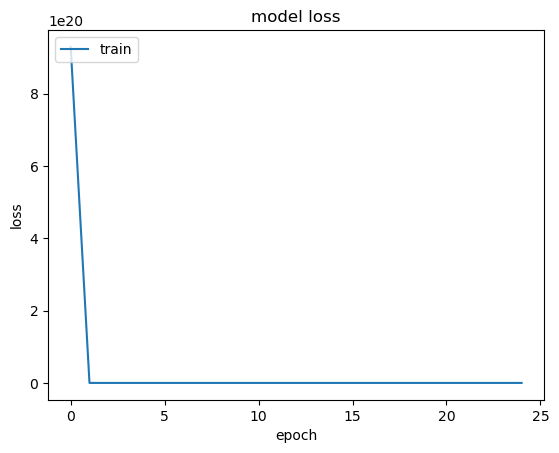

313/313 [==============================] - 2s 5ms/step - loss: 1.1730 - accuracy: 0.5923
> 59.230
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8041 - accuracy: 0.7179
> 71.788


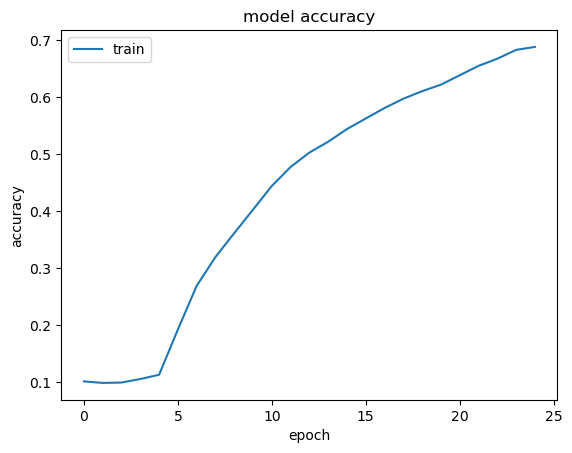

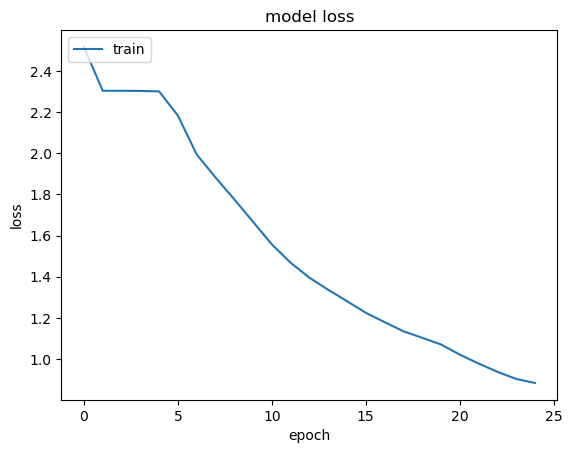

313/313 [==============================] - 2s 4ms/step - loss: 0.7050 - accuracy: 0.7570
> 75.700
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4194 - accuracy: 0.8700
> 87.004


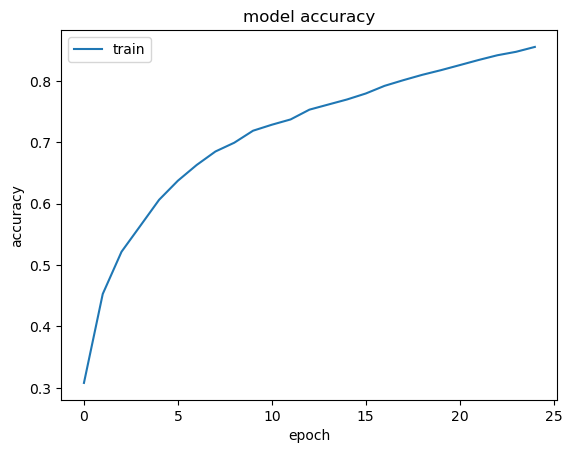

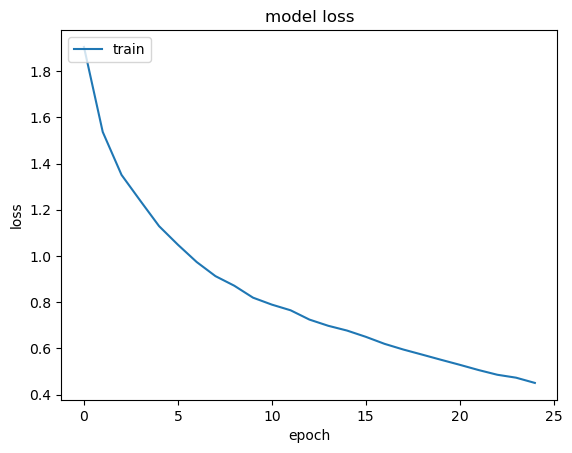

2023-04-15 16:12:41.737228: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape ingradient_tape/sequential_35/conv2d_215/ta_lu_3/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


313/313 [==============================] - 2s 5ms/step - loss: 1.6579 - accuracy: 0.7399
> 73.990
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0018 - accuracy: 1.0000
> 100.000


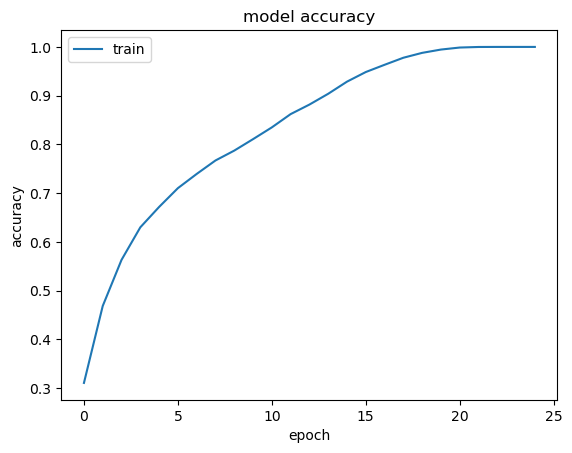

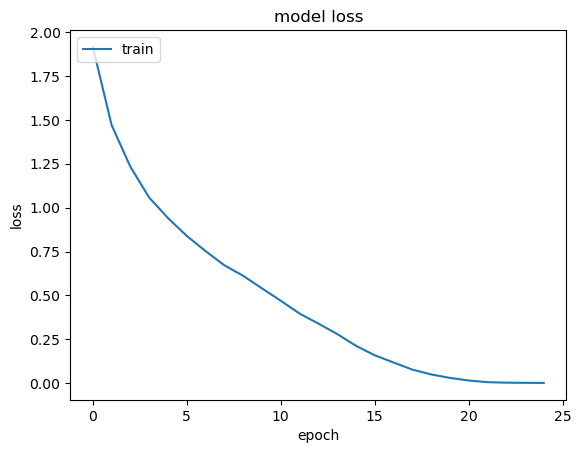

In [8]:

# run the test harness for evaluating a model
def run_test_harness(act):
    # load dataset
    trainX, trainY, testX, testY = load_dataset(d='cifar10')
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # define model
    model = define_model_simple_cifar_no_batch(act, 0.01)
    # fit model
    history=model.fit(trainX, trainY, epochs=25, batch_size=512, verbose=0)
    _, acc = model.evaluate(testX, testY, verbose=1)
    print('> %.3f' % (acc * 100.0))
    _, acc2 = model.evaluate(trainX, trainY, verbose=1)
    print('> %.3f' % (acc2 * 100.0))
    # save model
    #model.save('final_model.h5')
    return model,history, acc




hist = []
accuracy = []
act = [tf.keras.activations.swish, tf.keras.activations.gelu, tf.keras.layers.LeakyReLU(alpha=0.1), 'relu', 'elu', 'selu', 'softplus', 'softsign', TaLU(alpha=0.0, trainable=True)]
#act = [TaLU(alpha=0.0, trainable=True)]
for i in act:
    # entry point, run the test harness
    model, history, acc = run_test_harness(act=i)
    hist.append(history)
    accuracy.append(acc)
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    #plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    #plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

# lr=0.1 MNIST batch

313/313 [==============================] - 2s 5ms/step - loss: 0.0213 - accuracy: 0.9931
> 99.310
1875/1875 [==============================] - 9s 5ms/step - loss: 8.7593e-05 - accuracy: 1.0000
> 100.000


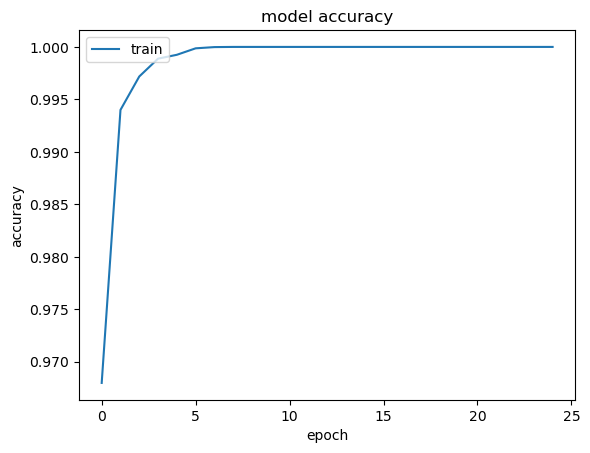

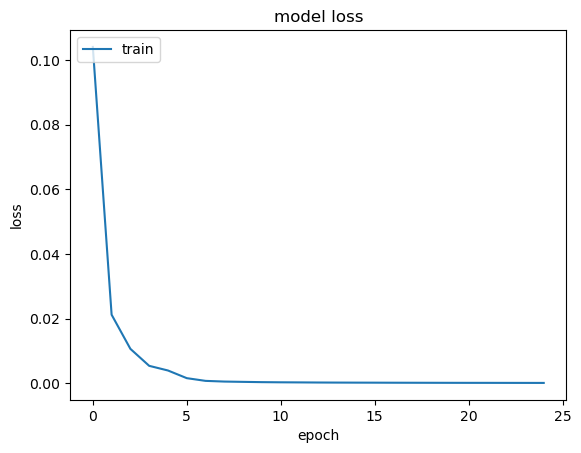

313/313 [==============================] - 2s 5ms/step - loss: 0.0188 - accuracy: 0.9946
> 99.460
1875/1875 [==============================] - 8s 4ms/step - loss: 8.5916e-05 - accuracy: 1.0000
> 100.000


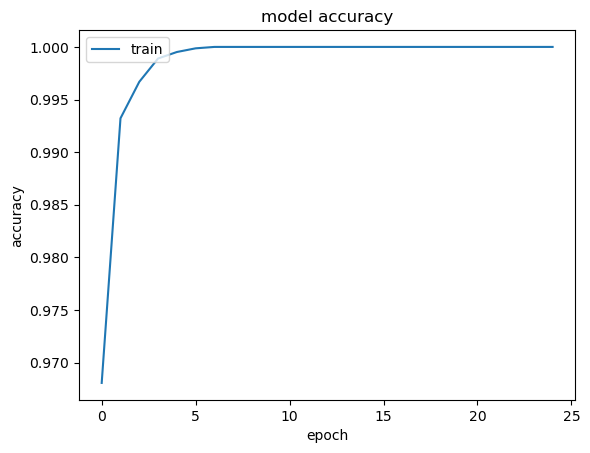

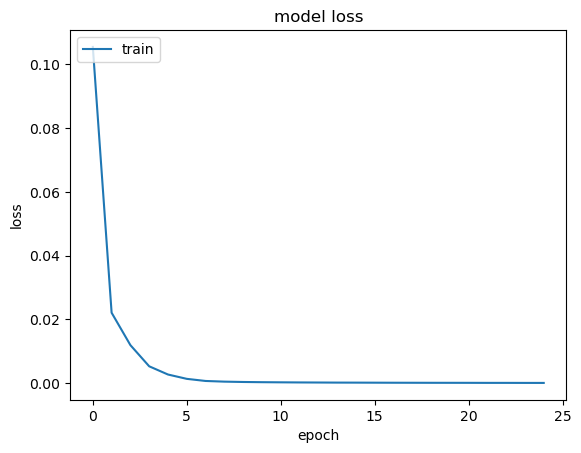

313/313 [==============================] - 2s 5ms/step - loss: 0.0206 - accuracy: 0.9944
> 99.440
1875/1875 [==============================] - 8s 4ms/step - loss: 1.0030e-04 - accuracy: 1.0000
> 100.000


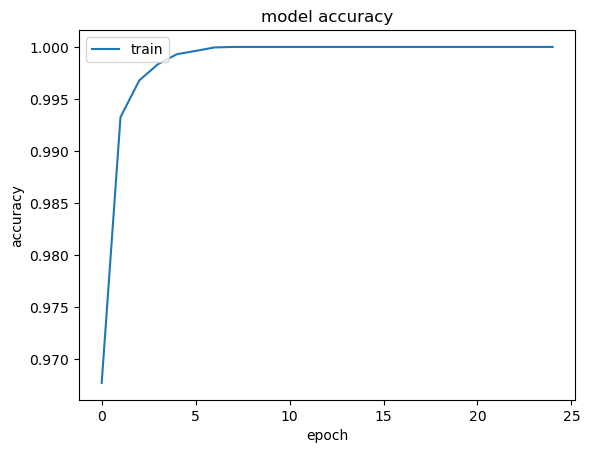

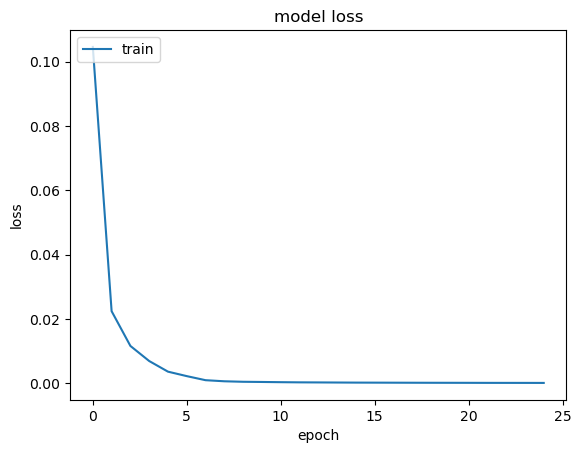

313/313 [==============================] - 2s 5ms/step - loss: 0.0230 - accuracy: 0.9934
> 99.340
1875/1875 [==============================] - 8s 4ms/step - loss: 9.4646e-05 - accuracy: 1.0000
> 100.000


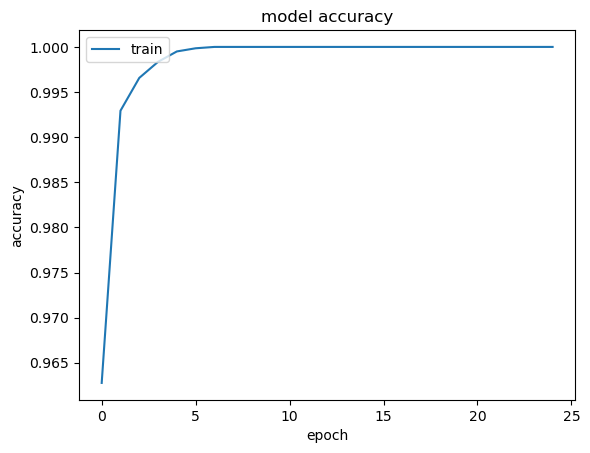

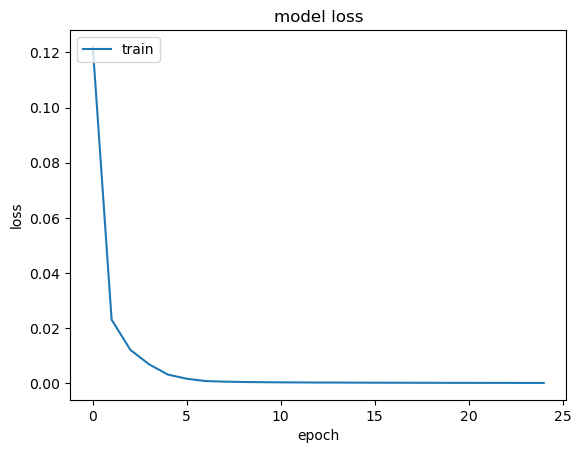

313/313 [==============================] - 2s 5ms/step - loss: 0.0213 - accuracy: 0.9940
> 99.400
1875/1875 [==============================] - 9s 5ms/step - loss: 9.9838e-05 - accuracy: 1.0000
> 100.000


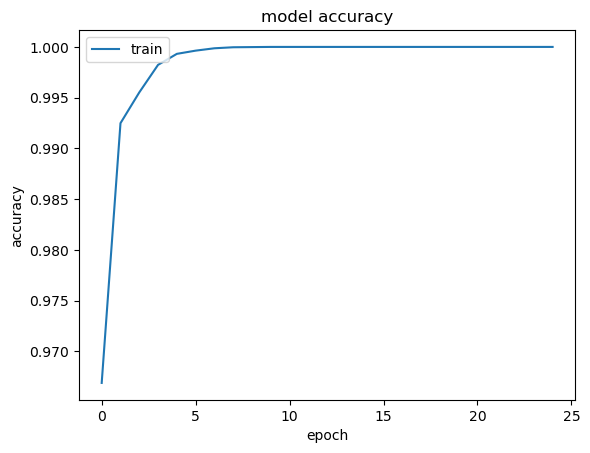

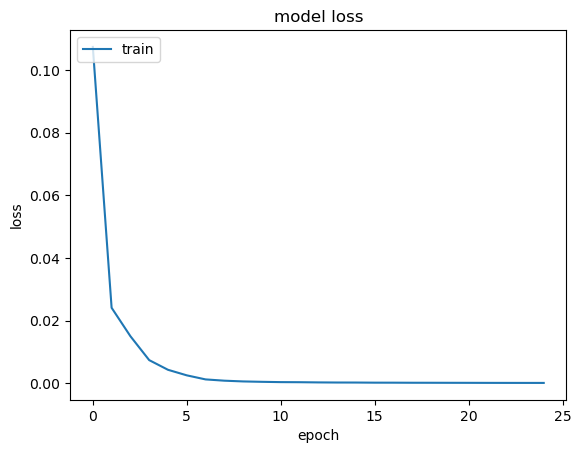

313/313 [==============================] - 2s 5ms/step - loss: 0.0199 - accuracy: 0.9943
> 99.430
1875/1875 [==============================] - 9s 5ms/step - loss: 1.0125e-04 - accuracy: 1.0000
> 100.000


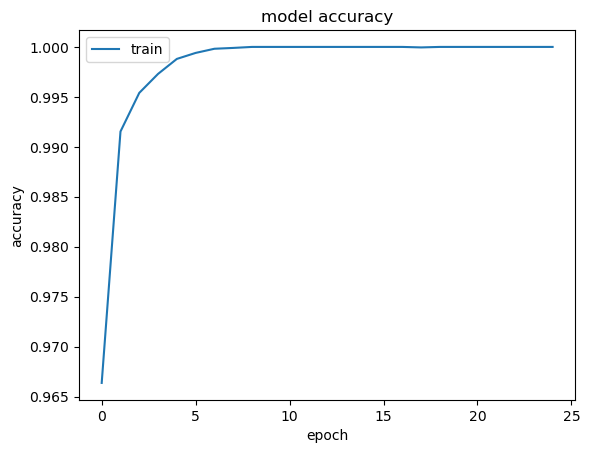

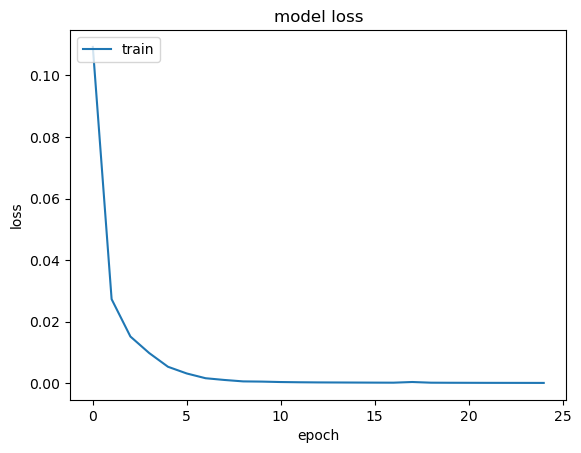

313/313 [==============================] - 2s 5ms/step - loss: 0.0186 - accuracy: 0.9941
> 99.410
1875/1875 [==============================] - 8s 5ms/step - loss: 9.0975e-05 - accuracy: 1.0000
> 100.000


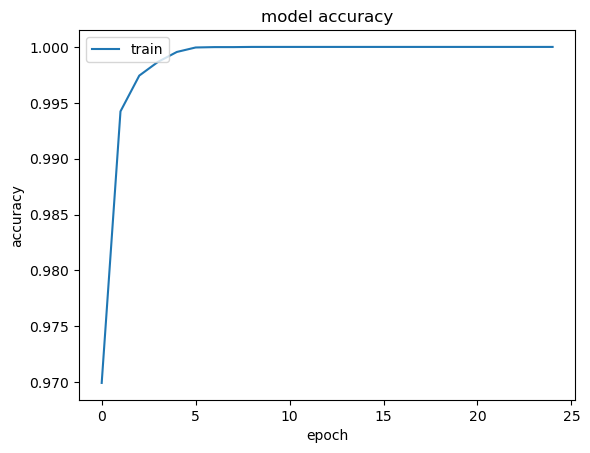

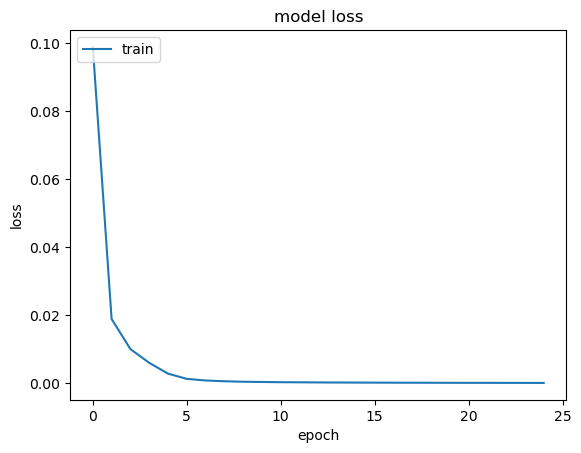

313/313 [==============================] - 2s 5ms/step - loss: 0.0262 - accuracy: 0.9921
> 99.210
1875/1875 [==============================] - 8s 4ms/step - loss: 7.4848e-05 - accuracy: 1.0000
> 100.000


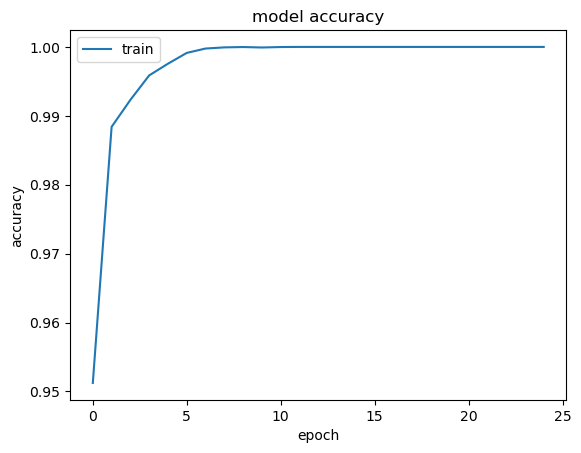

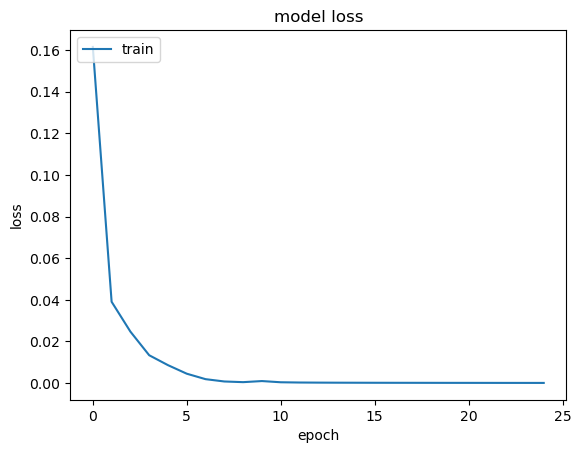

2023-04-15 16:37:57.695228: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape ingradient_tape/sequential_44/conv2d_269/ta_lu_4/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


313/313 [==============================] - 2s 5ms/step - loss: 0.0197 - accuracy: 0.9945
> 99.450
1875/1875 [==============================] - 8s 4ms/step - loss: 1.1019e-04 - accuracy: 1.0000
> 100.000


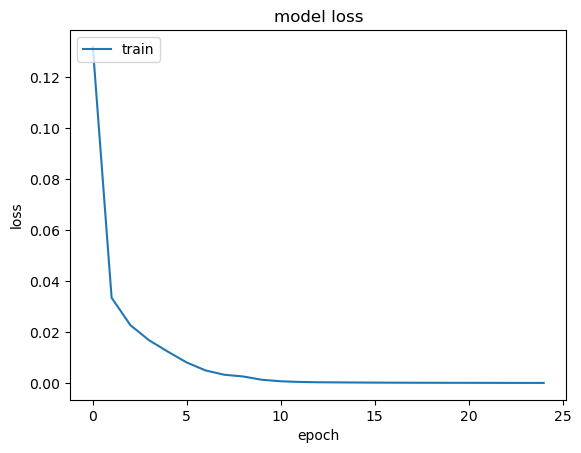

In [9]:

# run the test harness for evaluating a model
def run_test_harness(act):
    # load dataset
    trainX, trainY, testX, testY = load_dataset(d='mnist')
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # define model
    model = define_model_simple_mnist_batch(act, 0.1)
    # fit model
    history=model.fit(trainX, trainY, epochs=25, batch_size=512, verbose=0)
    _, acc = model.evaluate(testX, testY, verbose=1)
    print('> %.3f' % (acc * 100.0))
    _, acc2 = model.evaluate(trainX, trainY, verbose=1)
    print('> %.3f' % (acc2 * 100.0))
    # save model
    #model.save('final_model.h5')
    return model,history, acc




hist = []
accuracy = []
act = [tf.keras.activations.swish, tf.keras.activations.gelu, tf.keras.layers.LeakyReLU(alpha=0.1), 'relu', 'elu', 'selu', 'softplus', 'softsign', TaLU(alpha=0.0, trainable=True)]
#act = [TaLU(alpha=0.0, trainable=True)]
for i in act:
    # entry point, run the test harness
    model, history, acc = run_test_harness(act=i)
    hist.append(history)
    accuracy.append(acc)
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    #plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    #plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

# lr = 0.01 MNIST Batch

313/313 [==============================] - 2s 5ms/step - loss: 0.0239 - accuracy: 0.9918
> 99.180
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0011 - accuracy: 1.0000
> 100.000


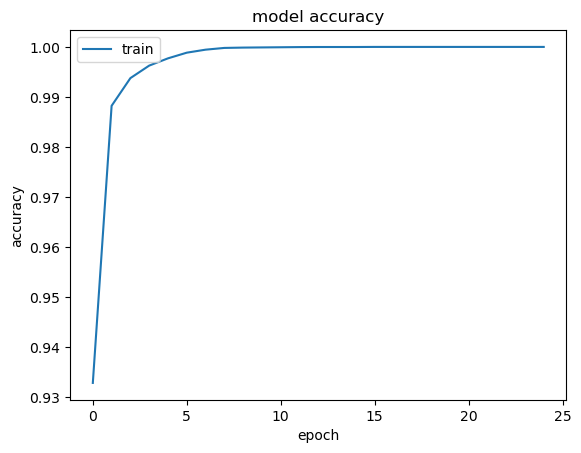

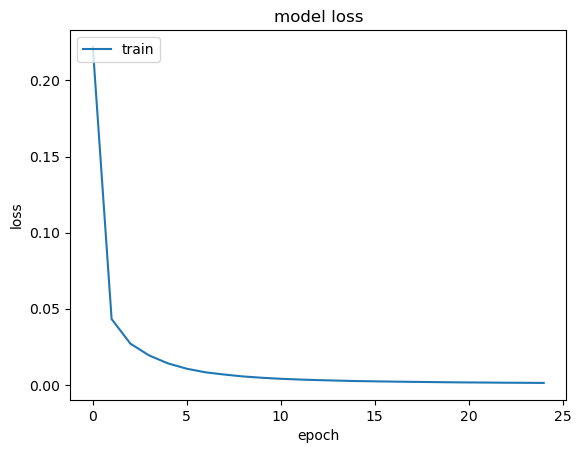

313/313 [==============================] - 2s 5ms/step - loss: 0.0260 - accuracy: 0.9919
> 99.190
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0012 - accuracy: 1.0000
> 100.000


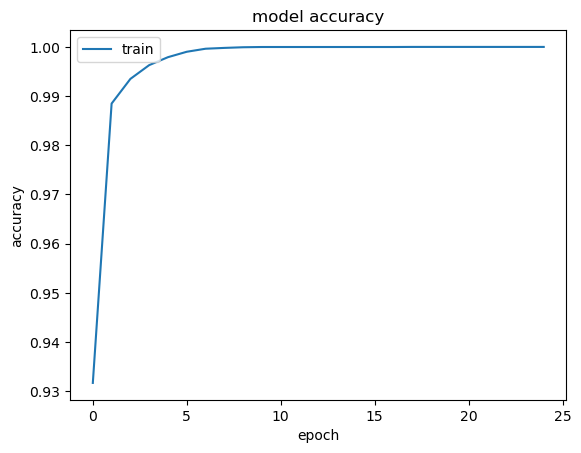

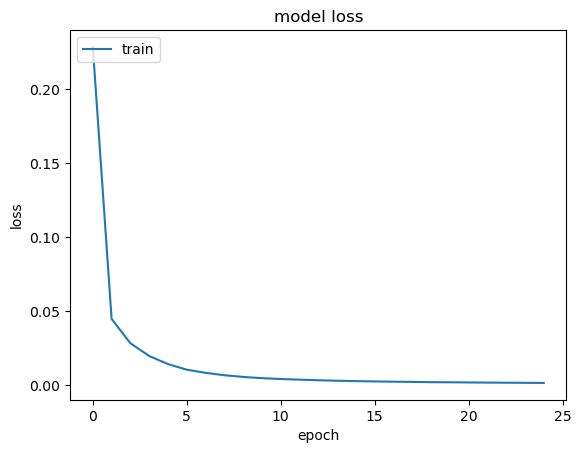

313/313 [==============================] - 2s 5ms/step - loss: 0.0246 - accuracy: 0.9917
> 99.170
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0012 - accuracy: 1.0000
> 100.000


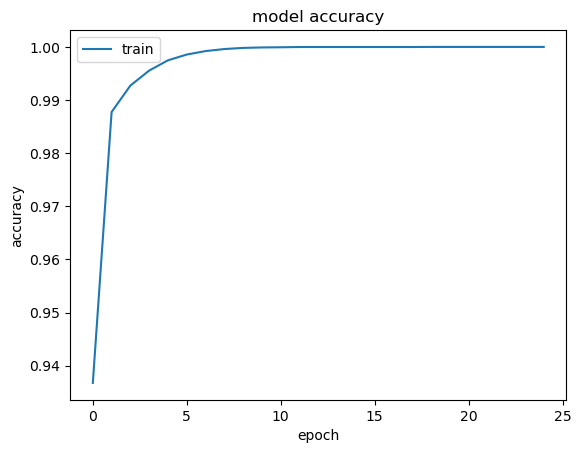

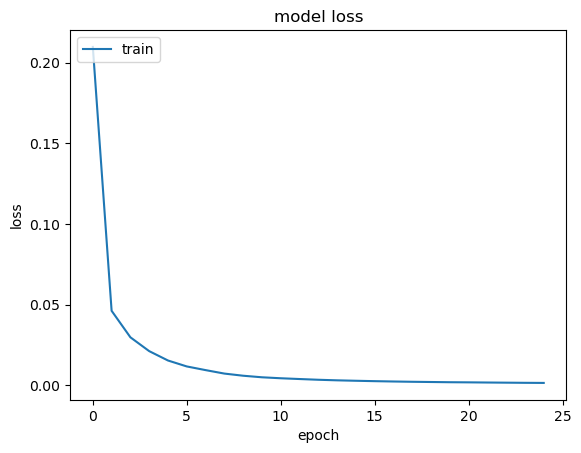

313/313 [==============================] - 2s 5ms/step - loss: 0.0299 - accuracy: 0.9898
> 98.980
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0011 - accuracy: 1.0000
> 100.000


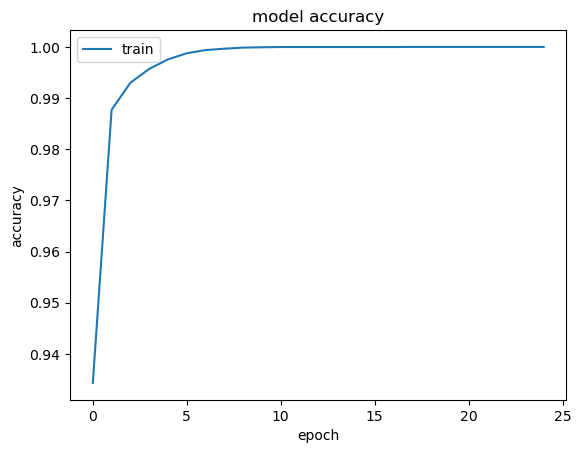

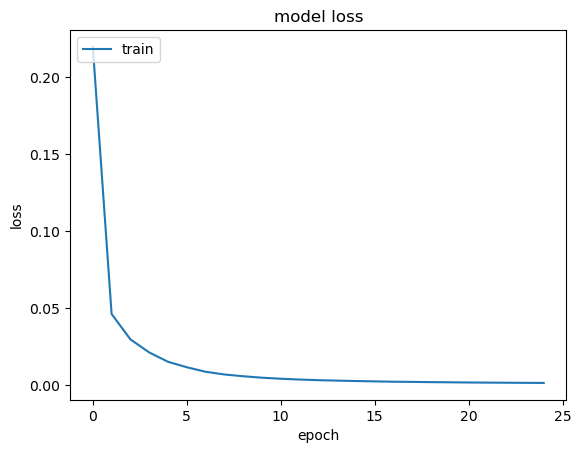

313/313 [==============================] - 2s 5ms/step - loss: 0.0252 - accuracy: 0.9923
> 99.230
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0013 - accuracy: 1.0000
> 100.000


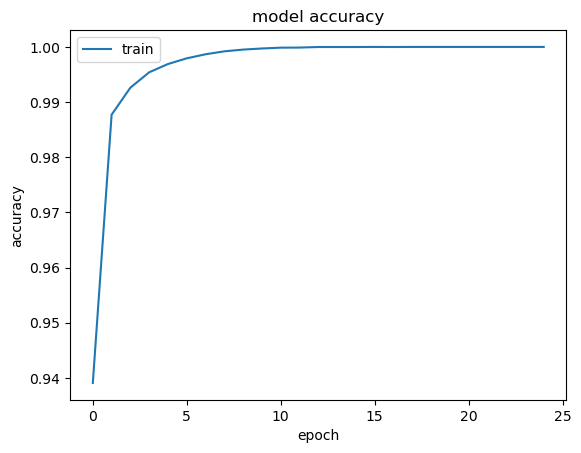

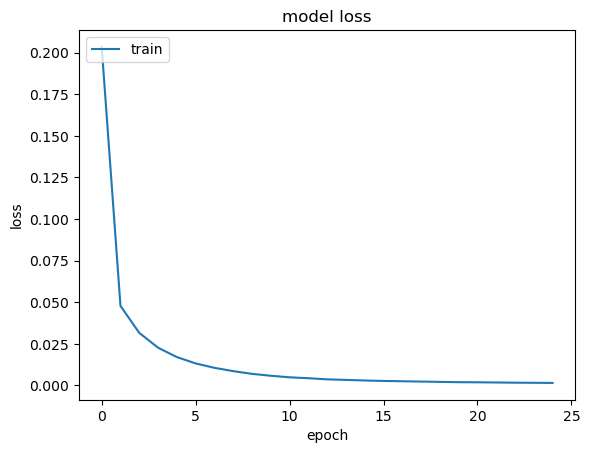

313/313 [==============================] - 2s 5ms/step - loss: 0.0241 - accuracy: 0.9925
> 99.250
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0014 - accuracy: 1.0000
> 100.000


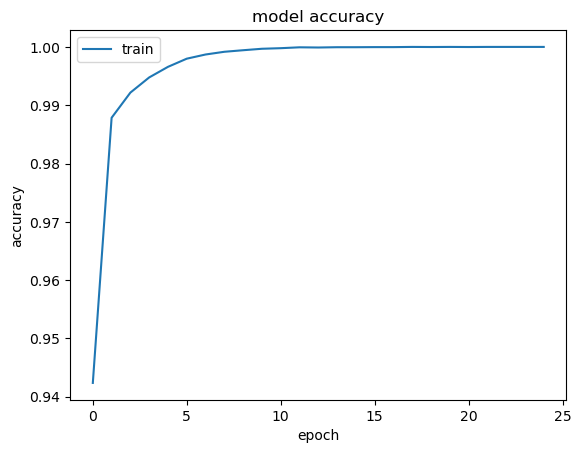

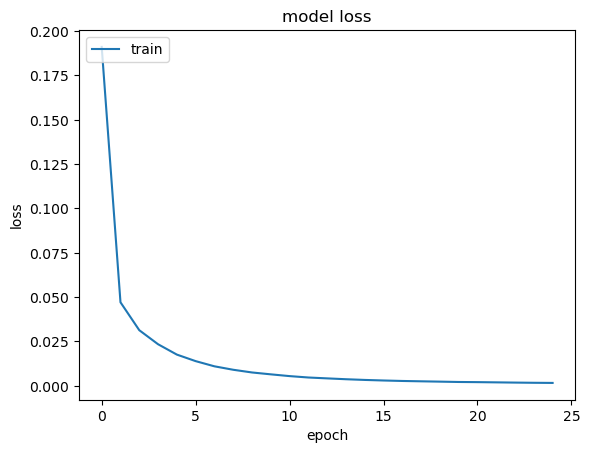

313/313 [==============================] - 2s 5ms/step - loss: 0.0240 - accuracy: 0.9919
> 99.190
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0014 - accuracy: 1.0000
> 100.000


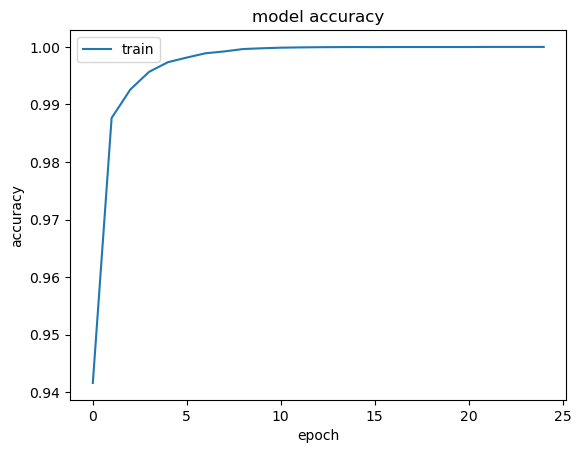

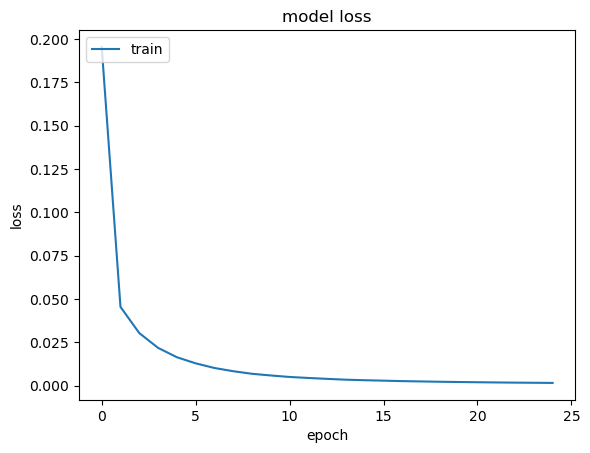

313/313 [==============================] - 2s 5ms/step - loss: 0.0356 - accuracy: 0.9870
> 98.700
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0011 - accuracy: 1.0000
> 100.000


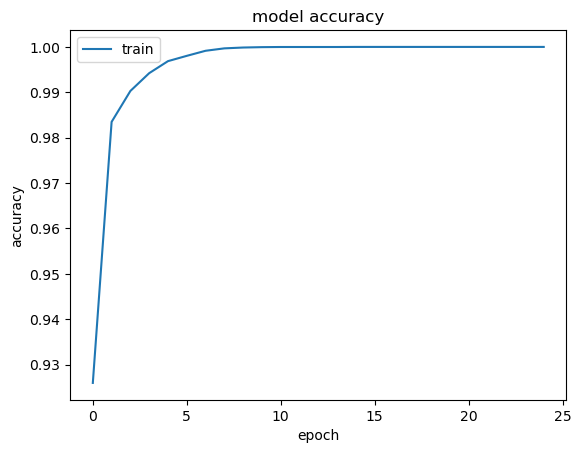

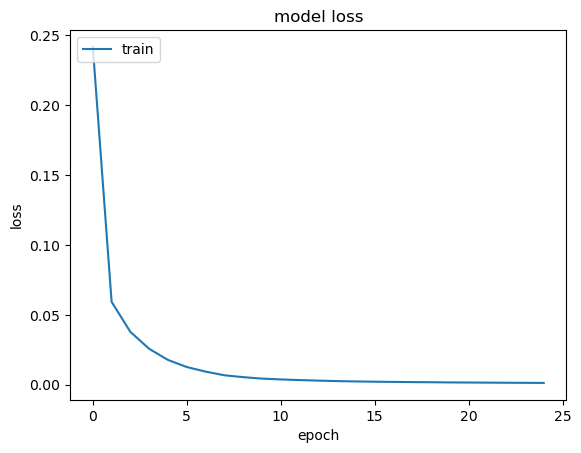

2023-04-15 17:03:31.652127: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape ingradient_tape/sequential_53/conv2d_323/ta_lu_5/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


313/313 [==============================] - 2s 5ms/step - loss: 0.0234 - accuracy: 0.9928
> 99.280
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0014 - accuracy: 1.0000
> 100.000


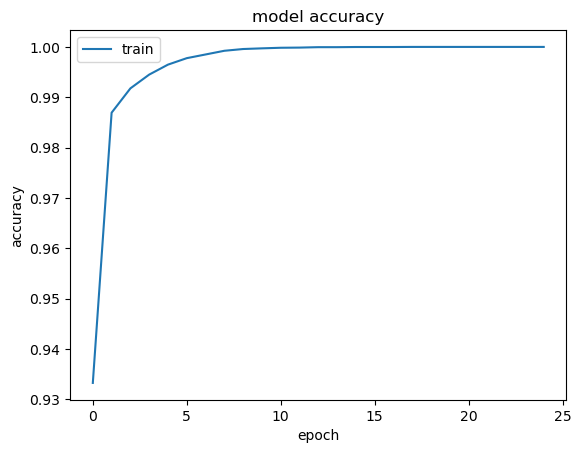

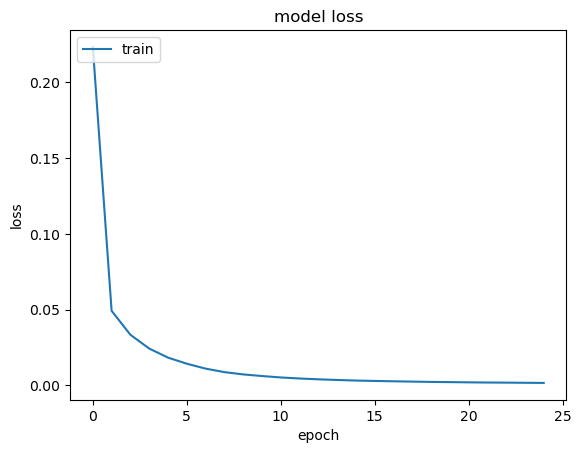

In [10]:

# run the test harness for evaluating a model
def run_test_harness(act):
    # load dataset
    trainX, trainY, testX, testY = load_dataset(d='mnist')
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # define model
    model = define_model_simple_mnist_batch(act, 0.01)
    # fit model
    history=model.fit(trainX, trainY, epochs=25, batch_size=512, verbose=0)
    _, acc = model.evaluate(testX, testY, verbose=1)
    print('> %.3f' % (acc * 100.0))
    _, acc2 = model.evaluate(trainX, trainY, verbose=1)
    print('> %.3f' % (acc2 * 100.0))
    # save model
    #model.save('final_model.h5')
    return model,history, acc




hist = []
accuracy = []
act = [tf.keras.activations.swish, tf.keras.activations.gelu, tf.keras.layers.LeakyReLU(alpha=0.1), 'relu', 'elu', 'selu', 'softplus', 'softsign', TaLU(alpha=0.0, trainable=True)]
#act = [TaLU(alpha=0.0, trainable=True)]
for i in act:
    # entry point, run the test harness
    model, history, acc = run_test_harness(act=i)
    hist.append(history)
    accuracy.append(acc)
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    #plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    #plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

# lr=0.1 MNIST no batch

313/313 [==============================] - 2s 5ms/step - loss: 2.3013 - accuracy: 0.1135
> 11.350
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3016 - accuracy: 0.1124
> 11.237


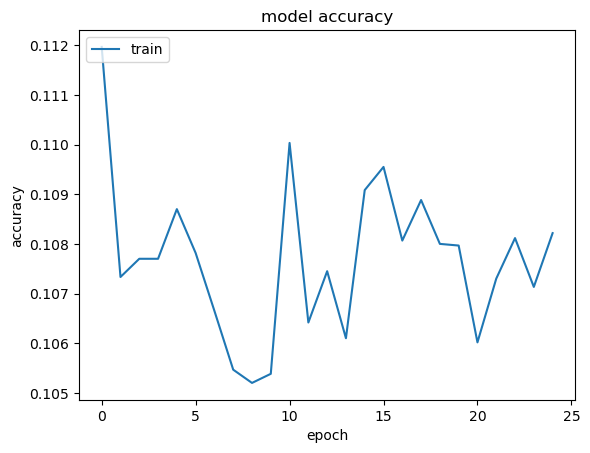

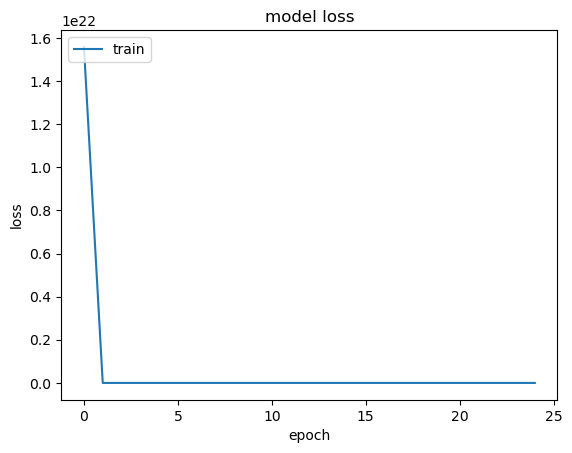

313/313 [==============================] - 2s 5ms/step - loss: nan - accuracy: 0.0980
> 9.800
1875/1875 [==============================] - 8s 4ms/step - loss: nan - accuracy: 0.0987
> 9.872


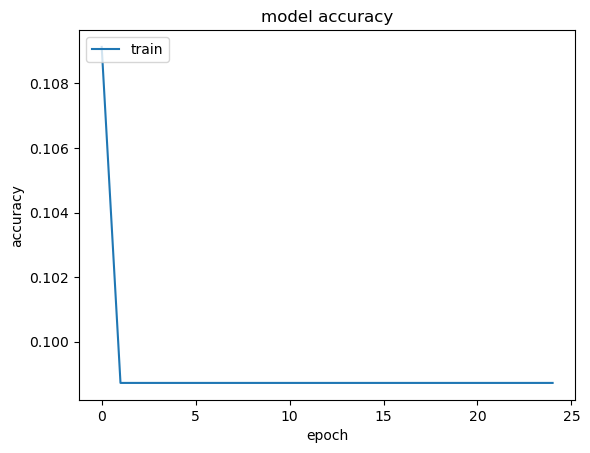

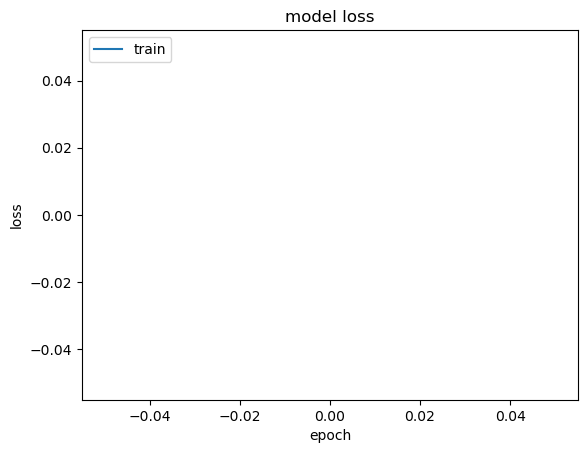

313/313 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.0980
> 9.800
1875/1875 [==============================] - 7s 4ms/step - loss: nan - accuracy: 0.0987
> 9.872


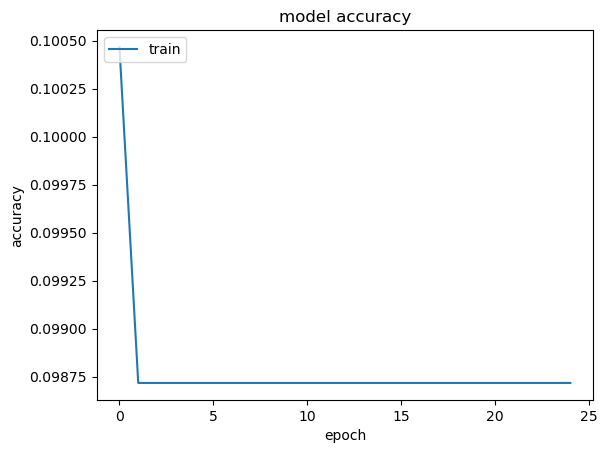

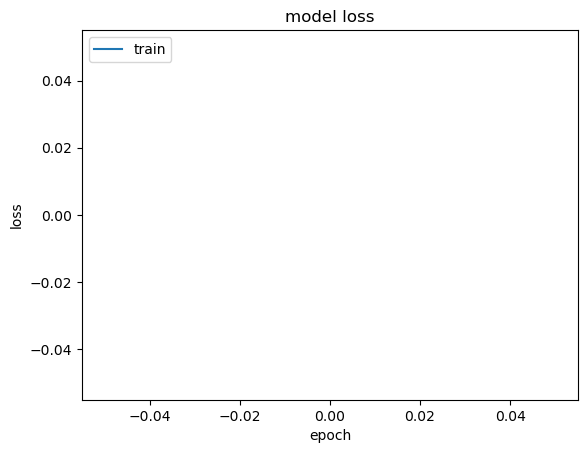

313/313 [==============================] - 2s 4ms/step - loss: 2.3012 - accuracy: 0.1135
> 11.350
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3015 - accuracy: 0.1124
> 11.237


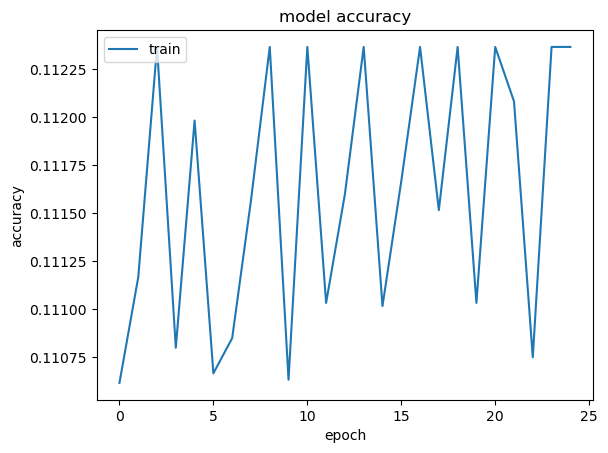

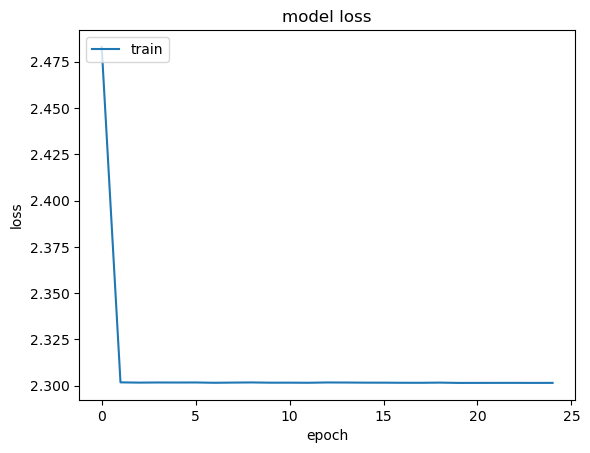

313/313 [==============================] - 2s 5ms/step - loss: nan - accuracy: 0.0980
> 9.800
1875/1875 [==============================] - 7s 4ms/step - loss: nan - accuracy: 0.0987
> 9.872


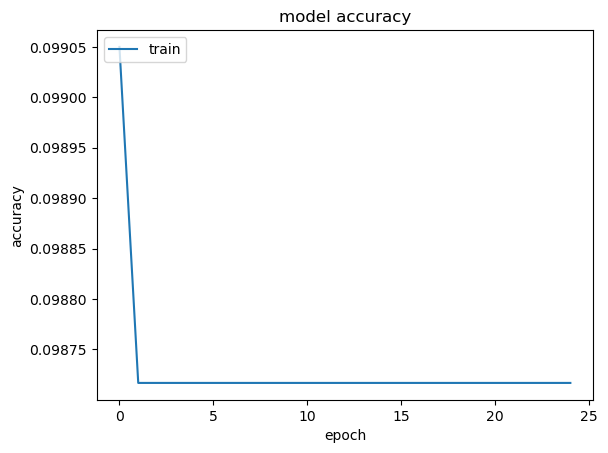

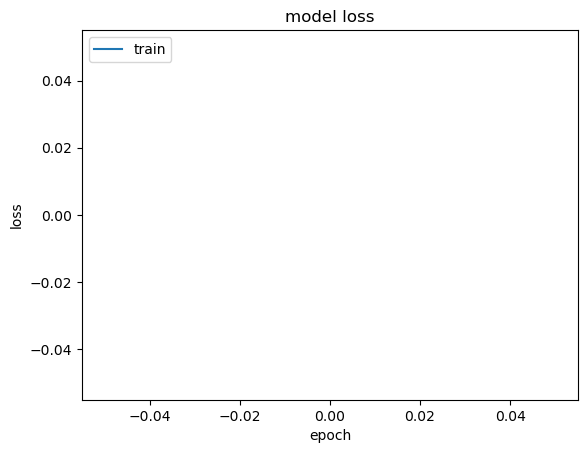

313/313 [==============================] - 2s 5ms/step - loss: 15217174528.0000 - accuracy: 0.0980
> 9.800
1875/1875 [==============================] - 7s 4ms/step - loss: 15140831232.0000 - accuracy: 0.0987
> 9.872


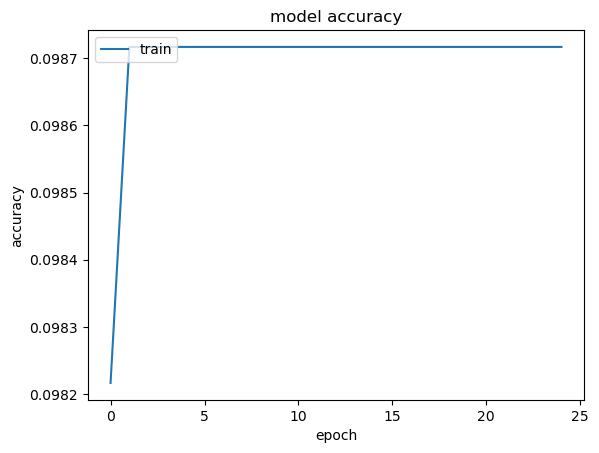

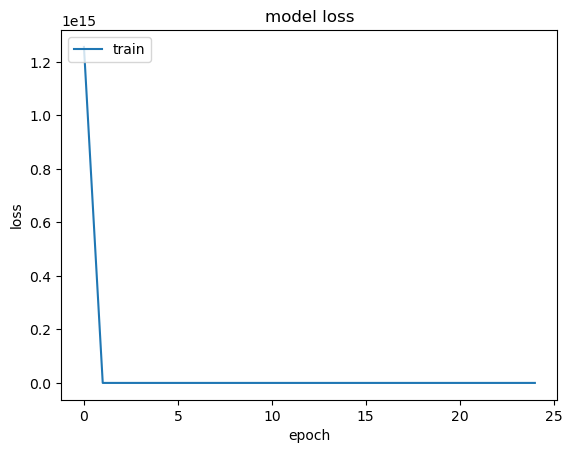

313/313 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.0980
> 9.800
1875/1875 [==============================] - 8s 4ms/step - loss: nan - accuracy: 0.0987
> 9.872


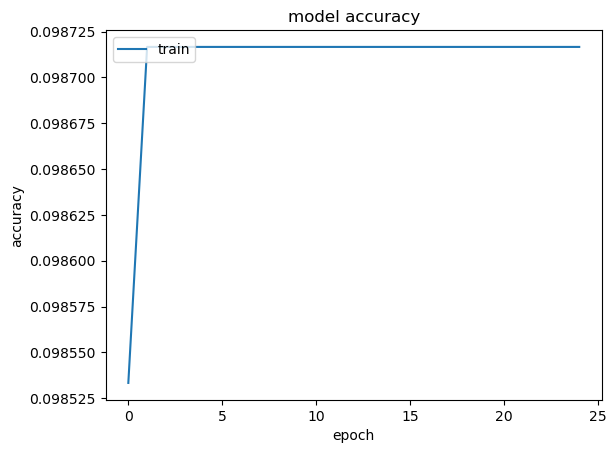

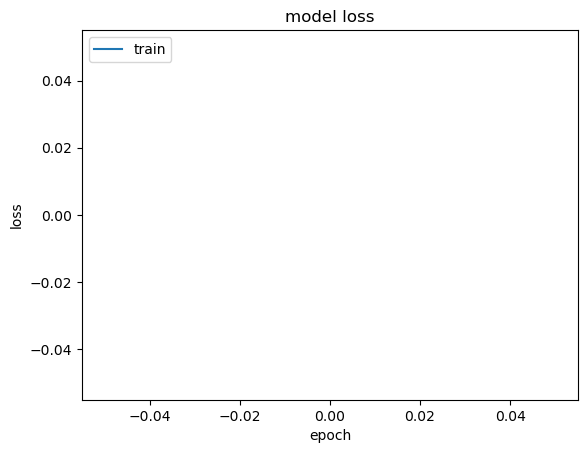

313/313 [==============================] - 2s 5ms/step - loss: 0.0190 - accuracy: 0.9941
> 99.410
1875/1875 [==============================] - 8s 4ms/step - loss: 6.7743e-04 - accuracy: 1.0000
> 100.000


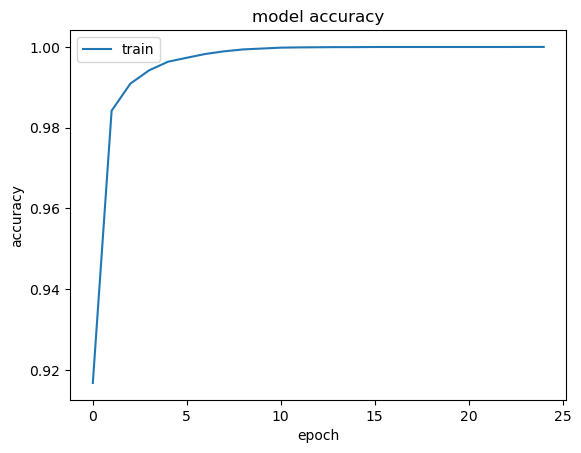

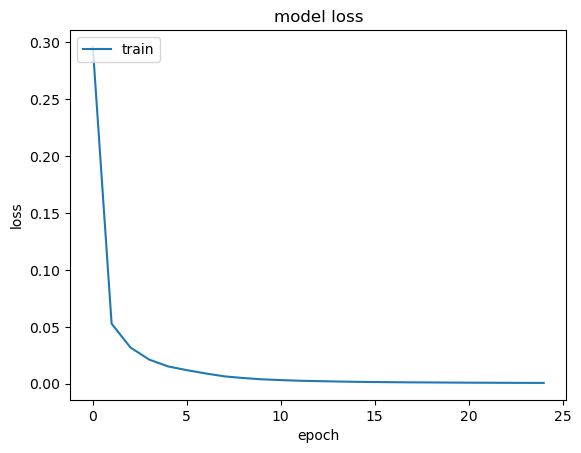

2023-04-15 17:25:37.914562: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape ingradient_tape/sequential_62/conv2d_377/ta_lu_6/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


313/313 [==============================] - 2s 5ms/step - loss: nan - accuracy: 0.0980
> 9.800
1875/1875 [==============================] - 8s 4ms/step - loss: nan - accuracy: 0.0987
> 9.872


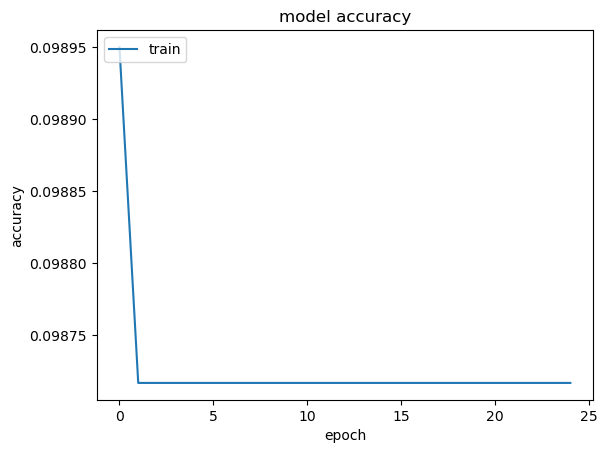

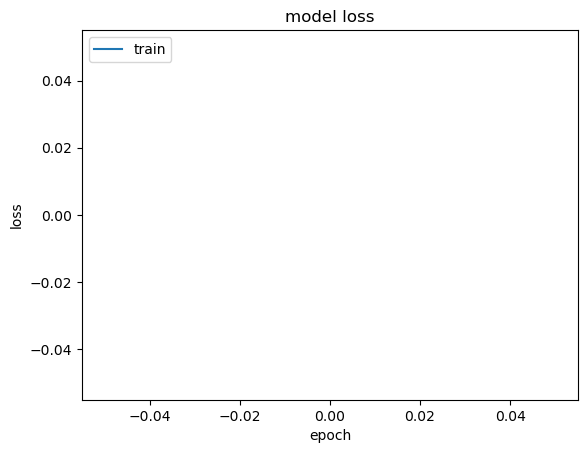

In [11]:

# run the test harness for evaluating a model
def run_test_harness(act):
    # load dataset
    trainX, trainY, testX, testY = load_dataset(d='mnist')
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # define model
    model = define_model_simple_mnist_no_batch(act, 0.1)
    # fit model
    history=model.fit(trainX, trainY, epochs=25, batch_size=512, verbose=0)
    _, acc = model.evaluate(testX, testY, verbose=1)
    print('> %.3f' % (acc * 100.0))
    _, acc2 = model.evaluate(trainX, trainY, verbose=1)
    print('> %.3f' % (acc2 * 100.0))
    # save model
    #model.save('final_model.h5')
    return model,history, acc




hist = []
accuracy = []
act = [tf.keras.activations.swish, tf.keras.activations.gelu, tf.keras.layers.LeakyReLU(alpha=0.1), 'relu', 'elu', 'selu', 'softplus', 'softsign', TaLU(alpha=0.0, trainable=True)]
#act = [TaLU(alpha=0.0, trainable=True)]
for i in act:
    # entry point, run the test harness
    model, history, acc = run_test_harness(act=i)
    hist.append(history)
    accuracy.append(acc)
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    #plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    #plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

# lr = 0.01 MNIST no batch

313/313 [==============================] - 2s 6ms/step - loss: 0.0315 - accuracy: 0.9914
> 99.140
1875/1875 [==============================] - 8s 4ms/step - loss: 3.4954e-04 - accuracy: 1.0000
> 100.000


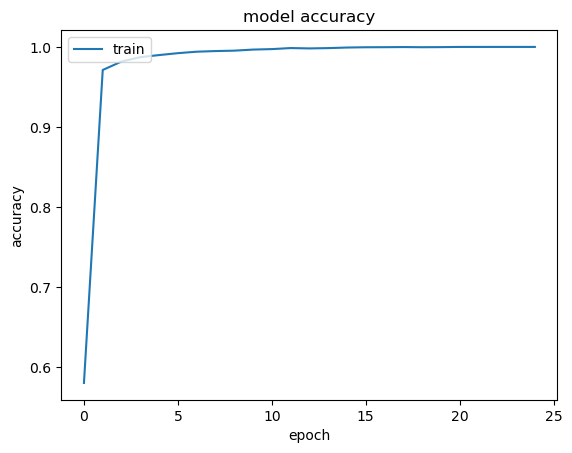

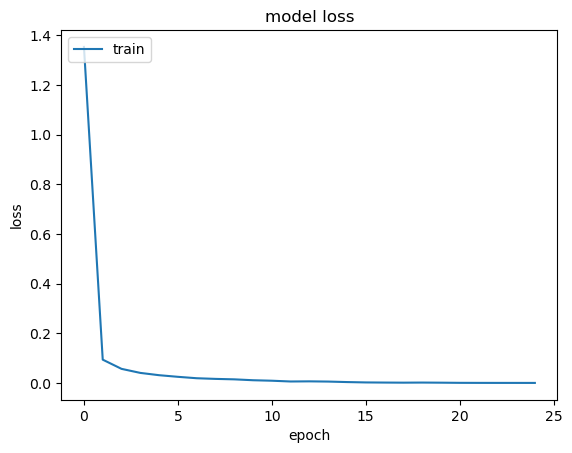

313/313 [==============================] - 2s 5ms/step - loss: 0.0286 - accuracy: 0.9922
> 99.220
1875/1875 [==============================] - 8s 4ms/step - loss: 5.1353e-04 - accuracy: 1.0000
> 100.000


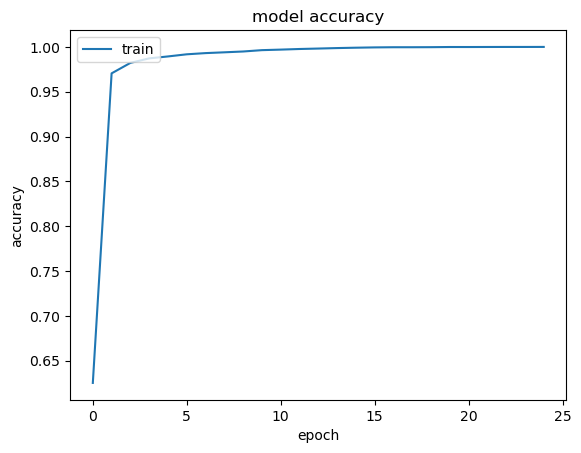

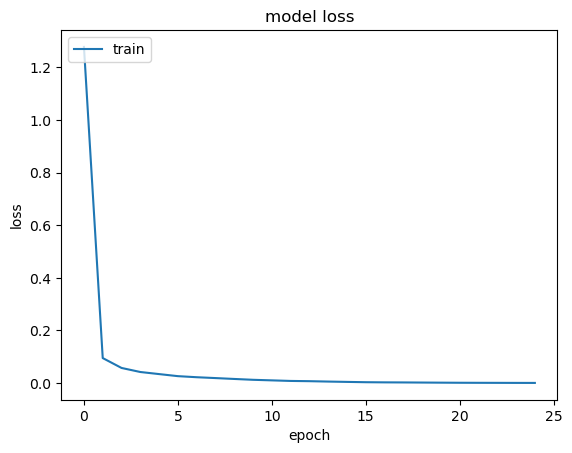

313/313 [==============================] - 2s 5ms/step - loss: 0.0291 - accuracy: 0.9920
> 99.200
1875/1875 [==============================] - 8s 4ms/step - loss: 8.7302e-04 - accuracy: 0.9999
> 99.995


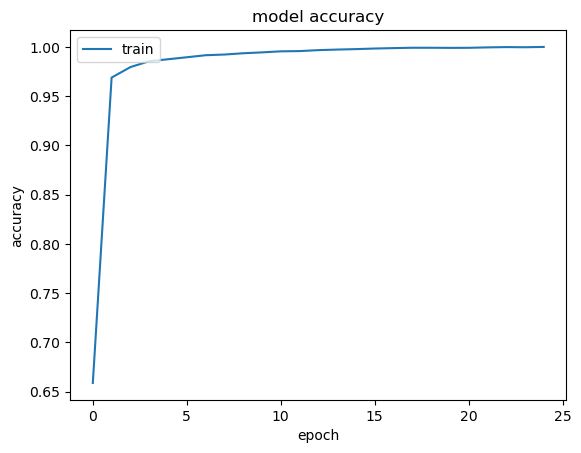

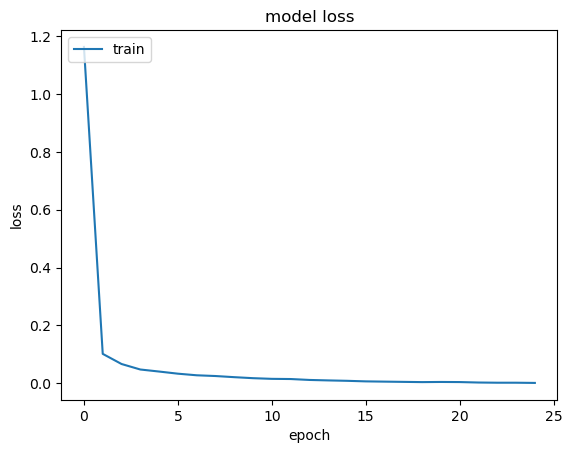

313/313 [==============================] - 2s 5ms/step - loss: 0.0329 - accuracy: 0.9920
> 99.200
1875/1875 [==============================] - 7s 4ms/step - loss: 3.5839e-04 - accuracy: 1.0000
> 100.000


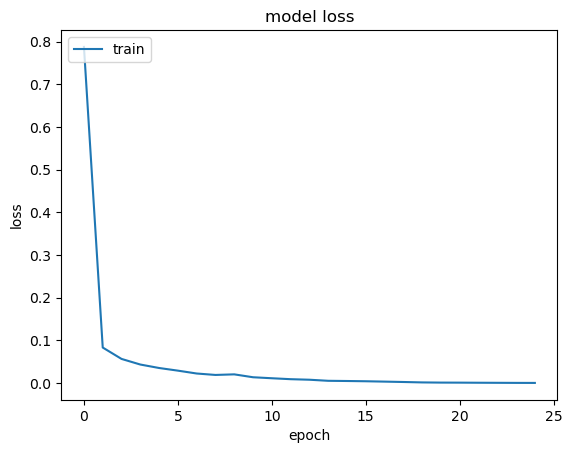

313/313 [==============================] - 2s 5ms/step - loss: 0.0274 - accuracy: 0.9928
> 99.280
1875/1875 [==============================] - 7s 4ms/step - loss: 8.9919e-04 - accuracy: 1.0000
> 99.998


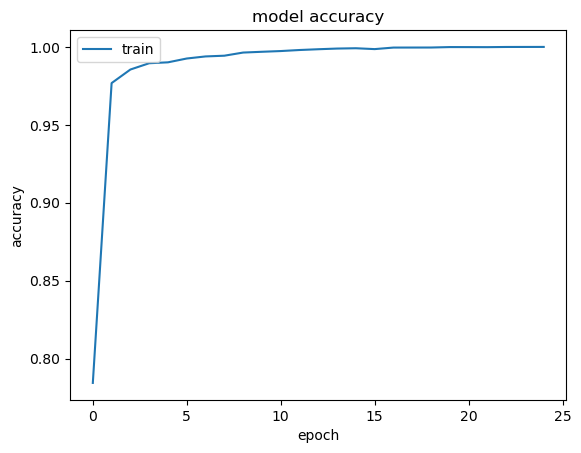

313/313 [==============================] - 2s 5ms/step - loss: nan - accuracy: 0.0980
> 9.800
1875/1875 [==============================] - 7s 4ms/step - loss: nan - accuracy: 0.0987
> 9.872


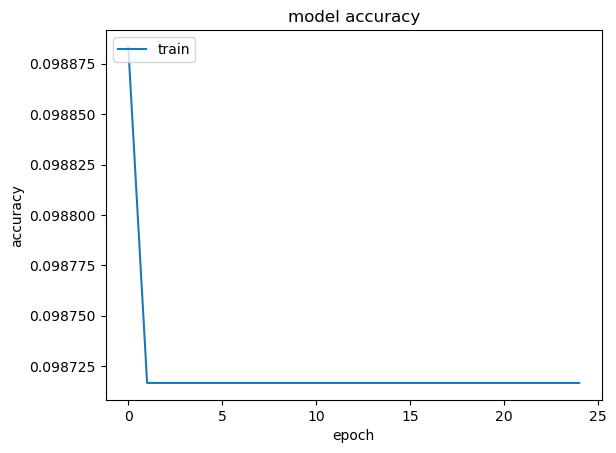

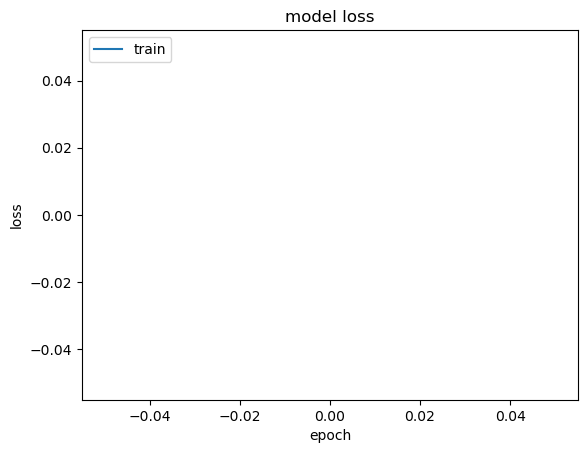

313/313 [==============================] - 2s 5ms/step - loss: 0.0416 - accuracy: 0.9910
> 99.100
1875/1875 [==============================] - 7s 4ms/step - loss: 6.8191e-04 - accuracy: 0.9999
> 99.988


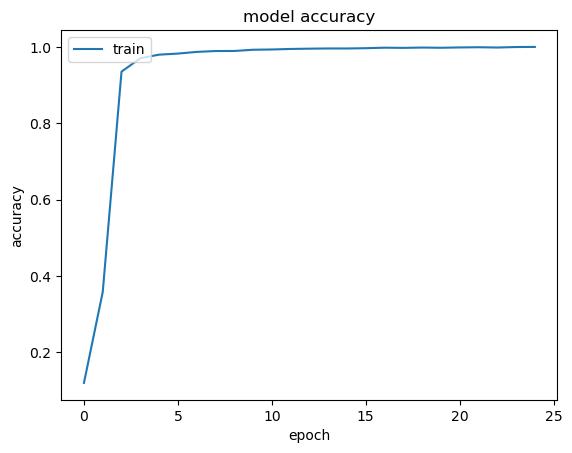

313/313 [==============================] - 2s 6ms/step - loss: 0.0272 - accuracy: 0.9910
> 99.100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0222 - accuracy: 0.9948
> 99.475


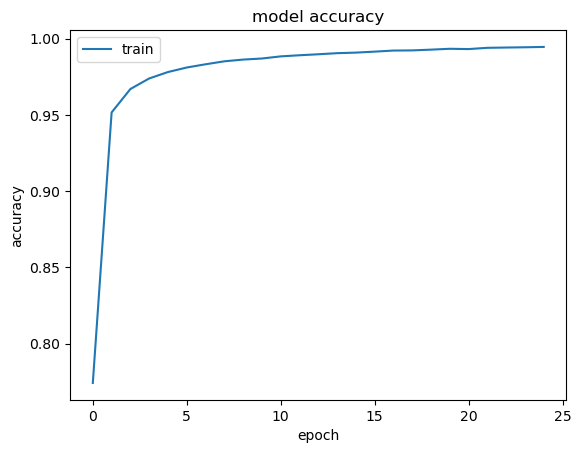

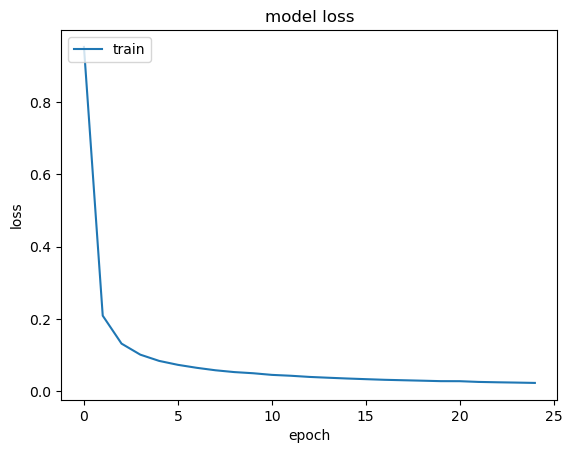

2023-04-15 17:49:08.229080: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape ingradient_tape/sequential_71/conv2d_431/ta_lu_7/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


313/313 [==============================] - 2s 5ms/step - loss: 0.0304 - accuracy: 0.9914
> 99.140
1875/1875 [==============================] - 8s 4ms/step - loss: 4.0605e-04 - accuracy: 1.0000
> 100.000


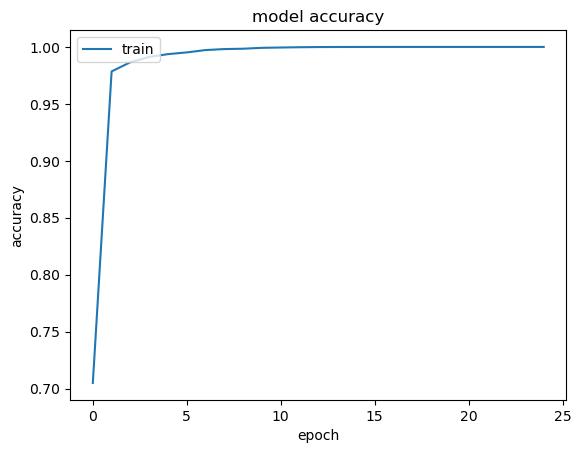

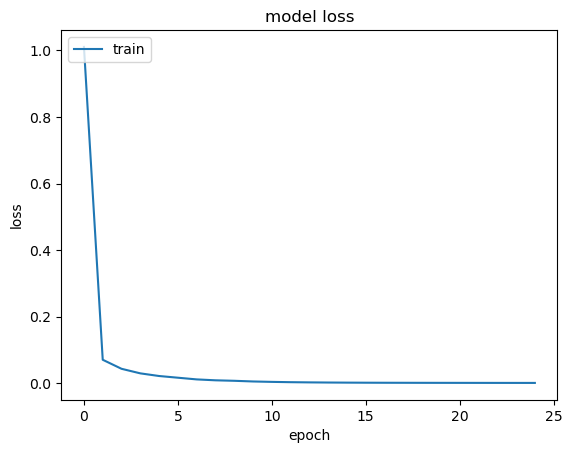

In [12]:

# run the test harness for evaluating a model
def run_test_harness(act):
    # load dataset
    trainX, trainY, testX, testY = load_dataset(d='mnist')
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # define model
    model = define_model_simple_mnist_no_batch(act, 0.01)
    # fit model
    history=model.fit(trainX, trainY, epochs=25, batch_size=512, verbose=0)
    _, acc = model.evaluate(testX, testY, verbose=1)
    print('> %.3f' % (acc * 100.0))
    _, acc2 = model.evaluate(trainX, trainY, verbose=1)
    print('> %.3f' % (acc2 * 100.0))
    # save model
    #model.save('final_model.h5')
    return model,history, acc




hist = []
accuracy = []
act = [tf.keras.activations.swish, tf.keras.activations.gelu, tf.keras.layers.LeakyReLU(alpha=0.1), 'relu', 'elu', 'selu', 'softplus', 'softsign', TaLU(alpha=0.0, trainable=True)]
#act = [TaLU(alpha=0.0, trainable=True)]
for i in act:
    # entry point, run the test harness
    model, history, acc = run_test_harness(act=i)
    hist.append(history)
    accuracy.append(acc)
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    #plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    #plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

# lr = 0.1 CIFAR Res No Batch

313/313 [==============================] - 2s 6ms/step - loss: nan - accuracy: 0.1000
> 10.000
1563/1563 [==============================] - 7s 5ms/step - loss: nan - accuracy: 0.1000
> 10.000


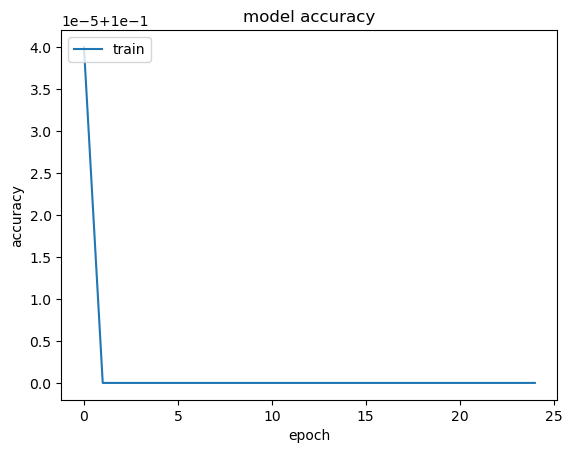

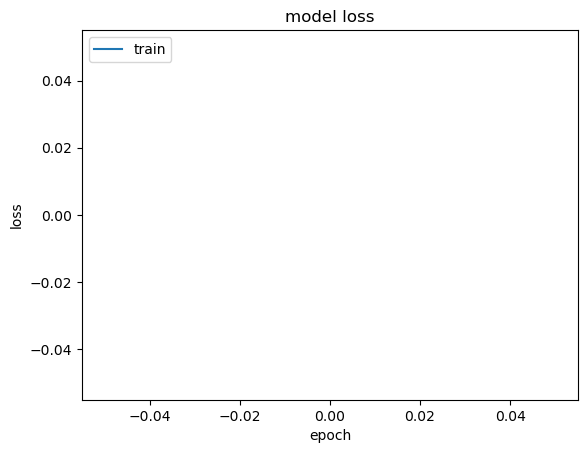

313/313 [==============================] - 2s 6ms/step - loss: nan - accuracy: 0.1000
> 10.000
1563/1563 [==============================] - 8s 5ms/step - loss: nan - accuracy: 0.1000
> 10.000


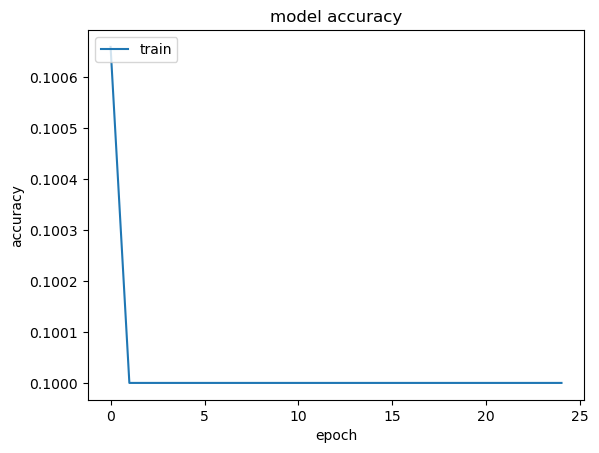

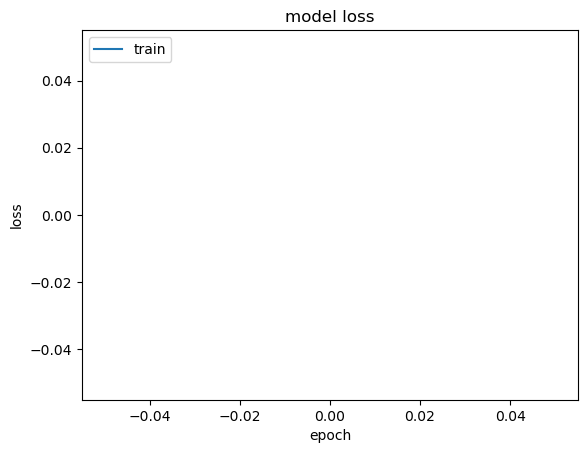

313/313 [==============================] - 2s 5ms/step - loss: nan - accuracy: 0.1000
> 10.000
1563/1563 [==============================] - 7s 5ms/step - loss: nan - accuracy: 0.1000
> 10.000


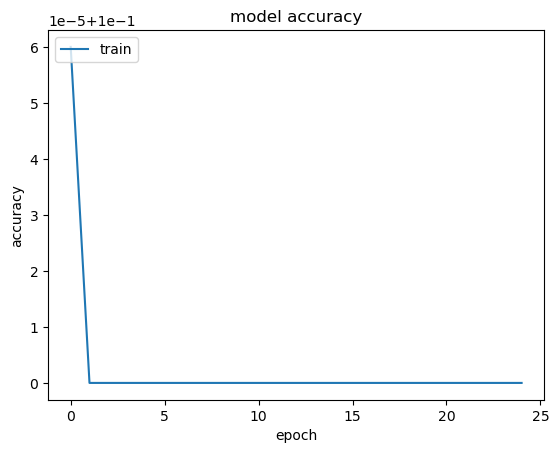

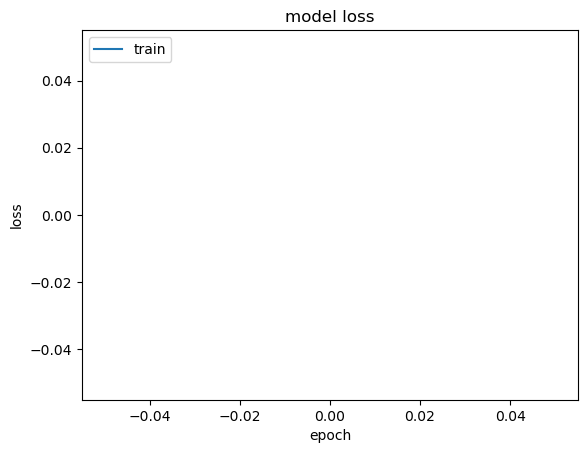

313/313 [==============================] - 2s 5ms/step - loss: 2.3028 - accuracy: 0.1000
> 10.000
1563/1563 [==============================] - 7s 5ms/step - loss: 2.3028 - accuracy: 0.1000
> 10.000


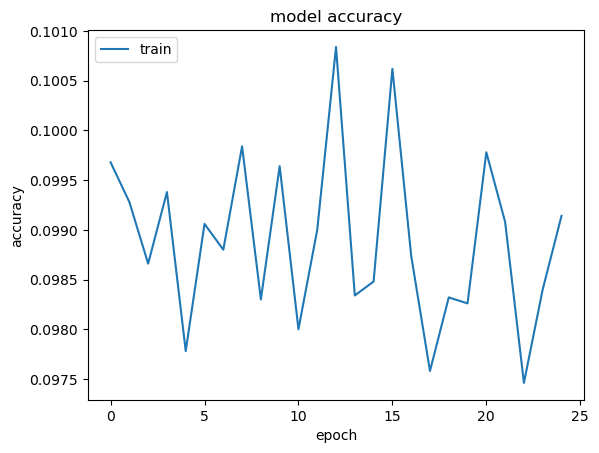

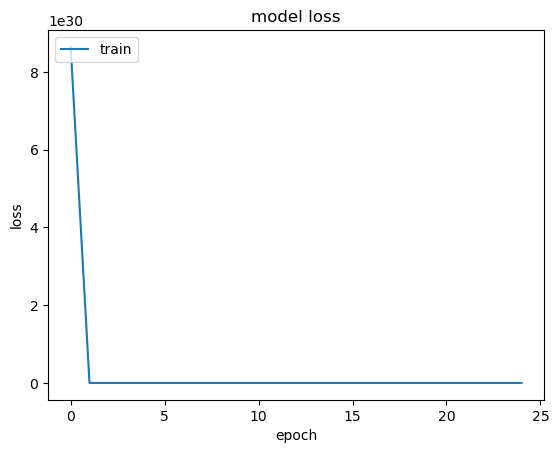

313/313 [==============================] - 2s 5ms/step - loss: nan - accuracy: 0.1000
> 10.000
1563/1563 [==============================] - 7s 4ms/step - loss: nan - accuracy: 0.1000
> 10.000


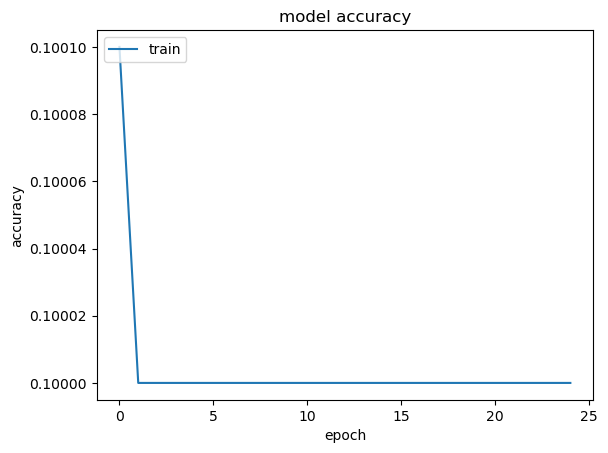

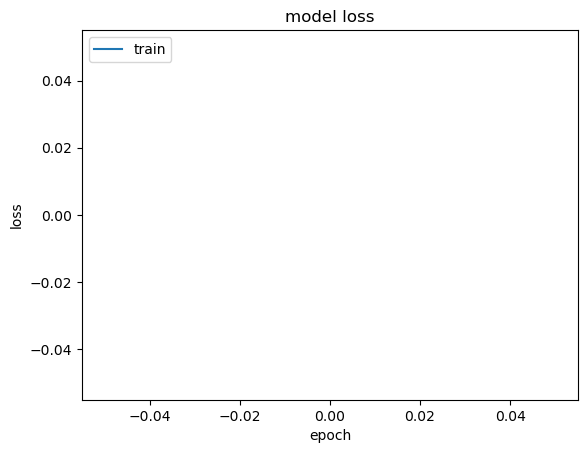

313/313 [==============================] - 2s 5ms/step - loss: nan - accuracy: 0.1000
> 10.000
1563/1563 [==============================] - 7s 4ms/step - loss: nan - accuracy: 0.1000
> 10.000


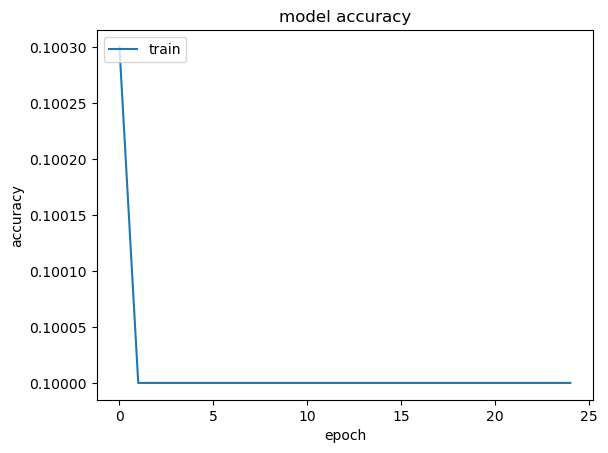

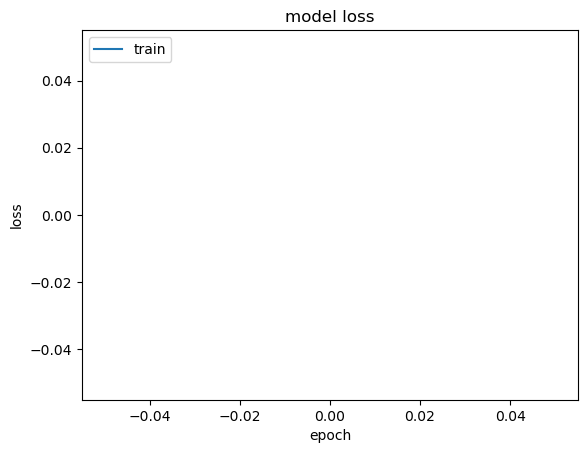

313/313 [==============================] - 2s 5ms/step - loss: nan - accuracy: 0.1000
> 10.000
1563/1563 [==============================] - 7s 4ms/step - loss: nan - accuracy: 0.1000
> 10.000


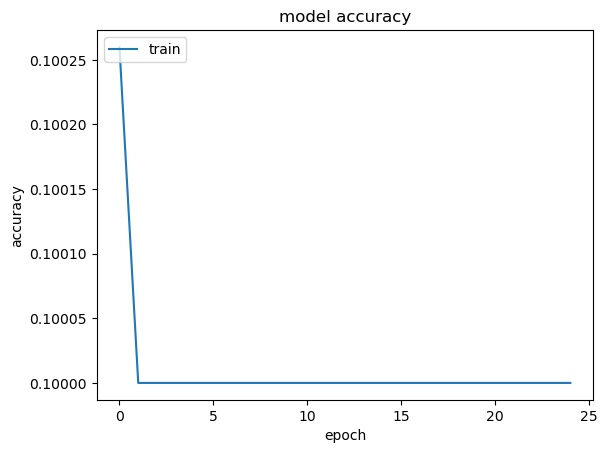

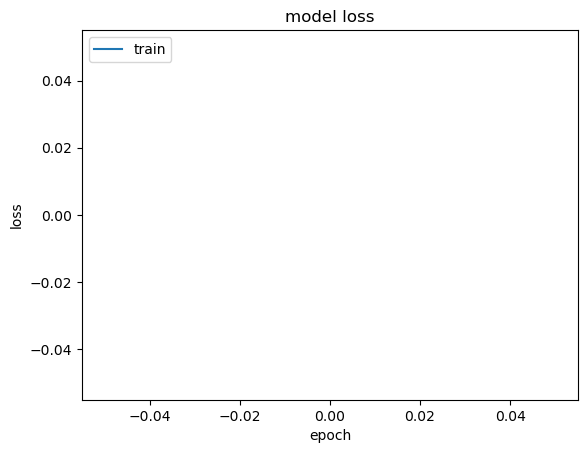

313/313 [==============================] - 2s 6ms/step - loss: 2.4270 - accuracy: 0.1000
> 10.000
1563/1563 [==============================] - 7s 5ms/step - loss: 2.4270 - accuracy: 0.1000
> 10.000


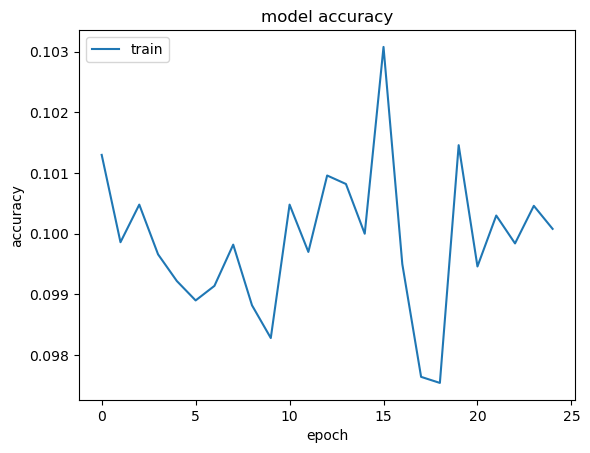

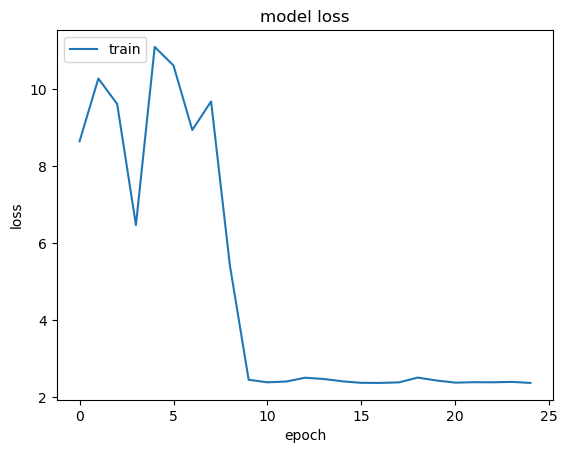

2023-04-15 18:29:39.502700: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape ingradient_tape/model_8/conv2d_494/ta_lu_8/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


313/313 [==============================] - 2s 6ms/step - loss: nan - accuracy: 0.1000
> 10.000
1563/1563 [==============================] - 8s 5ms/step - loss: nan - accuracy: 0.1000
> 10.000


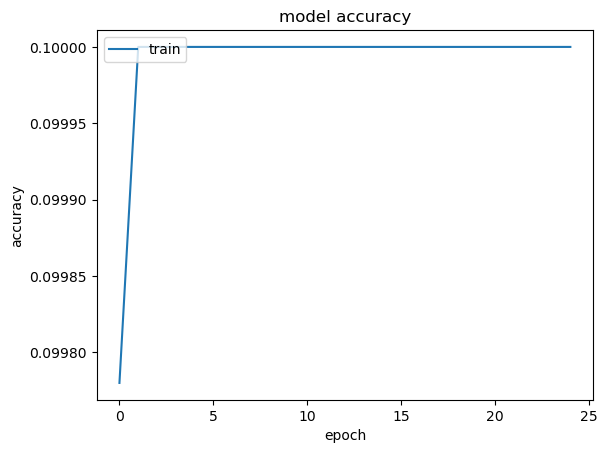

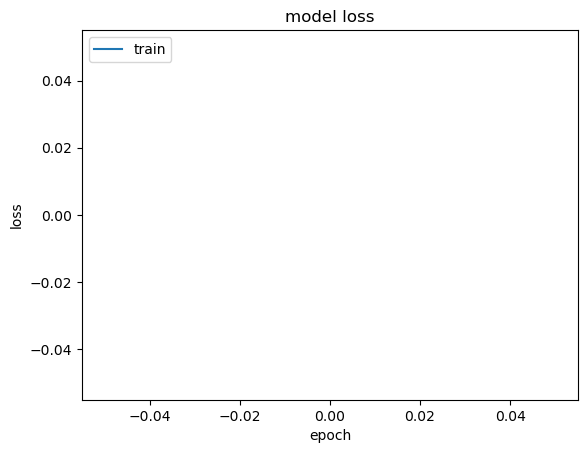

In [13]:
# run the test harness for evaluating a model
def run_test_harness(act):
    # load dataset
    trainX, trainY, testX, testY = load_dataset(d='cifar')
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # define model
    model = define_model_cifar_no_batch_res(act)
    opt = SGD(lr=0.1, decay=0.0001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy',  metrics=['accuracy'])
    # fit model
    history=model.fit(trainX, trainY, epochs=25, batch_size=512, verbose=0)
    _, acc = model.evaluate(testX, testY, verbose=1)
    print('> %.3f' % (acc * 100.0))
    _, acc2 = model.evaluate(trainX, trainY, verbose=1)
    print('> %.3f' % (acc2 * 100.0))
    # save model
    #model.save('final_model.h5')
    return model,history, acc

hist = []
accuracy = []
act = [tf.keras.activations.swish, tf.keras.activations.gelu, tf.keras.layers.LeakyReLU(alpha=0.1), 'relu', 'elu', 'selu', 'softplus', 'softsign', TaLU(alpha=0.0, trainable=True)]
#act = [TaLU(alpha=0.0, trainable=True)]
for i in act:
    # entry point, run the test harness
    model, history, acc = run_test_harness(act=i)
    hist.append(history)
    accuracy.append(acc)
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    #plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    #plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

# lr = 0.01 CIFAR Res No Batch

313/313 [==============================] - 2s 7ms/step - loss: 3.5806 - accuracy: 0.6107
> 61.070
1563/1563 [==============================] - 7s 5ms/step - loss: 4.3310e-04 - accuracy: 1.0000
> 100.000


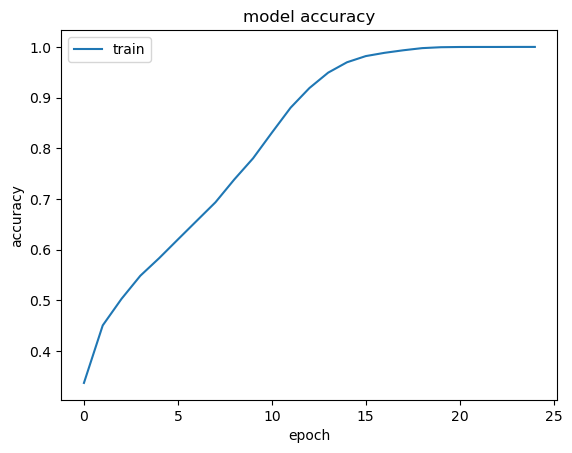

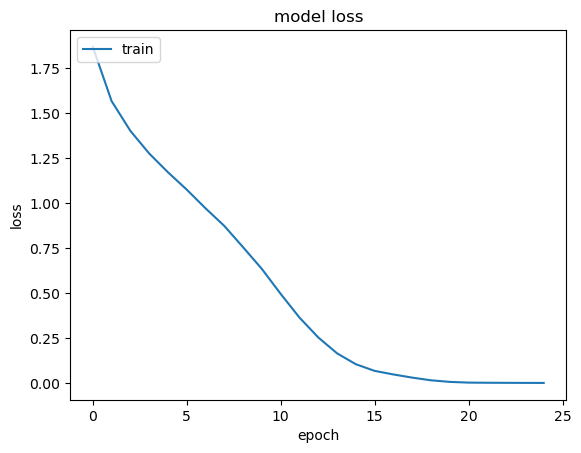

313/313 [==============================] - 2s 6ms/step - loss: 2.9856 - accuracy: 0.6197
> 61.970
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0029 - accuracy: 0.9999
> 99.990


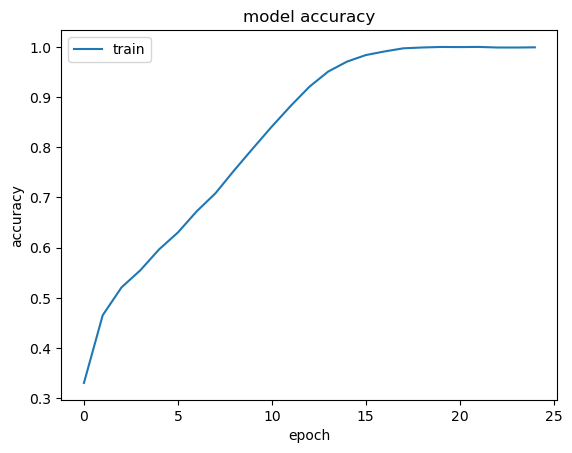

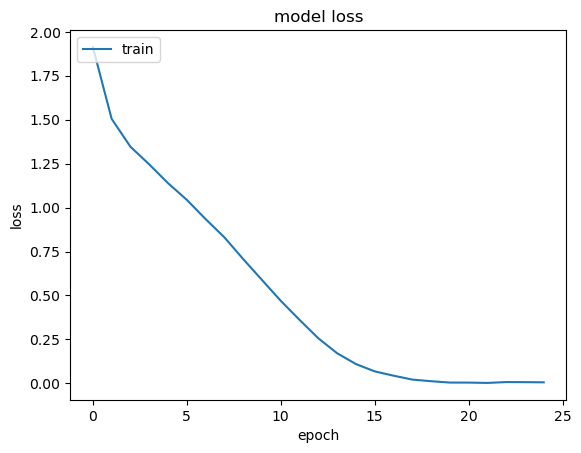

313/313 [==============================] - 2s 5ms/step - loss: nan - accuracy: 0.1000
> 10.000
1563/1563 [==============================] - 7s 4ms/step - loss: nan - accuracy: 0.1000
> 10.000


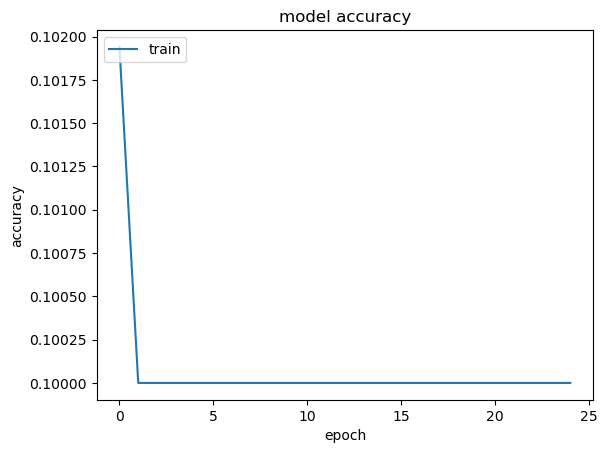

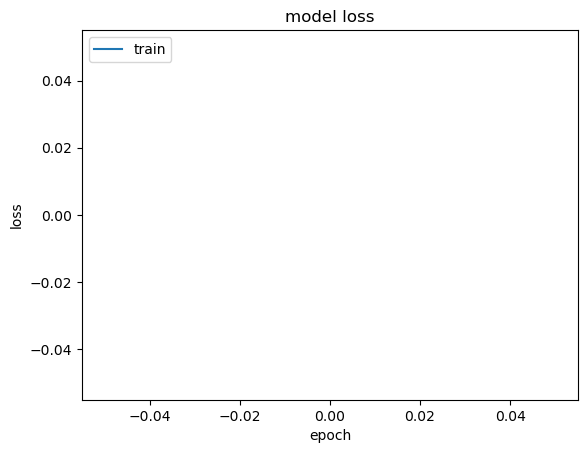

313/313 [==============================] - 2s 5ms/step - loss: 2.0276 - accuracy: 0.6148
> 61.480
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1094 - accuracy: 0.9654
> 96.536


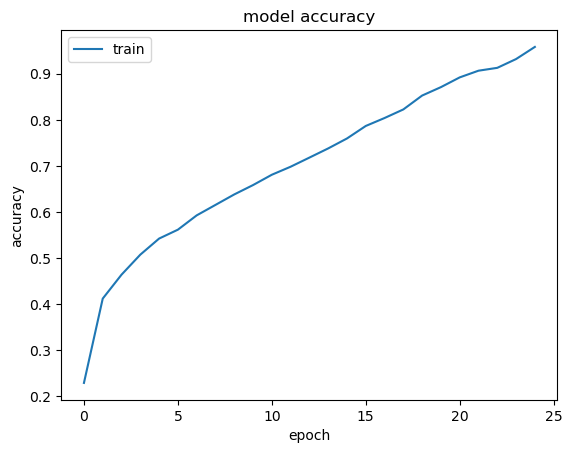

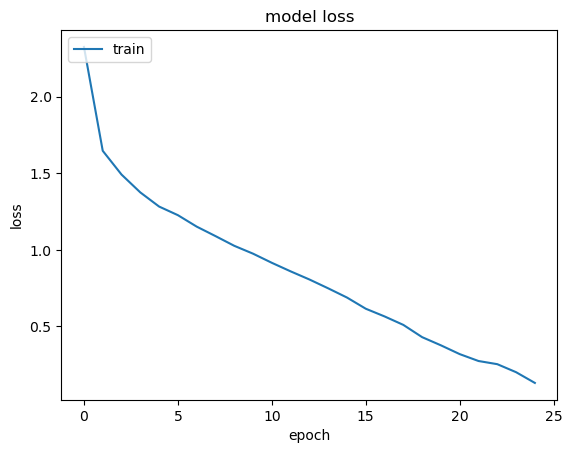

313/313 [==============================] - 2s 5ms/step - loss: nan - accuracy: 0.1000
> 10.000
1563/1563 [==============================] - 7s 4ms/step - loss: nan - accuracy: 0.1000
> 10.000


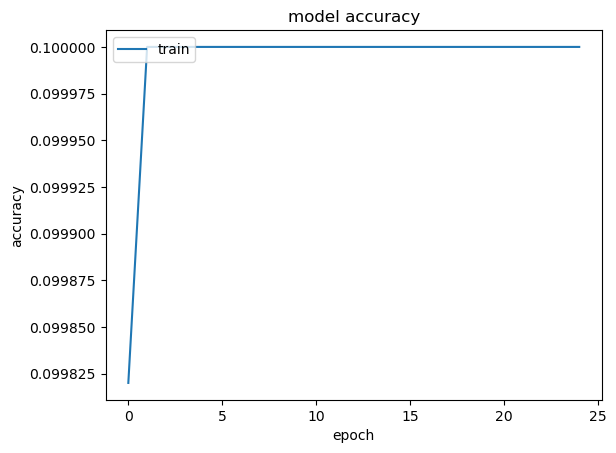

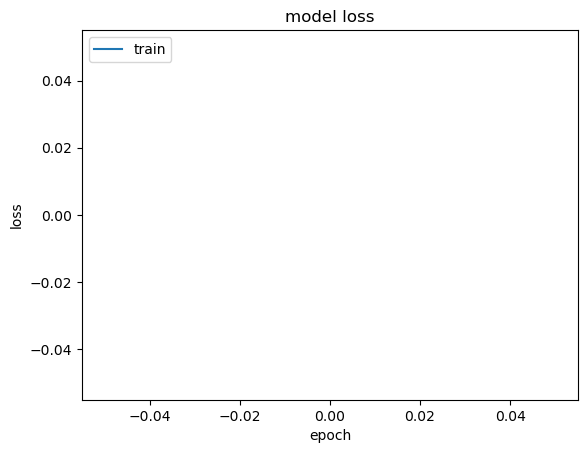

313/313 [==============================] - 2s 6ms/step - loss: nan - accuracy: 0.1000
> 10.000
1563/1563 [==============================] - 7s 4ms/step - loss: nan - accuracy: 0.1000
> 10.000


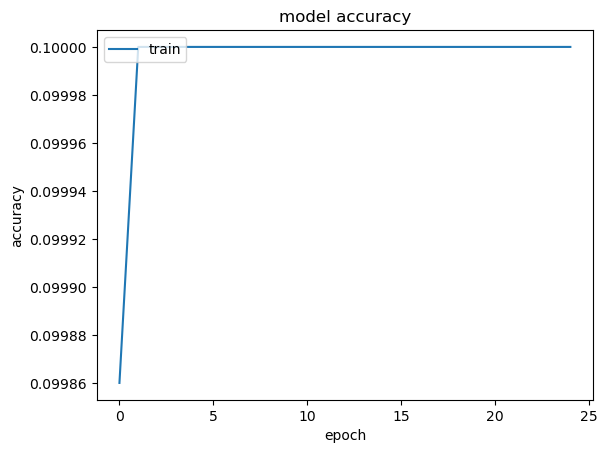

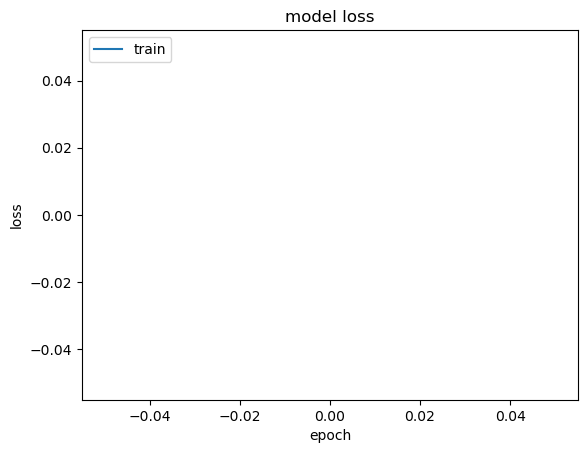

313/313 [==============================] - 2s 6ms/step - loss: 1.7359 - accuracy: 0.3824
> 38.240
1563/1563 [==============================] - 7s 4ms/step - loss: 1.7243 - accuracy: 0.3865
> 38.654


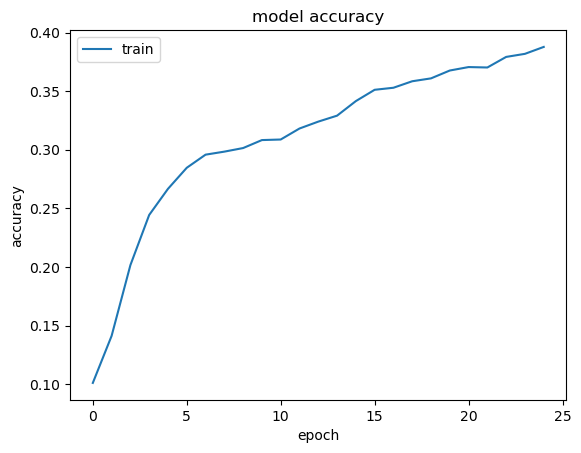

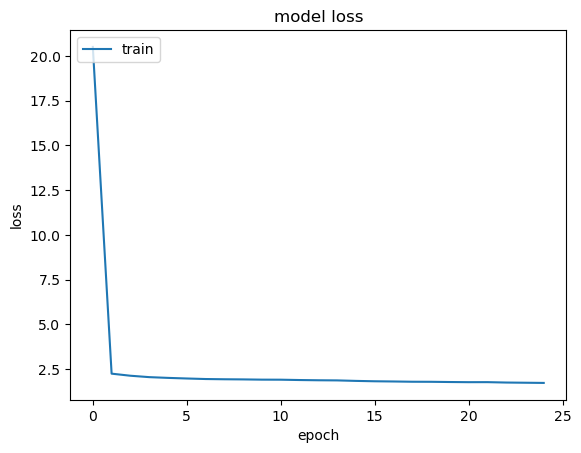

313/313 [==============================] - 2s 6ms/step - loss: 1.0812 - accuracy: 0.6526
> 65.260
1563/1563 [==============================] - 7s 5ms/step - loss: 0.1660 - accuracy: 0.9799
> 97.988


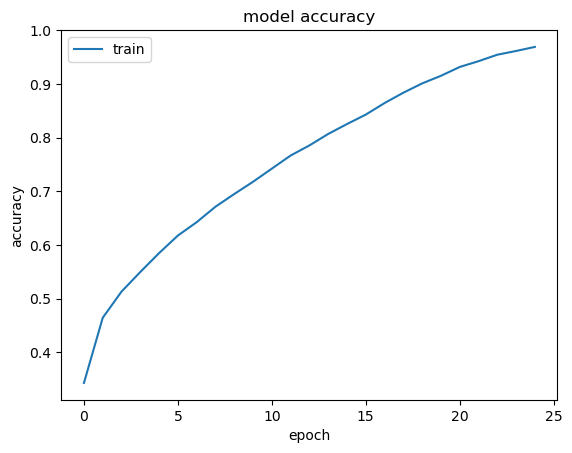

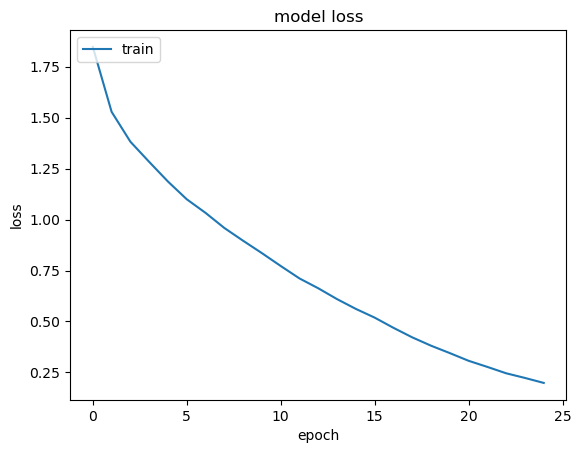

2023-04-15 19:14:26.308994: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape ingradient_tape/model_17/conv2d_557/ta_lu_9/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


313/313 [==============================] - 2s 6ms/step - loss: nan - accuracy: 0.1000
> 10.000
1563/1563 [==============================] - 8s 5ms/step - loss: nan - accuracy: 0.1000
> 10.000


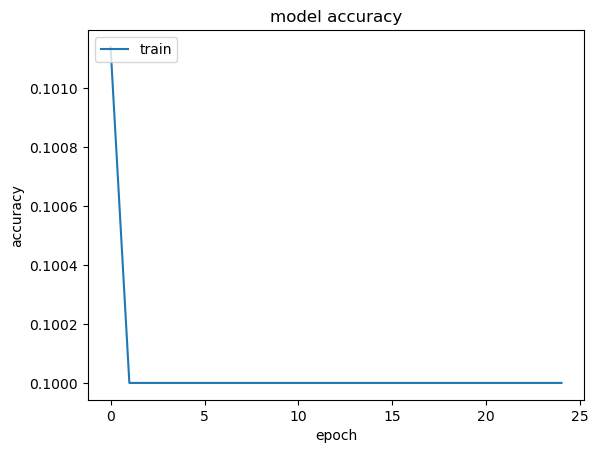

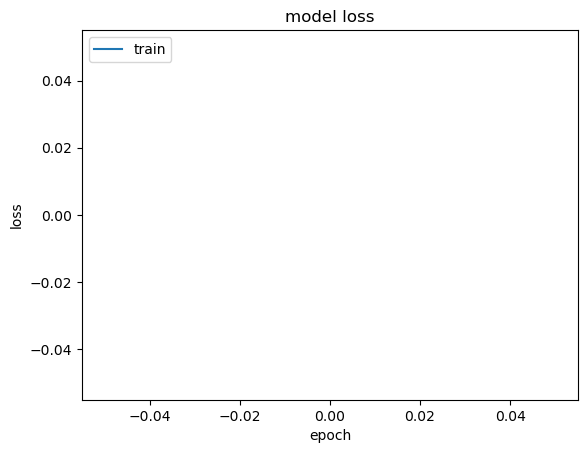

In [14]:
# run the test harness for evaluating a model
def run_test_harness(act):
    # load dataset
    trainX, trainY, testX, testY = load_dataset(d='cifar')
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # define model
    model = define_model_cifar_no_batch_res(act)
    opt = SGD(lr=0.01, decay=0.0001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy',  metrics=['accuracy'])
    # fit model
    history=model.fit(trainX, trainY, epochs=25, batch_size=512, verbose=0)
    _, acc = model.evaluate(testX, testY, verbose=1)
    print('> %.3f' % (acc * 100.0))
    _, acc2 = model.evaluate(trainX, trainY, verbose=1)
    print('> %.3f' % (acc2 * 100.0))
    # save model
    #model.save('final_model.h5')
    return model,history, acc

hist = []
accuracy = []
act = [tf.keras.activations.swish, tf.keras.activations.gelu, tf.keras.layers.LeakyReLU(alpha=0.1), 'relu', 'elu', 'selu', 'softplus', 'softsign', TaLU(alpha=0.0, trainable=True)]
#act = [TaLU(alpha=0.0, trainable=True)]
for i in act:
    # entry point, run the test harness
    model, history, acc = run_test_harness(act=i)
    hist.append(history)
    accuracy.append(acc)
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    #plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    #plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

# lr = 0.1 CIFAR Batch

313/313 [==============================] - 2s 6ms/step - loss: nan - accuracy: 0.1000
> 10.000
1563/1563 [==============================] - 8s 5ms/step - loss: nan - accuracy: 0.1000
> 10.000


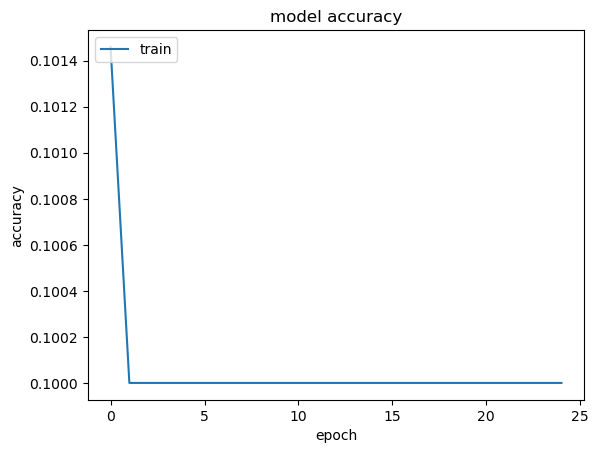

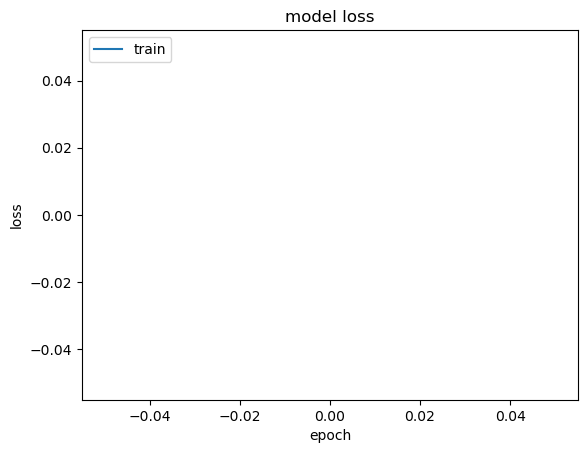

313/313 [==============================] - 2s 7ms/step - loss: 2.3030 - accuracy: 0.1000
> 10.000
1563/1563 [==============================] - 8s 5ms/step - loss: 2.3030 - accuracy: 0.1000
> 10.000


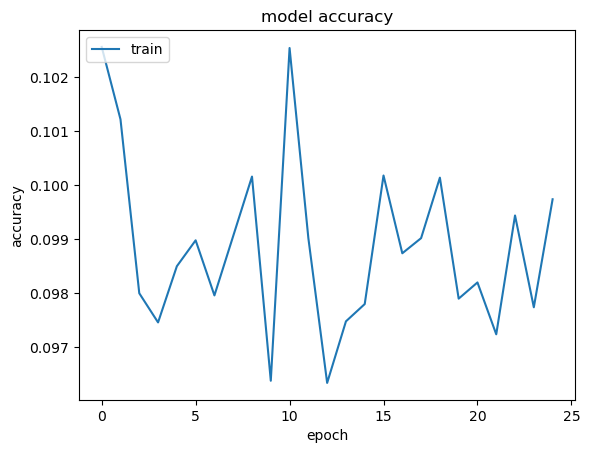

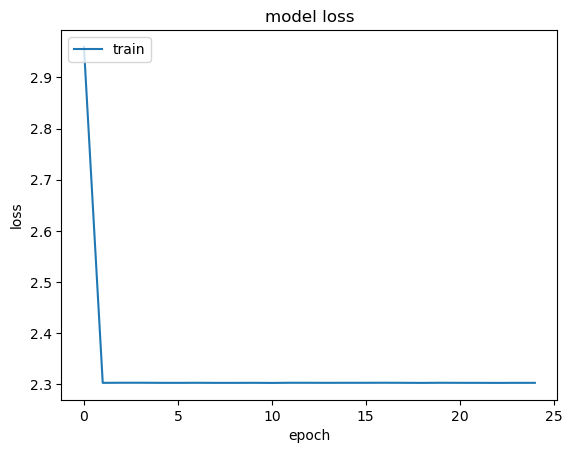

313/313 [==============================] - 2s 5ms/step - loss: nan - accuracy: 0.1000
> 10.000
1563/1563 [==============================] - 7s 5ms/step - loss: nan - accuracy: 0.1000
> 10.000


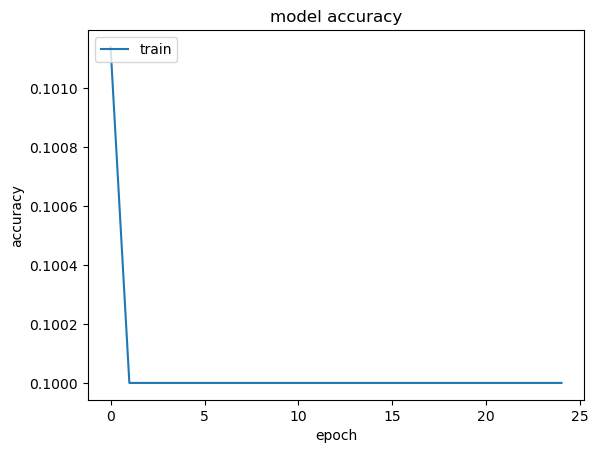

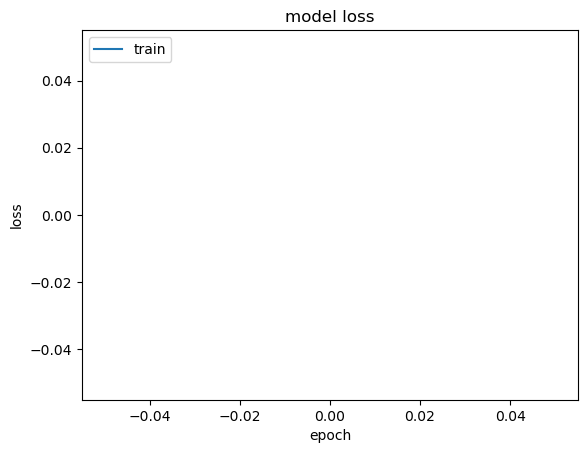

313/313 [==============================] - 2s 6ms/step - loss: 2.3031 - accuracy: 0.1000
> 10.000
1563/1563 [==============================] - 7s 4ms/step - loss: 2.3031 - accuracy: 0.1000
> 10.000


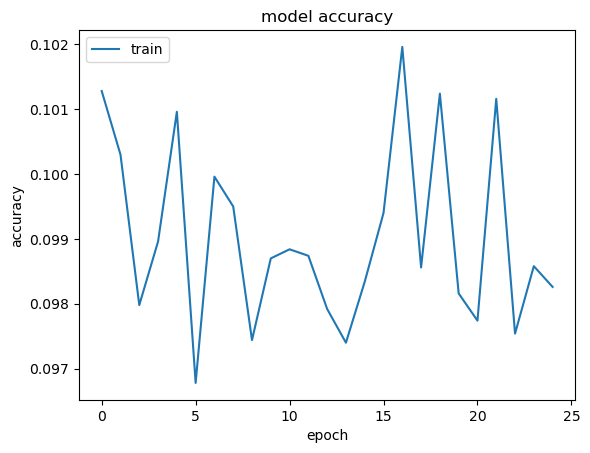

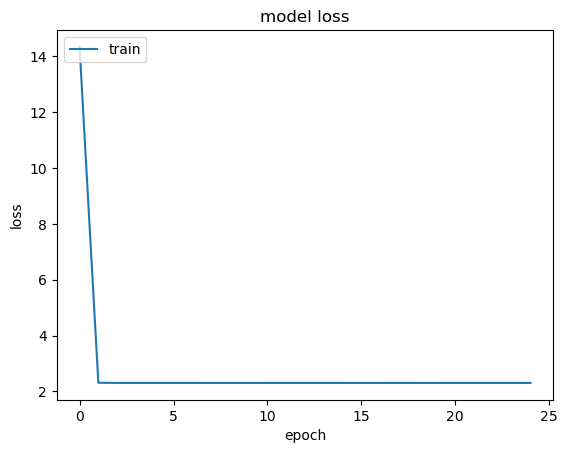

313/313 [==============================] - 2s 5ms/step - loss: nan - accuracy: 0.1000
> 10.000
1563/1563 [==============================] - 8s 5ms/step - loss: nan - accuracy: 0.1000
> 10.000


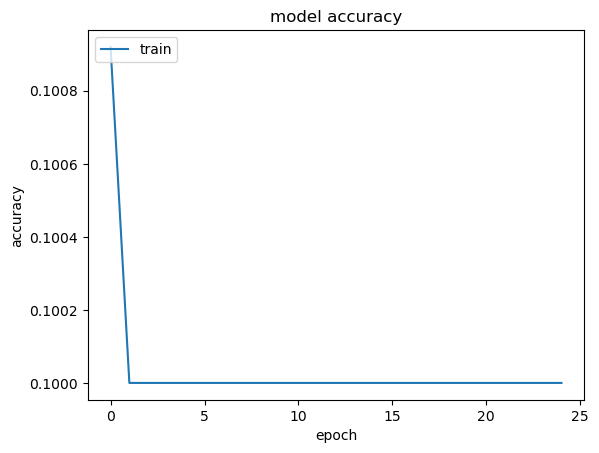

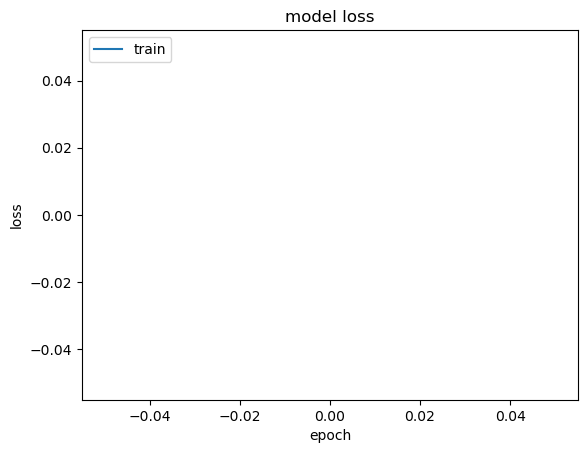

313/313 [==============================] - 2s 6ms/step - loss: nan - accuracy: 0.1000
> 10.000
1563/1563 [==============================] - 7s 5ms/step - loss: nan - accuracy: 0.1000
> 10.000


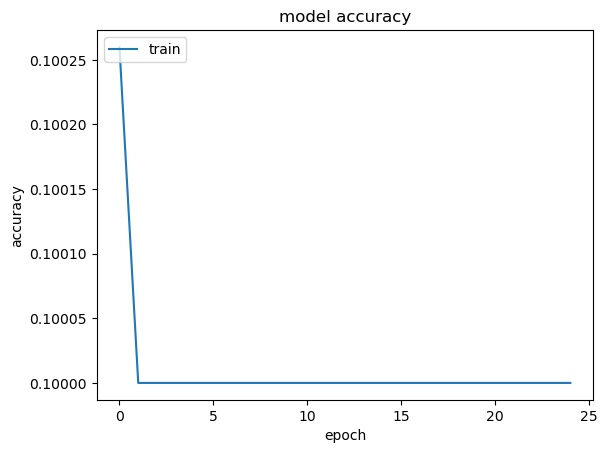

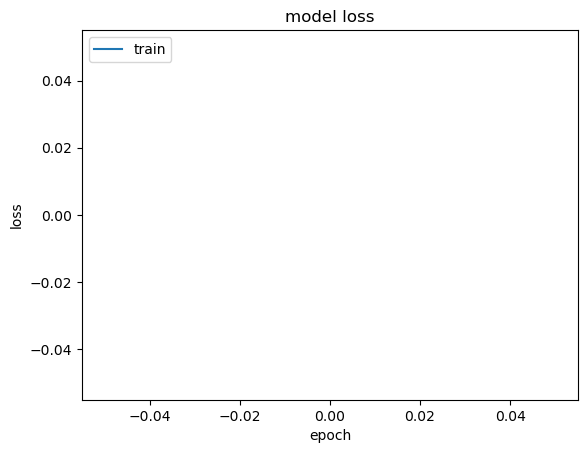

313/313 [==============================] - 2s 5ms/step - loss: nan - accuracy: 0.1000
> 10.000
1563/1563 [==============================] - 8s 5ms/step - loss: nan - accuracy: 0.1000
> 10.000


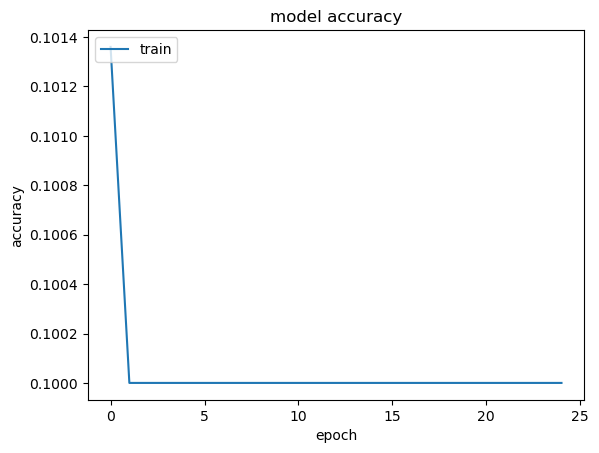

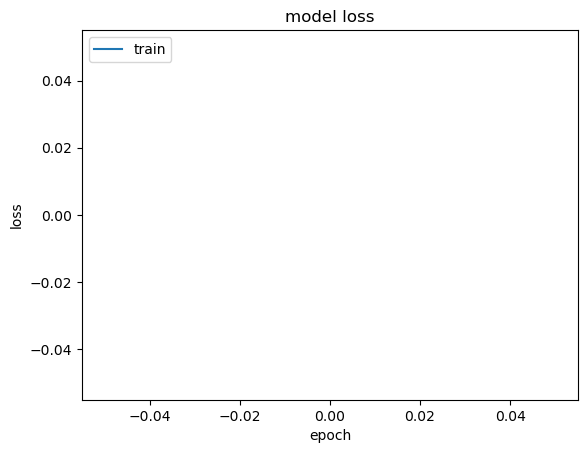

313/313 [==============================] - 2s 6ms/step - loss: 1.6491 - accuracy: 0.6484
> 64.840
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0031 - accuracy: 1.0000
> 99.998


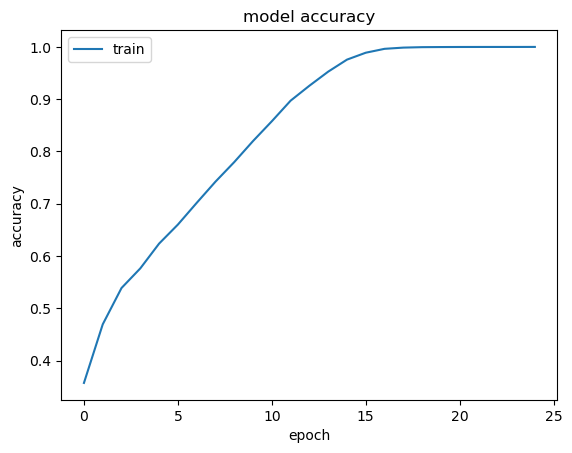

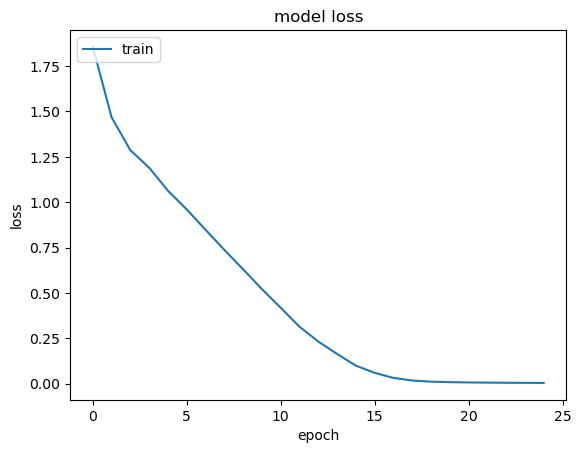

2023-04-15 20:01:49.361691: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape ingradient_tape/model_26/conv2d_620/ta_lu_10/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


313/313 [==============================] - 2s 6ms/step - loss: 2.3506 - accuracy: 0.1000
> 10.000
1563/1563 [==============================] - 8s 5ms/step - loss: 2.3506 - accuracy: 0.1000
> 10.000


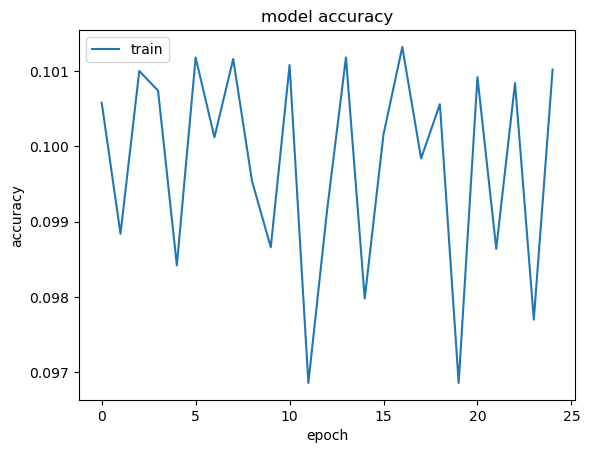

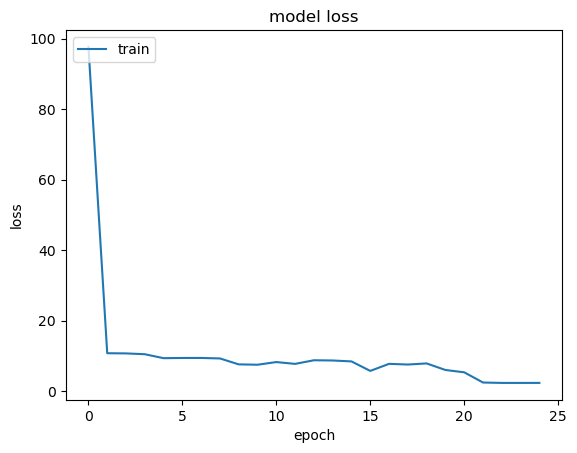

In [15]:
# run the test harness for evaluating a model
def run_test_harness(act):
    # load dataset
    trainX, trainY, testX, testY = load_dataset(d='cifar')
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # define model
    model = define_model_cifar_batch_res(act)
    opt = SGD(lr=0.1, decay=0.0001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy',  metrics=['accuracy'])
    # fit model
    history=model.fit(trainX, trainY, epochs=25, batch_size=512, verbose=0)
    _, acc = model.evaluate(testX, testY, verbose=1)
    print('> %.3f' % (acc * 100.0))
    _, acc2 = model.evaluate(trainX, trainY, verbose=1)
    print('> %.3f' % (acc2 * 100.0))
    # save model
    #model.save('final_model.h5')
    return model,history, acc

hist = []
accuracy = []
act = [tf.keras.activations.swish, tf.keras.activations.gelu, tf.keras.layers.LeakyReLU(alpha=0.1), 'relu', 'elu', 'selu', 'softplus', 'softsign', TaLU(alpha=0.0, trainable=True)]
#act = [TaLU(alpha=0.0, trainable=True)]
for i in act:
    # entry point, run the test harness
    model, history, acc = run_test_harness(act=i)
    hist.append(history)
    accuracy.append(acc)
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    #plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    #plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

313/313 [==============================] - 2s 7ms/step - loss: 1.7184 - accuracy: 0.6882
> 68.820
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0016 - accuracy: 1.0000
> 100.000


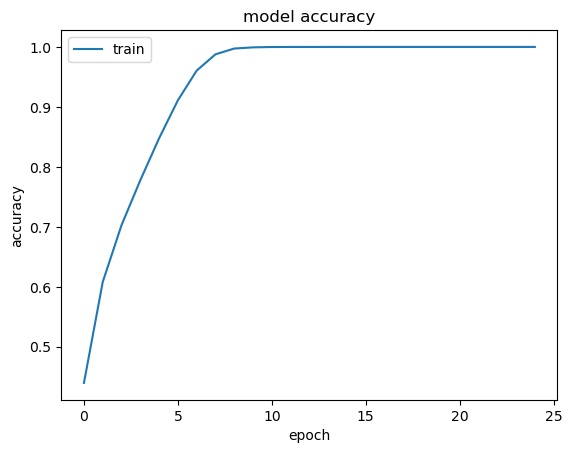

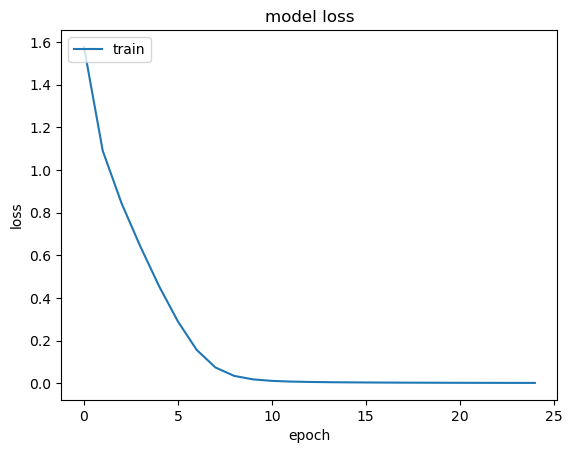

313/313 [==============================] - 2s 7ms/step - loss: 1.5894 - accuracy: 0.6880
> 68.800
1563/1563 [==============================] - 9s 6ms/step - loss: 0.0015 - accuracy: 1.0000
> 100.000


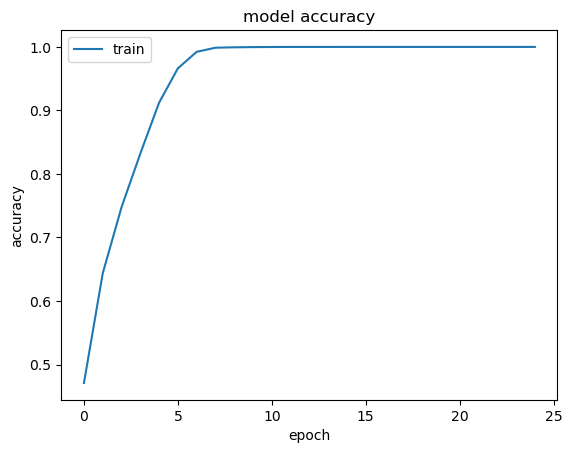

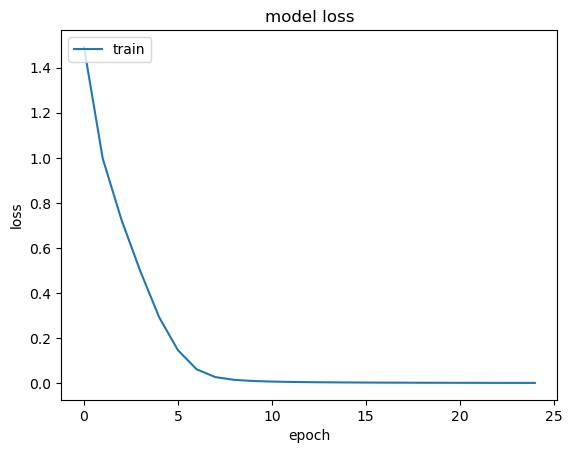

313/313 [==============================] - 2s 7ms/step - loss: 1.5889 - accuracy: 0.6969
> 69.690
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0015 - accuracy: 1.0000
> 100.000


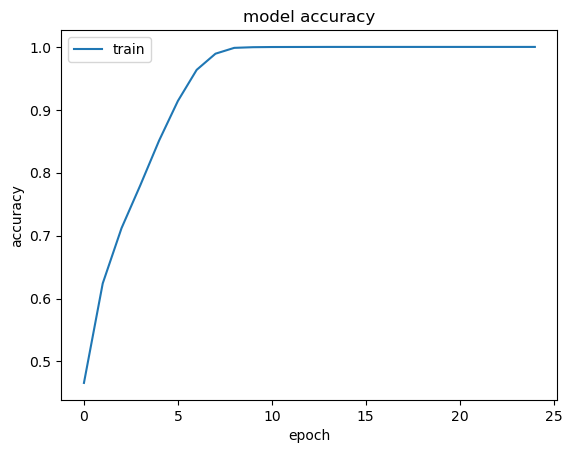

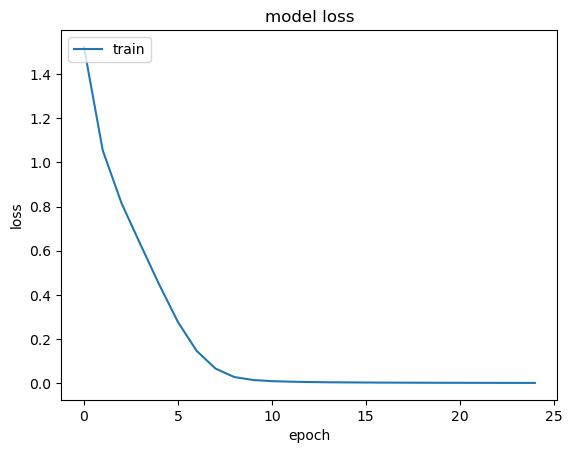

313/313 [==============================] - 2s 6ms/step - loss: 1.6781 - accuracy: 0.6853
> 68.530
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0014 - accuracy: 1.0000
> 100.000


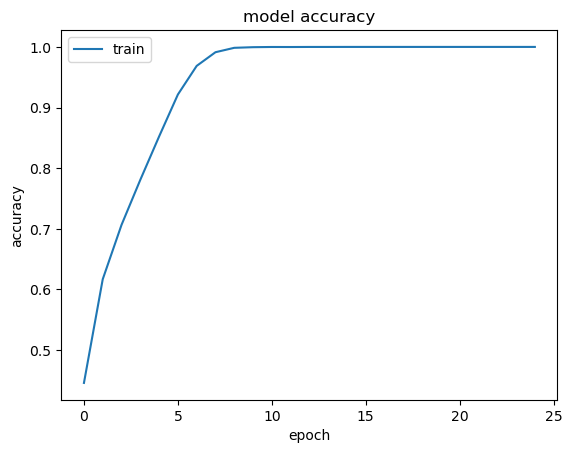

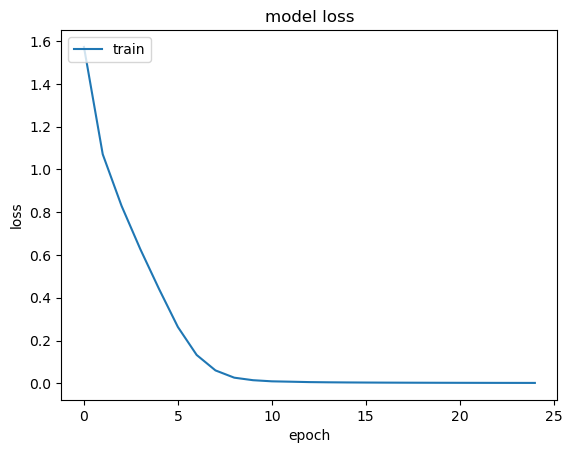

313/313 [==============================] - 2s 6ms/step - loss: 2.0143 - accuracy: 0.6612
> 66.120
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0032 - accuracy: 1.0000
> 100.000


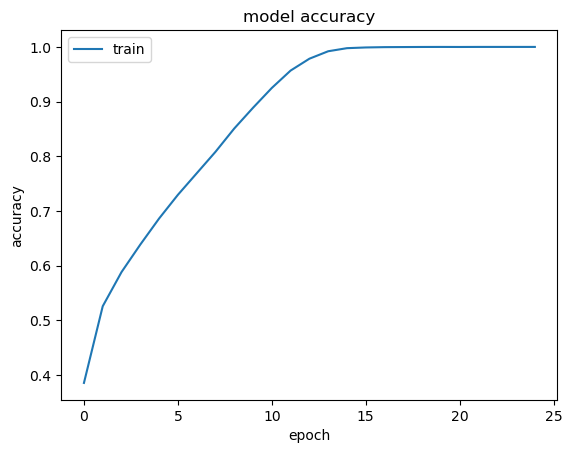

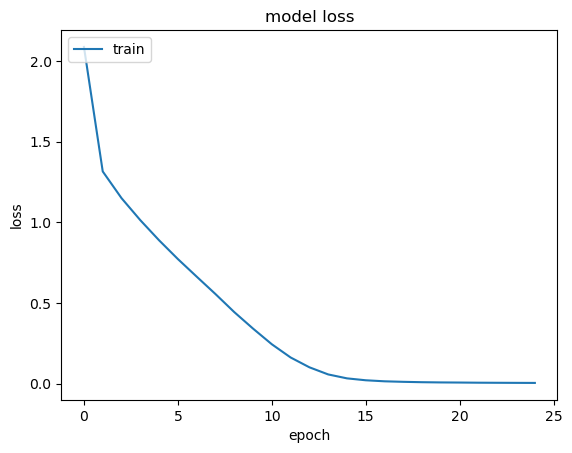

313/313 [==============================] - 2s 7ms/step - loss: 1.8257 - accuracy: 0.6771
> 67.710
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0024 - accuracy: 1.0000
> 100.000


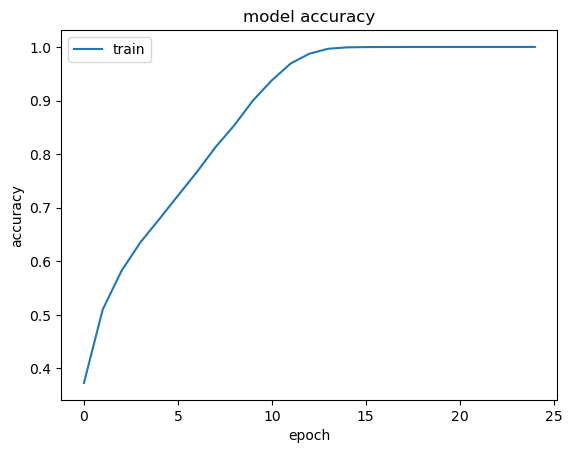

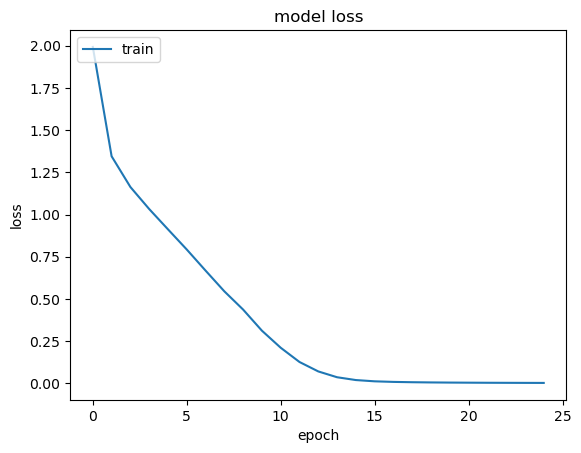

313/313 [==============================] - 2s 6ms/step - loss: 2.2457 - accuracy: 0.6334
> 63.340
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0062 - accuracy: 1.0000
> 100.000


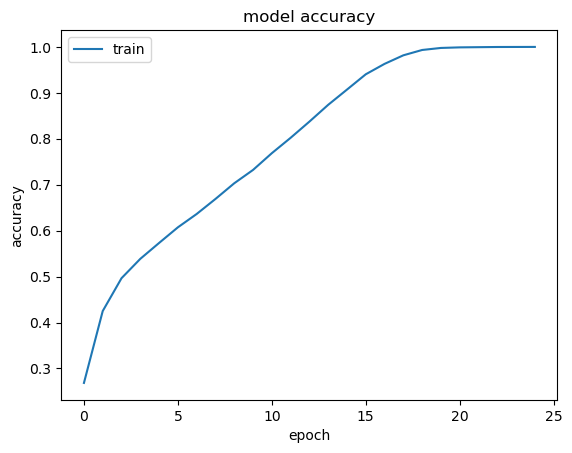

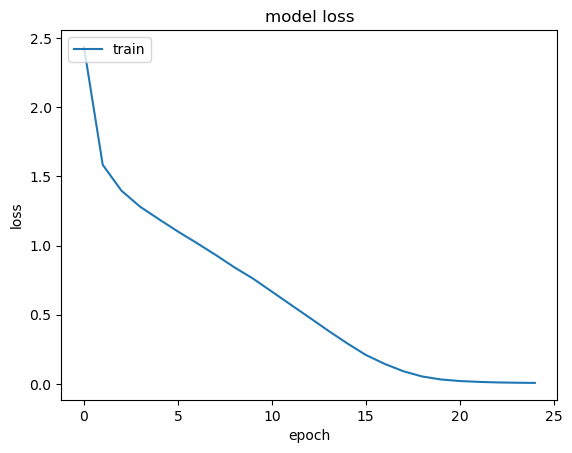

313/313 [==============================] - 3s 7ms/step - loss: 1.2546 - accuracy: 0.6501
> 65.010
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0166 - accuracy: 1.0000
> 99.996


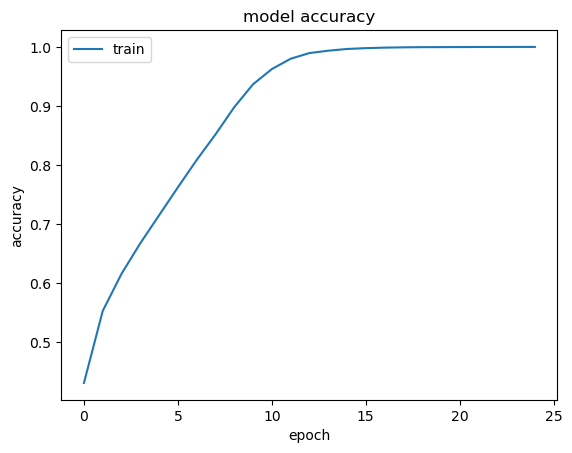

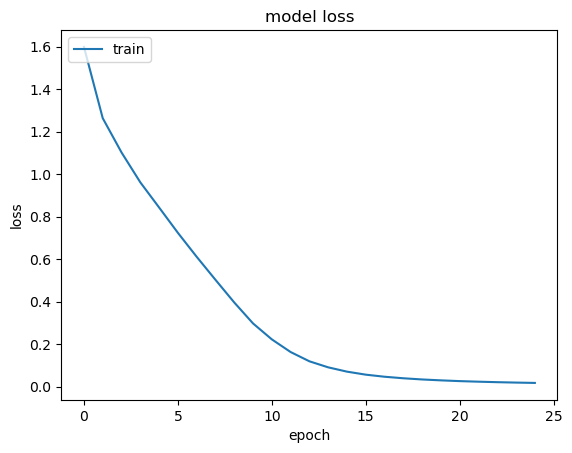

2023-04-15 20:56:50.696655: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape ingradient_tape/model_35/conv2d_683/ta_lu_11/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


313/313 [==============================] - 2s 7ms/step - loss: 1.6840 - accuracy: 0.6719
> 67.190
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0014 - accuracy: 1.0000
> 100.000


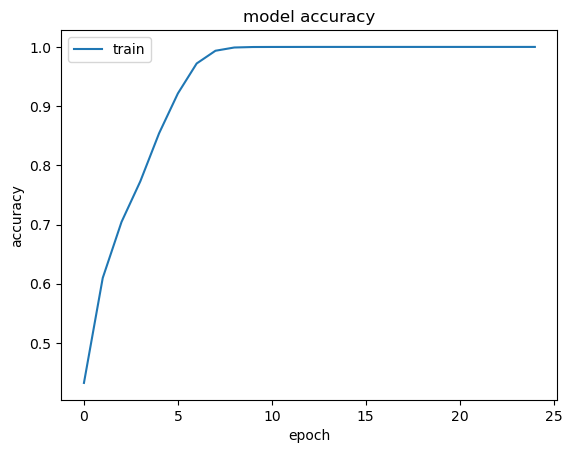

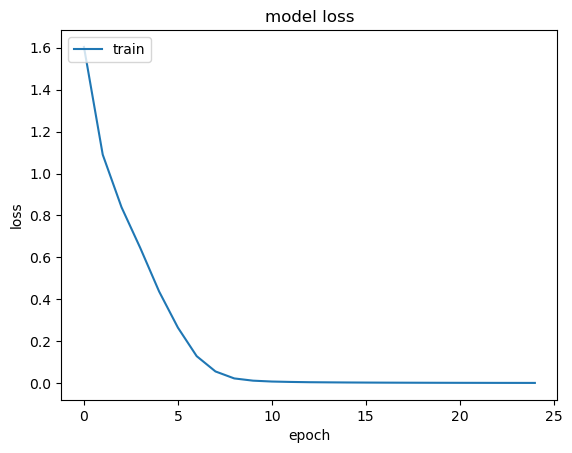

In [16]:
# run the test harness for evaluating a model
def run_test_harness(act):
    # load dataset
    trainX, trainY, testX, testY = load_dataset(d='cifar')
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # define model
    model = define_model_cifar_batch_res(act)
    opt = SGD(lr=0.01, decay=0.0001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy',  metrics=['accuracy'])
    # fit model
    history=model.fit(trainX, trainY, epochs=25, batch_size=512, verbose=0)
    _, acc = model.evaluate(testX, testY, verbose=1)
    print('> %.3f' % (acc * 100.0))
    _, acc2 = model.evaluate(trainX, trainY, verbose=1)
    print('> %.3f' % (acc2 * 100.0))
    # save model
    #model.save('final_model.h5')
    return model,history, acc

hist = []
accuracy = []
act = [tf.keras.activations.swish, tf.keras.activations.gelu, tf.keras.layers.LeakyReLU(alpha=0.1), 'relu', 'elu', 'selu', 'softplus', 'softsign', TaLU(alpha=0.0, trainable=True)]
#act = [TaLU(alpha=0.0, trainable=True)]
for i in act:
    # entry point, run the test harness
    model, history, acc = run_test_harness(act=i)
    hist.append(history)
    accuracy.append(acc)
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    #plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    #plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [17]:
# lr = 0.1 mnist no batch

313/313 [==============================] - 2s 5ms/step - loss: nan - accuracy: 0.0980
> 9.800
1875/1875 [==============================] - 9s 5ms/step - loss: nan - accuracy: 0.0987
> 9.872


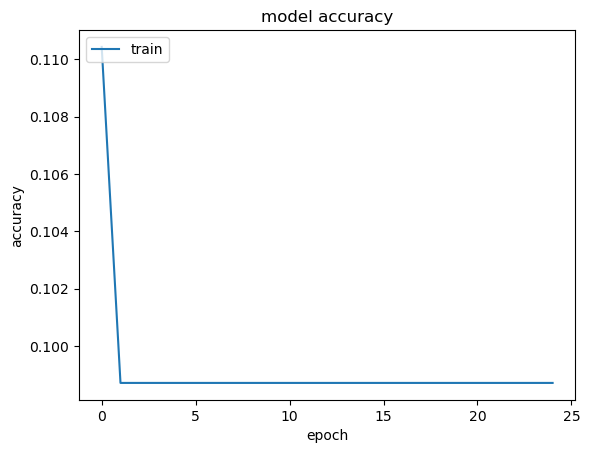

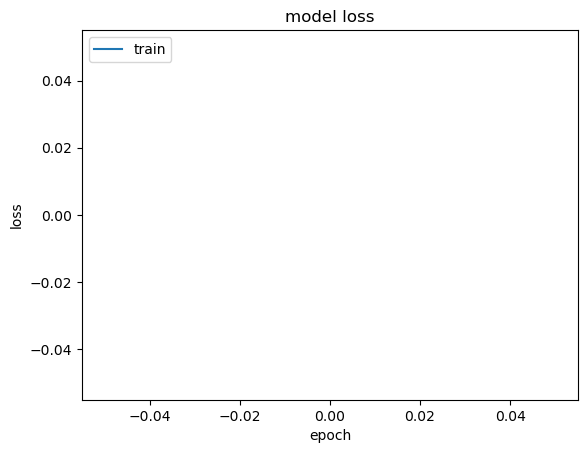

313/313 [==============================] - 2s 5ms/step - loss: nan - accuracy: 0.0980
> 9.800
1875/1875 [==============================] - 9s 5ms/step - loss: nan - accuracy: 0.0987
> 9.872


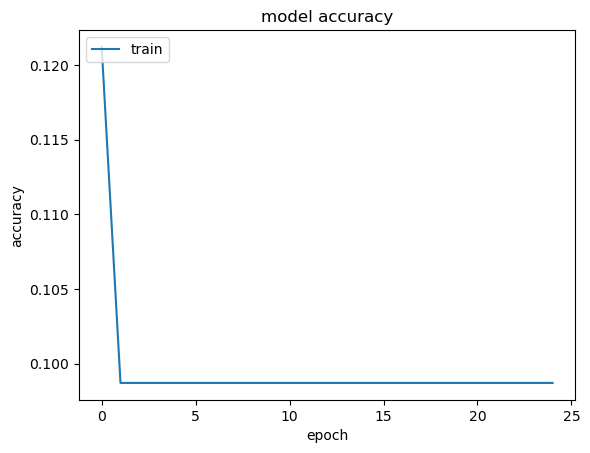

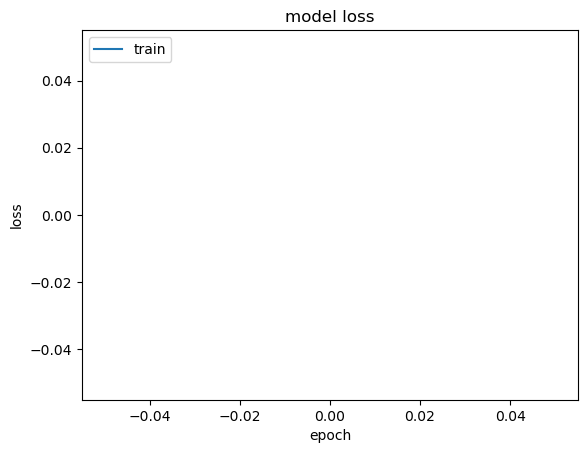

313/313 [==============================] - 2s 5ms/step - loss: nan - accuracy: 0.0980
> 9.800
1875/1875 [==============================] - 9s 5ms/step - loss: nan - accuracy: 0.0987
> 9.872


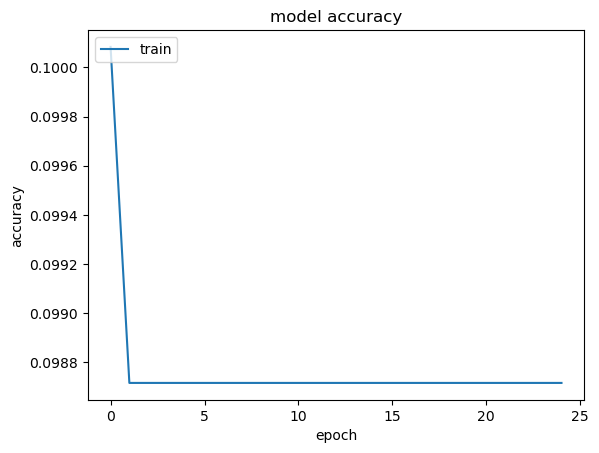

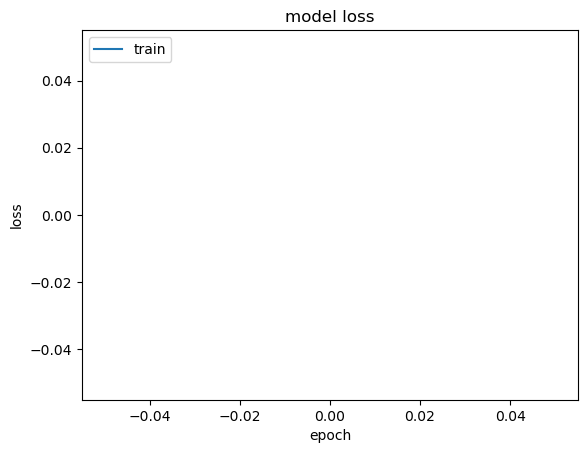

313/313 [==============================] - 2s 5ms/step - loss: 0.0713 - accuracy: 0.9849
> 98.490
1875/1875 [==============================] - 9s 5ms/step - loss: 3.1498e-04 - accuracy: 1.0000
> 100.000


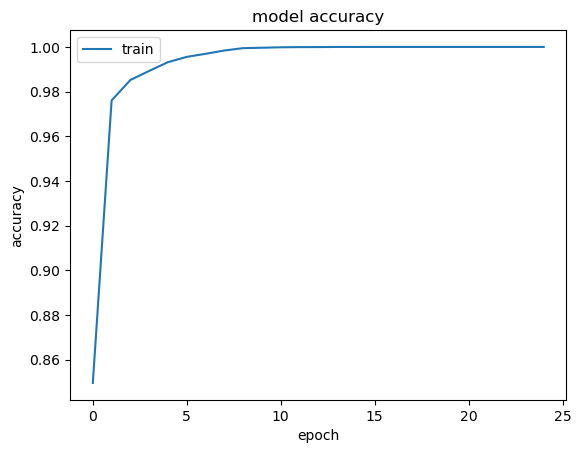

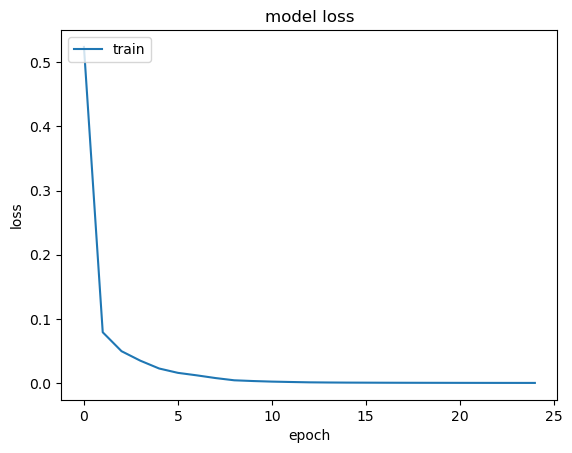

313/313 [==============================] - 2s 5ms/step - loss: nan - accuracy: 0.0980
> 9.800
1875/1875 [==============================] - 9s 5ms/step - loss: nan - accuracy: 0.0987
> 9.872


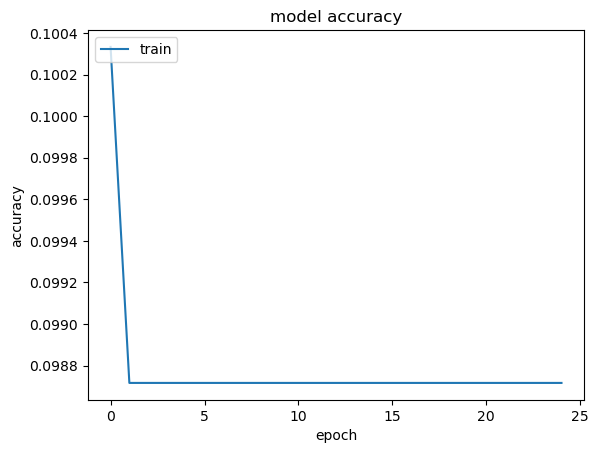

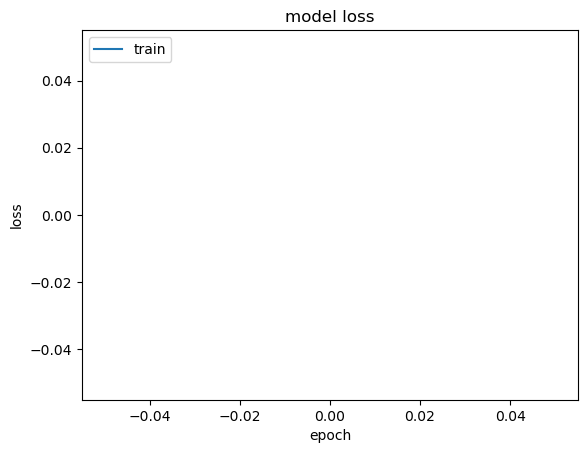

313/313 [==============================] - 2s 6ms/step - loss: nan - accuracy: 0.0980
> 9.800
1875/1875 [==============================] - 8s 4ms/step - loss: nan - accuracy: 0.0987
> 9.872


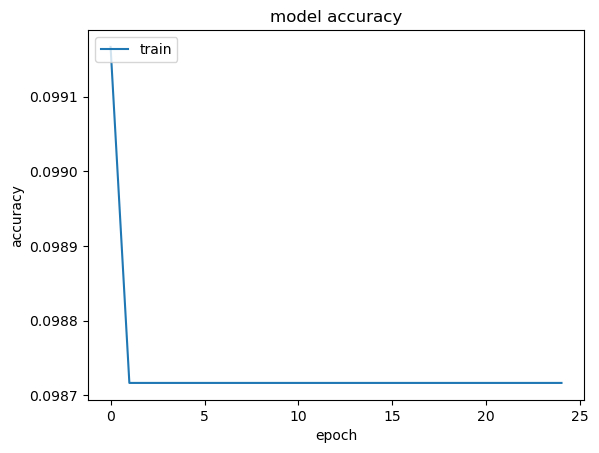

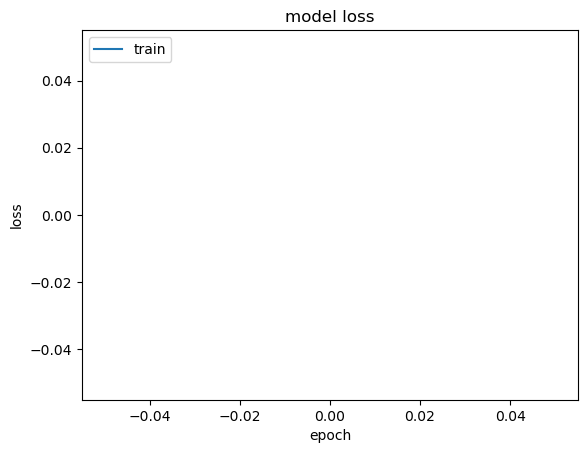

313/313 [==============================] - 2s 5ms/step - loss: nan - accuracy: 0.0980
> 9.800
1875/1875 [==============================] - 9s 5ms/step - loss: nan - accuracy: 0.0987
> 9.872


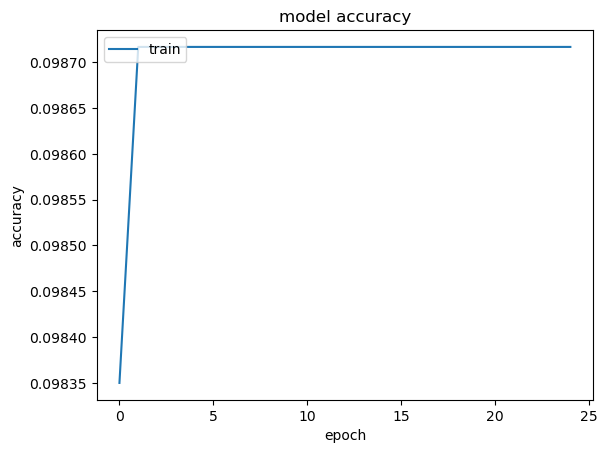

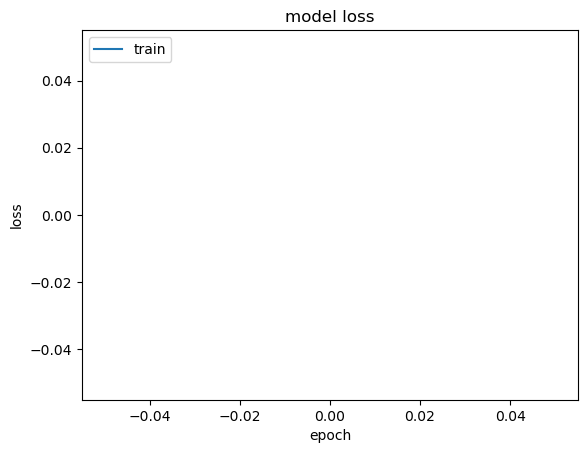

313/313 [==============================] - 2s 5ms/step - loss: 0.0293 - accuracy: 0.9899
> 98.990
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0013 - accuracy: 0.9999
> 99.995


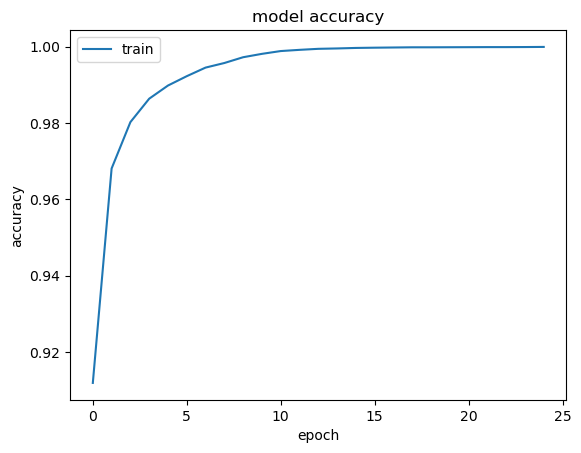

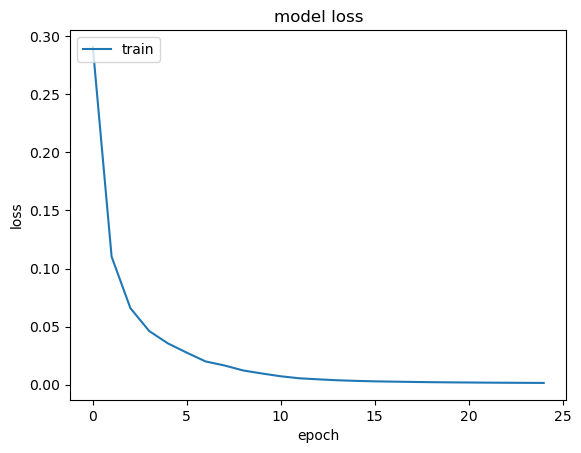

2023-04-15 21:37:18.170360: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape ingradient_tape/model_44/conv2d_746/ta_lu_12/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


313/313 [==============================] - 2s 5ms/step - loss: nan - accuracy: 0.0980
> 9.800
1875/1875 [==============================] - 9s 5ms/step - loss: nan - accuracy: 0.0987
> 9.872


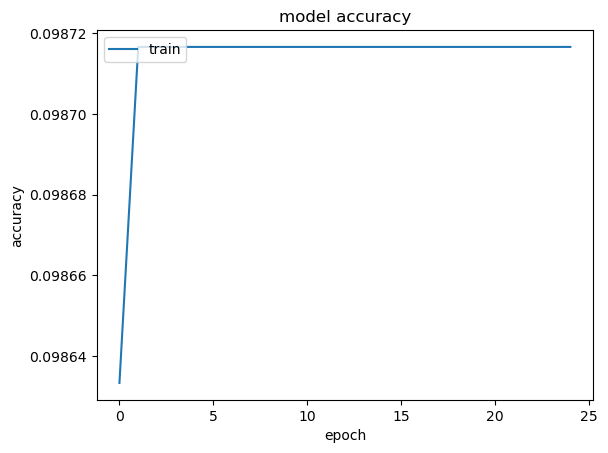

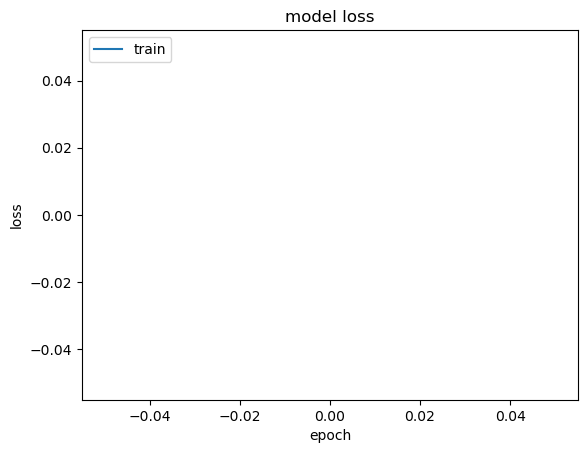

In [18]:
# run the test harness for evaluating a model
def run_test_harness(act):
    # load dataset
    trainX, trainY, testX, testY = load_dataset(d='mnist')
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # define model
    model = define_model_mnist_no_batch_res(act)
    opt = SGD(lr=0.1, decay=0.0001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy',  metrics=['accuracy'])
    # fit model
    history=model.fit(trainX, trainY, epochs=25, batch_size=512, verbose=0)
    _, acc = model.evaluate(testX, testY, verbose=1)
    print('> %.3f' % (acc * 100.0))
    _, acc2 = model.evaluate(trainX, trainY, verbose=1)
    print('> %.3f' % (acc2 * 100.0))
    # save model
    #model.save('final_model.h5')
    return model,history, acc

hist = []
accuracy = []
act = [tf.keras.activations.swish, tf.keras.activations.gelu, tf.keras.layers.LeakyReLU(alpha=0.1), 'relu', 'elu', 'selu', 'softplus', 'softsign', TaLU(alpha=0.0, trainable=True)]
#act = [TaLU(alpha=0.0, trainable=True)]
for i in act:
    # entry point, run the test harness
    model, history, acc = run_test_harness(act=i)
    hist.append(history)
    accuracy.append(acc)
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    #plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    #plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

313/313 [==============================] - 2s 5ms/step - loss: 0.0570 - accuracy: 0.9890
> 98.900
1875/1875 [==============================] - 9s 5ms/step - loss: 1.2539e-04 - accuracy: 1.0000
> 100.000


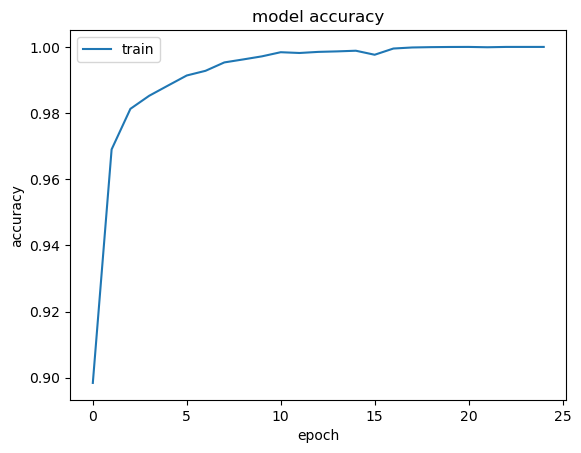

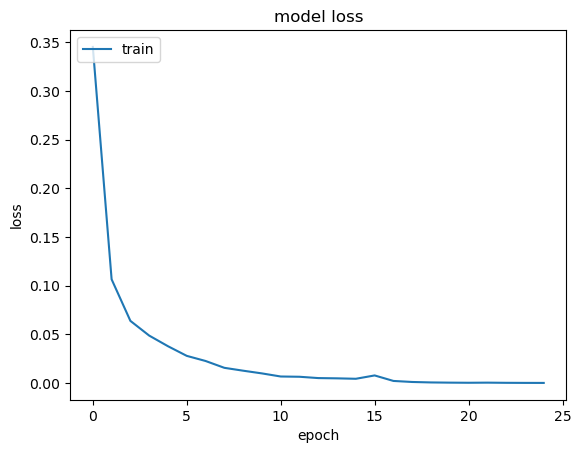

313/313 [==============================] - 2s 6ms/step - loss: 0.0519 - accuracy: 0.9894
> 98.940
1875/1875 [==============================] - 9s 5ms/step - loss: 1.0766e-04 - accuracy: 1.0000
> 100.000


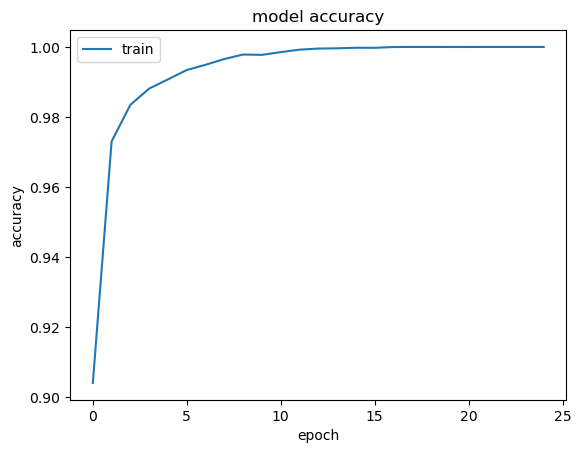

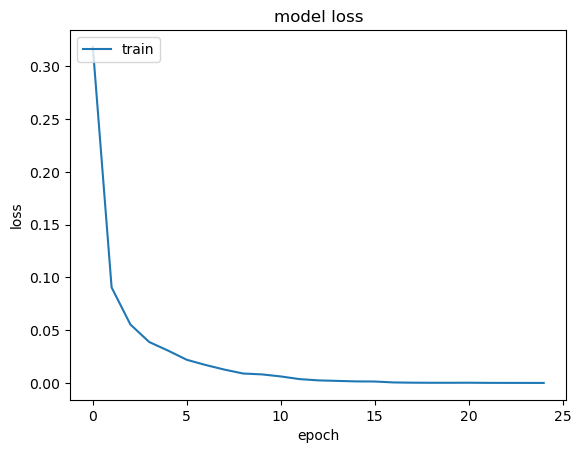

313/313 [==============================] - 2s 5ms/step - loss: 0.0488 - accuracy: 0.9888
> 98.880
1875/1875 [==============================] - 9s 5ms/step - loss: 3.1398e-04 - accuracy: 1.0000
> 100.000


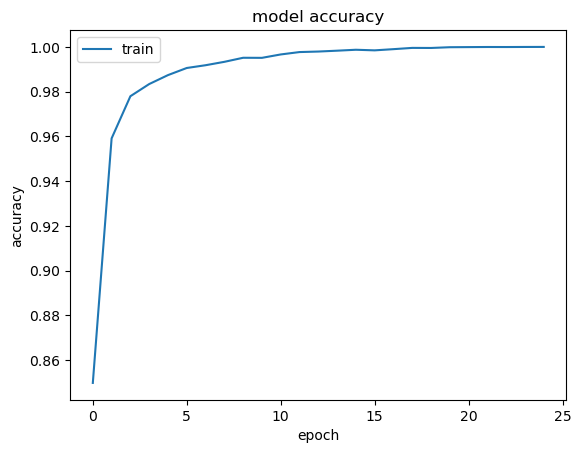

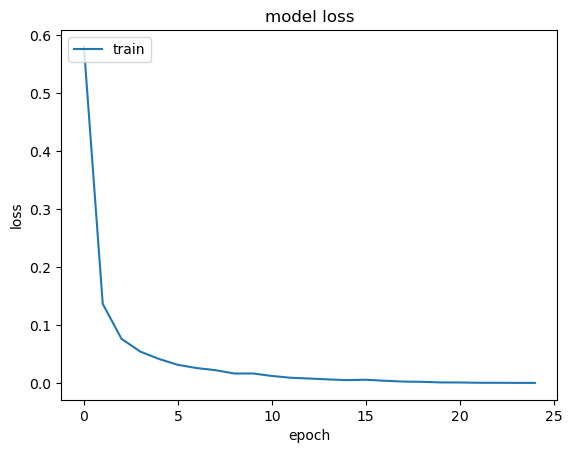

313/313 [==============================] - 2s 7ms/step - loss: 0.0459 - accuracy: 0.9882
> 98.820
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0038 - accuracy: 0.9993
> 99.928


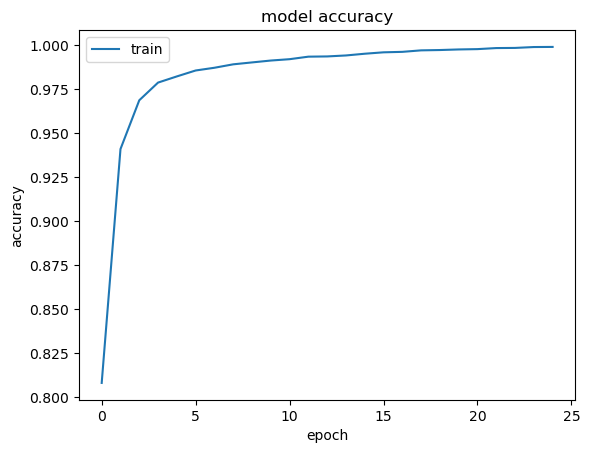

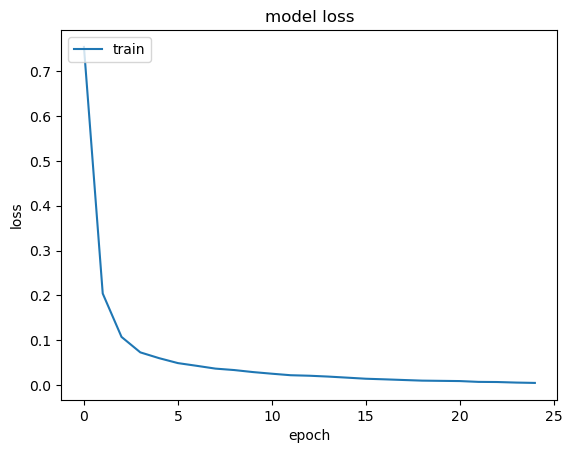

313/313 [==============================] - 2s 6ms/step - loss: nan - accuracy: 0.0980
> 9.800
1875/1875 [==============================] - 9s 5ms/step - loss: nan - accuracy: 0.0987
> 9.872


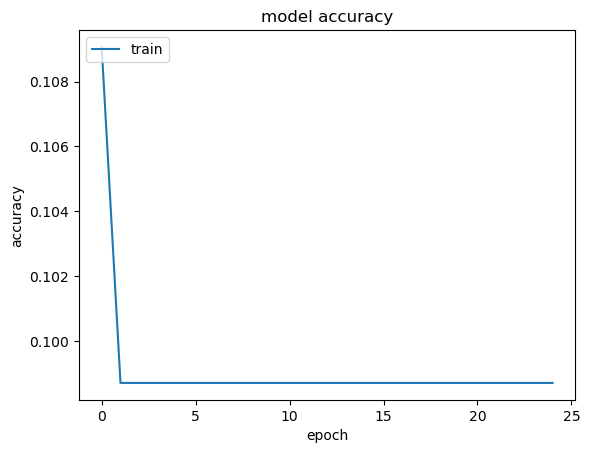

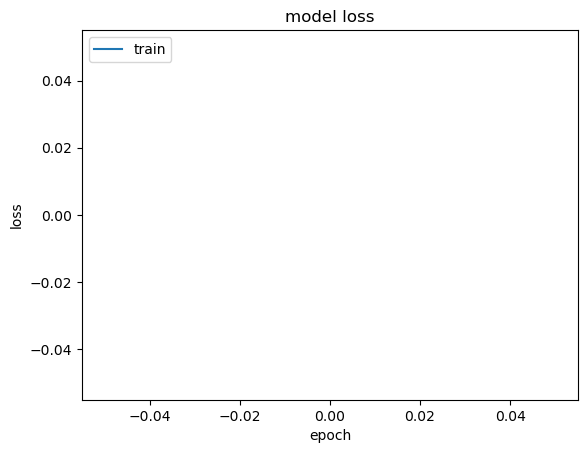

313/313 [==============================] - 2s 6ms/step - loss: nan - accuracy: 0.0980
> 9.800
1875/1875 [==============================] - 9s 5ms/step - loss: nan - accuracy: 0.0987
> 9.872


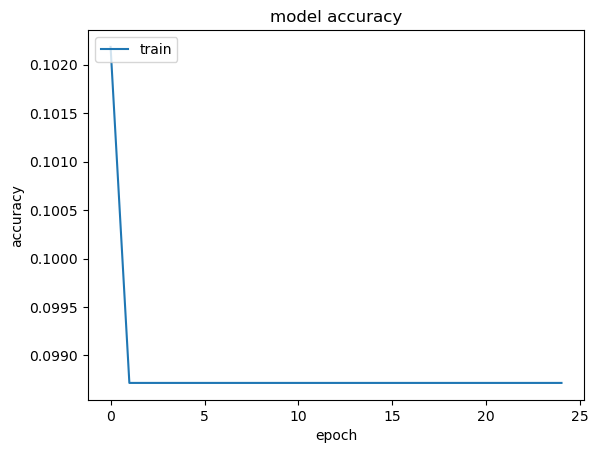

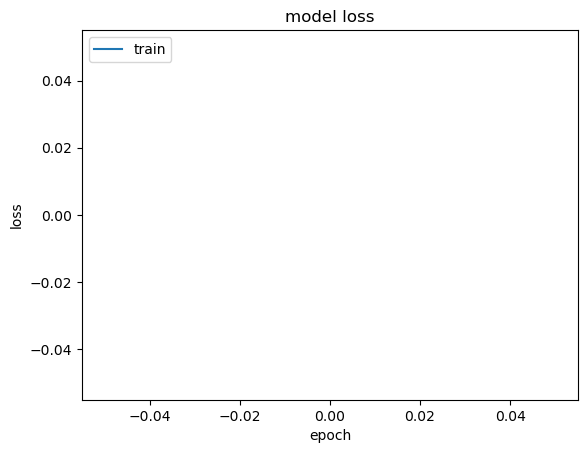

313/313 [==============================] - 2s 5ms/step - loss: 0.2025 - accuracy: 0.9402
> 94.020
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1906 - accuracy: 0.9444
> 94.437


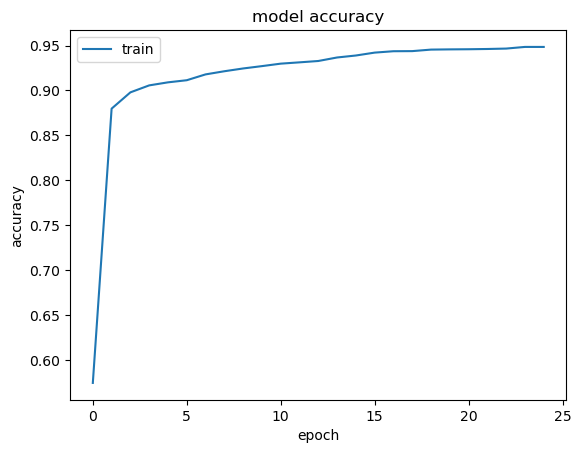

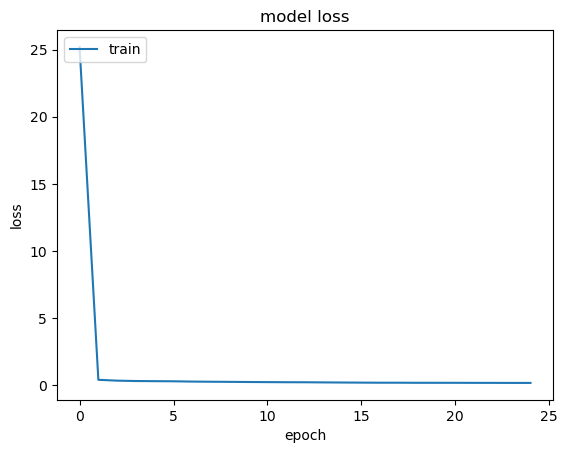

313/313 [==============================] - 2s 6ms/step - loss: 0.0341 - accuracy: 0.9886
> 98.860
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0162 - accuracy: 0.9973
> 99.725


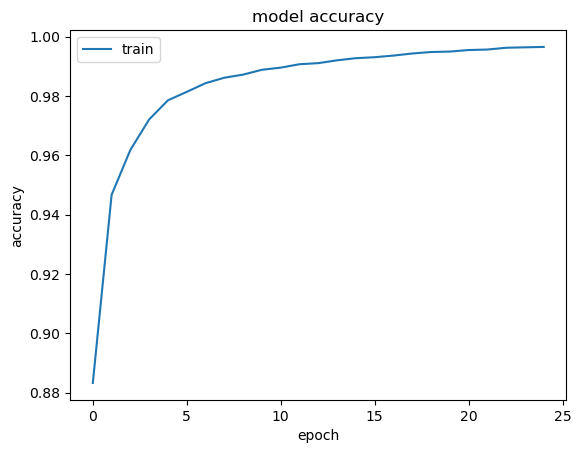

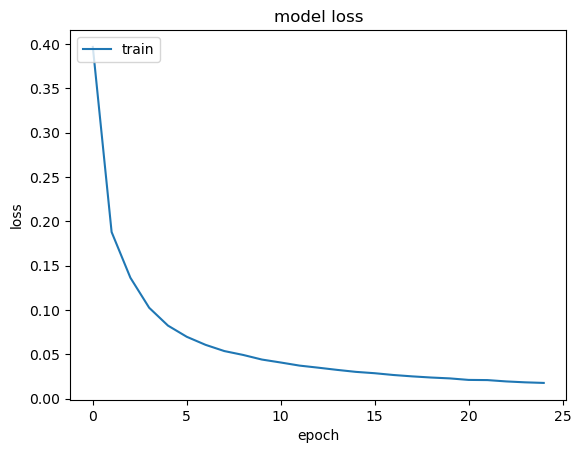

2023-04-15 22:16:58.240960: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape ingradient_tape/model_53/conv2d_809/ta_lu_13/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


313/313 [==============================] - 2s 6ms/step - loss: 0.0452 - accuracy: 0.9896
> 98.960
1875/1875 [==============================] - 10s 5ms/step - loss: 1.2998e-04 - accuracy: 1.0000
> 100.000


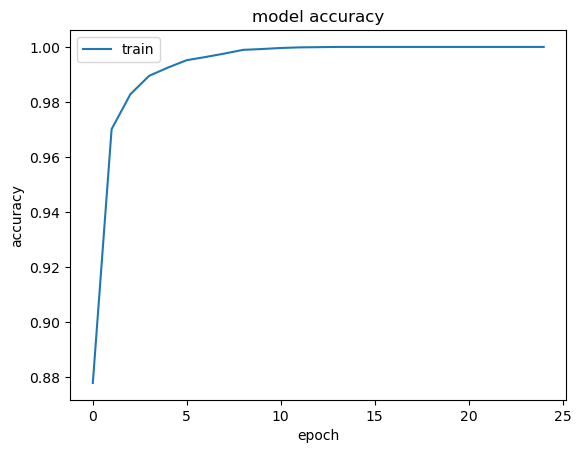

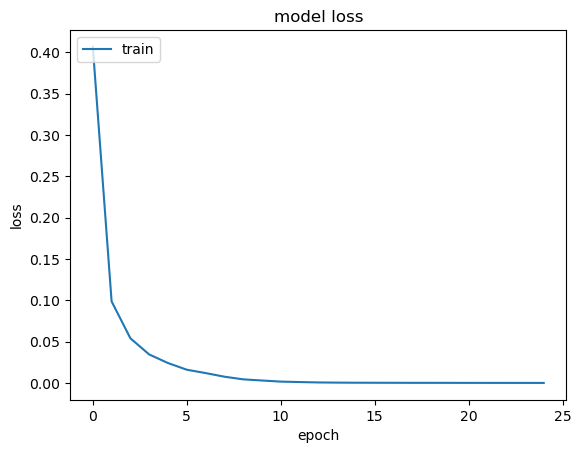

In [19]:
# run the test harness for evaluating a model
def run_test_harness(act):
    # load dataset
    trainX, trainY, testX, testY = load_dataset(d='mnist')
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # define model
    model = define_model_mnist_no_batch_res(act)
    opt = SGD(lr=0.01, decay=0.0001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy',  metrics=['accuracy'])
    # fit model
    history=model.fit(trainX, trainY, epochs=25, batch_size=512, verbose=0)
    _, acc = model.evaluate(testX, testY, verbose=1)
    print('> %.3f' % (acc * 100.0))
    _, acc2 = model.evaluate(trainX, trainY, verbose=1)
    print('> %.3f' % (acc2 * 100.0))
    # save model
    #model.save('final_model.h5')
    return model,history, acc

hist = []
accuracy = []
act = [tf.keras.activations.swish, tf.keras.activations.gelu, tf.keras.layers.LeakyReLU(alpha=0.1), 'relu', 'elu', 'selu', 'softplus', 'softsign', TaLU(alpha=0.0, trainable=True)]
#act = [TaLU(alpha=0.0, trainable=True)]
for i in act:
    # entry point, run the test harness
    model, history, acc = run_test_harness(act=i)
    hist.append(history)
    accuracy.append(acc)
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    #plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    #plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

313/313 [==============================] - 2s 6ms/step - loss: 2.3011 - accuracy: 0.1135
> 11.350
1875/1875 [==============================] - 10s 5ms/step - loss: 3.1860 - accuracy: 0.1124
> 11.237


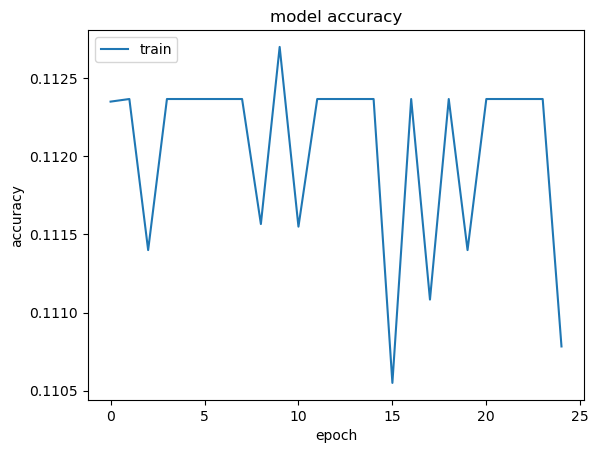

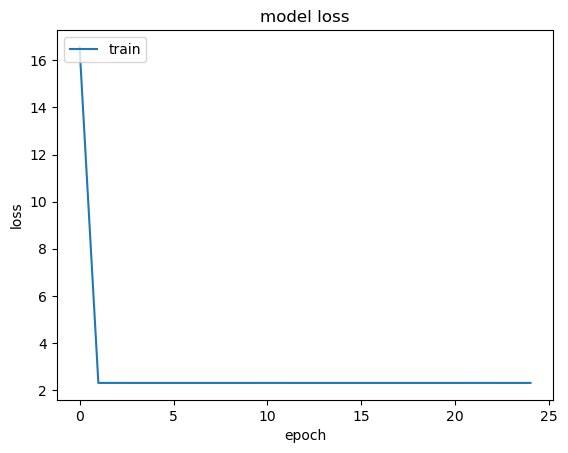

313/313 [==============================] - 3s 8ms/step - loss: nan - accuracy: 0.0980
> 9.800
1875/1875 [==============================] - 10s 5ms/step - loss: nan - accuracy: 0.0987
> 9.872


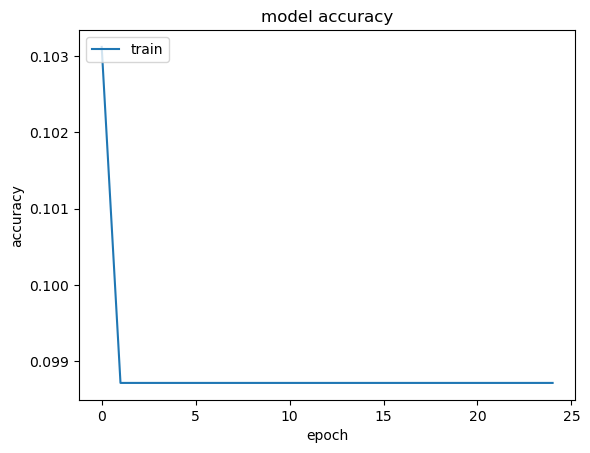

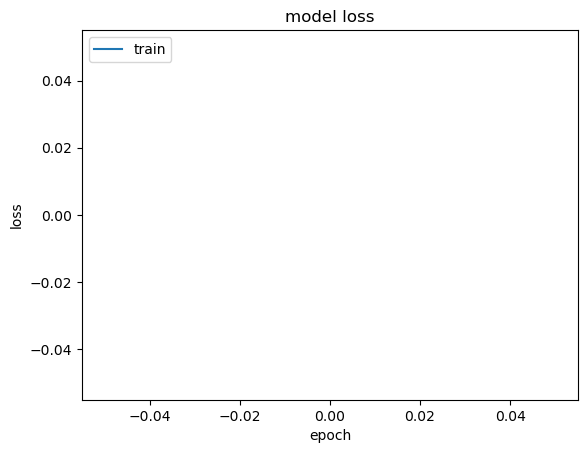

313/313 [==============================] - 2s 6ms/step - loss: nan - accuracy: 0.0980
> 9.800
1875/1875 [==============================] - 9s 5ms/step - loss: nan - accuracy: 0.0987
> 9.872


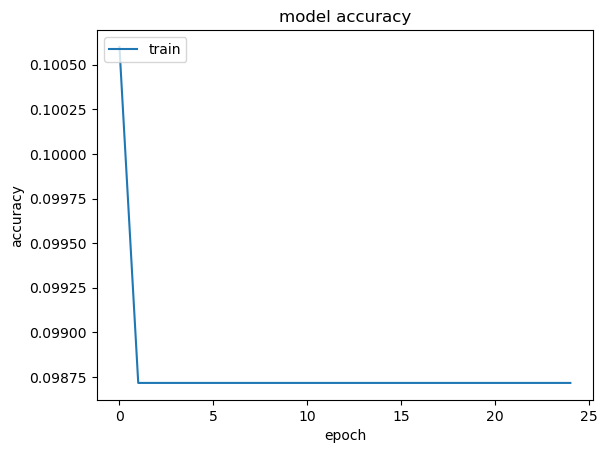

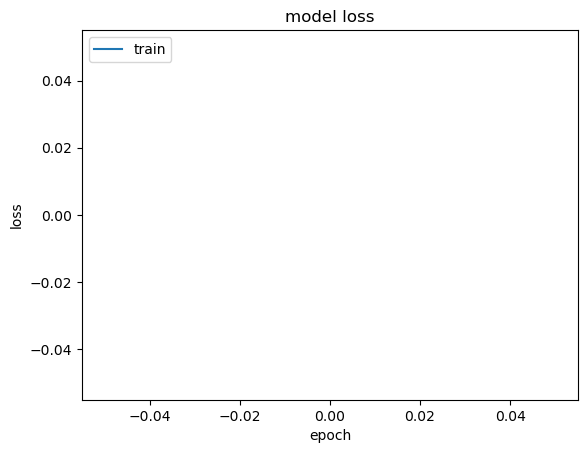

313/313 [==============================] - 2s 5ms/step - loss: nan - accuracy: 0.0980
> 9.800
1875/1875 [==============================] - 9s 5ms/step - loss: nan - accuracy: 0.0987
> 9.872


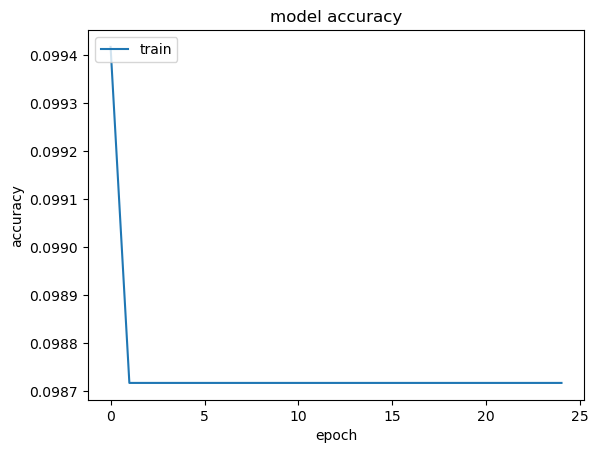

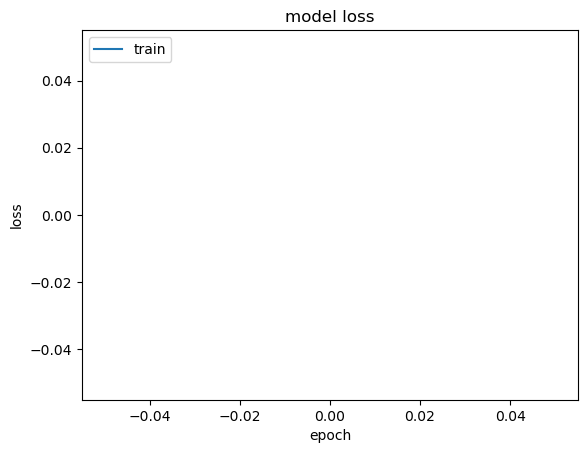

313/313 [==============================] - 2s 6ms/step - loss: nan - accuracy: 0.0980
> 9.800
1875/1875 [==============================] - 9s 5ms/step - loss: nan - accuracy: 0.0987
> 9.872


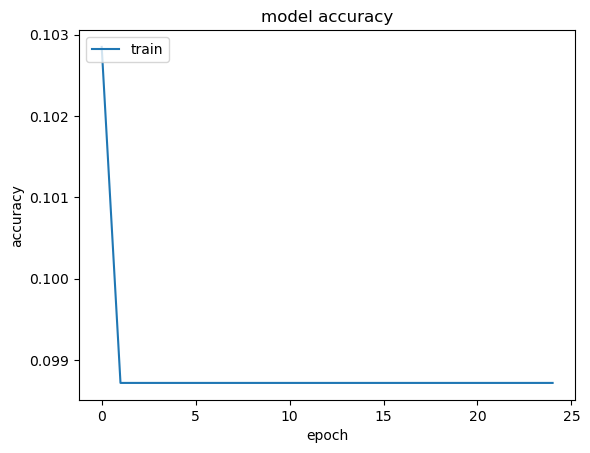

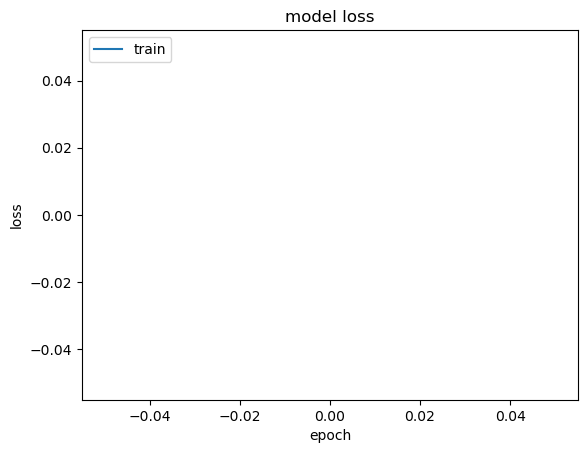

313/313 [==============================] - 2s 6ms/step - loss: nan - accuracy: 0.0980
> 9.800
1875/1875 [==============================] - 9s 5ms/step - loss: nan - accuracy: 0.0987
> 9.872


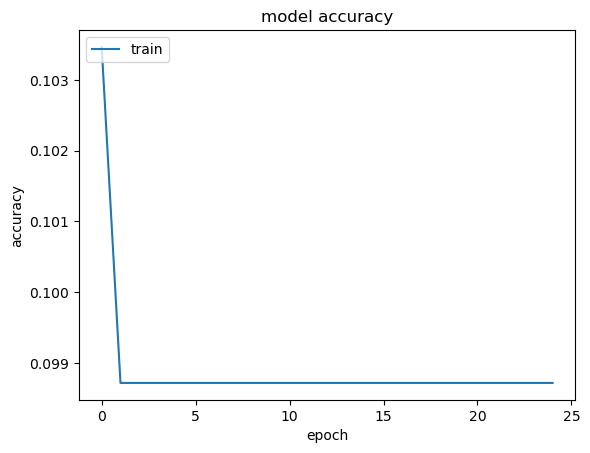

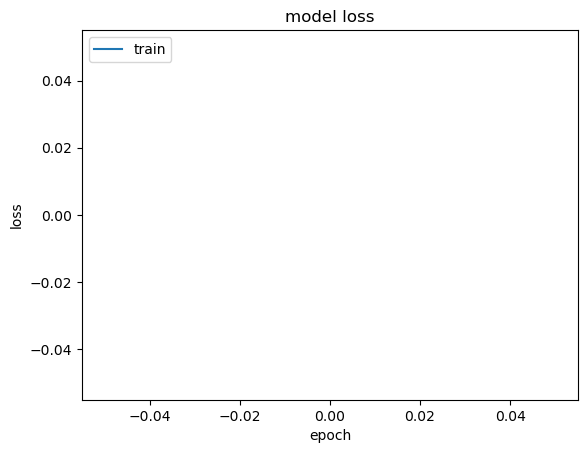

313/313 [==============================] - 2s 6ms/step - loss: 2.3011 - accuracy: 0.1135
> 11.350
1875/1875 [==============================] - 9s 5ms/step - loss: 2.3013 - accuracy: 0.1124
> 11.237


313/313 [==============================] - 2s 6ms/step - loss: 0.0276 - accuracy: 0.9917
> 99.170
1875/1875 [==============================] - 9s 5ms/step - loss: 6.1496e-04 - accuracy: 1.0000
> 99.998


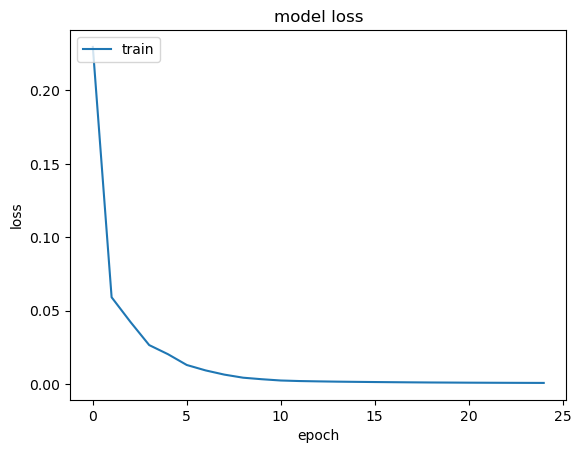

2023-04-15 23:01:41.933276: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape ingradient_tape/model_62/conv2d_872/ta_lu_14/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


313/313 [==============================] - 2s 6ms/step - loss: nan - accuracy: 0.0980
> 9.800
1875/1875 [==============================] - 10s 6ms/step - loss: nan - accuracy: 0.0987
> 9.872


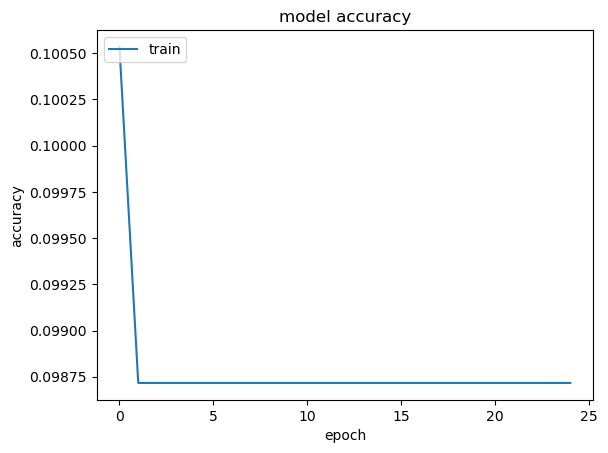

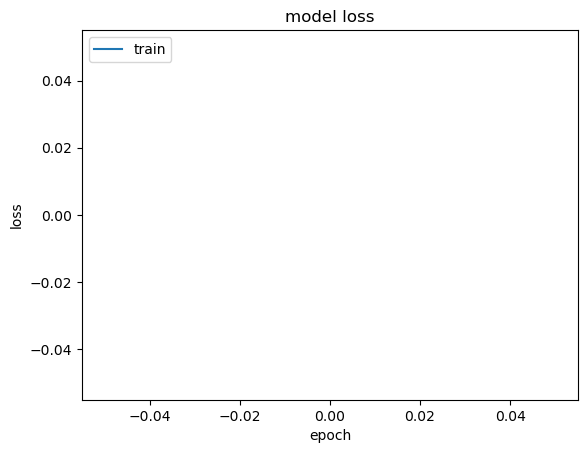

In [20]:
# run the test harness for evaluating a model
def run_test_harness(act):
    # load dataset
    trainX, trainY, testX, testY = load_dataset(d='mnist')
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # define model
    model = define_model_mnist_batch_res(act)
    opt = SGD(lr=0.1, decay=0.0001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy',  metrics=['accuracy'])
    # fit model
    history=model.fit(trainX, trainY, epochs=25, batch_size=512, verbose=0)
    _, acc = model.evaluate(testX, testY, verbose=1)
    print('> %.3f' % (acc * 100.0))
    _, acc2 = model.evaluate(trainX, trainY, verbose=1)
    print('> %.3f' % (acc2 * 100.0))
    # save model
    #model.save('final_model.h5')
    return model,history, acc

hist = []
accuracy = []
act = [tf.keras.activations.swish, tf.keras.activations.gelu, tf.keras.layers.LeakyReLU(alpha=0.1), 'relu', 'elu', 'selu', 'softplus', 'softsign', TaLU(alpha=0.0, trainable=True)]
#act = [TaLU(alpha=0.0, trainable=True)]
for i in act:
    # entry point, run the test harness
    model, history, acc = run_test_harness(act=i)
    hist.append(history)
    accuracy.append(acc)
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    #plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    #plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

313/313 [==============================] - 2s 6ms/step - loss: 0.0295 - accuracy: 0.9910
> 99.100
1875/1875 [==============================] - 10s 5ms/step - loss: 4.3627e-04 - accuracy: 1.0000
> 100.000


313/313 [==============================] - 2s 6ms/step - loss: 0.0313 - accuracy: 0.9904
> 99.040
1875/1875 [==============================] - 10s 5ms/step - loss: 4.7340e-04 - accuracy: 1.0000
> 100.000


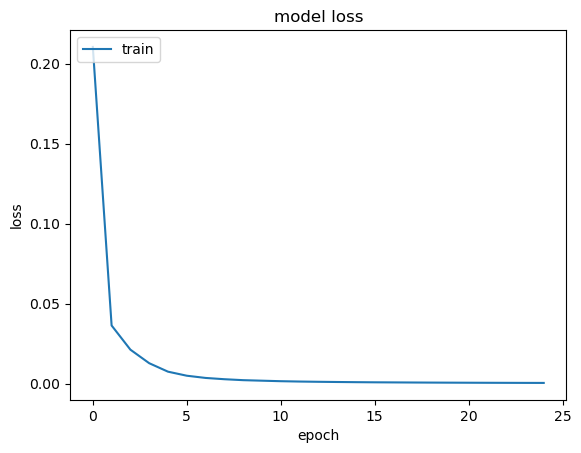

313/313 [==============================] - 2s 6ms/step - loss: 0.0276 - accuracy: 0.9914
> 99.140
1875/1875 [==============================] - 9s 5ms/step - loss: 5.3842e-04 - accuracy: 1.0000
> 100.000


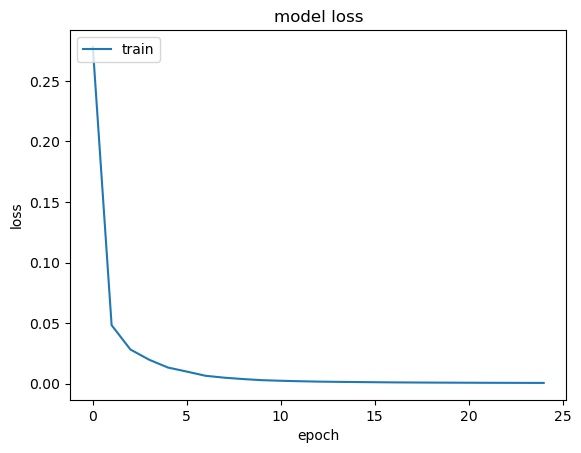

313/313 [==============================] - 2s 5ms/step - loss: 0.0274 - accuracy: 0.9914
> 99.140
1875/1875 [==============================] - 9s 5ms/step - loss: 5.0211e-04 - accuracy: 1.0000
> 100.000


313/313 [==============================] - 2s 6ms/step - loss: 0.0318 - accuracy: 0.9915
> 99.150
1875/1875 [==============================] - 9s 5ms/step - loss: 4.7044e-04 - accuracy: 1.0000
> 100.000


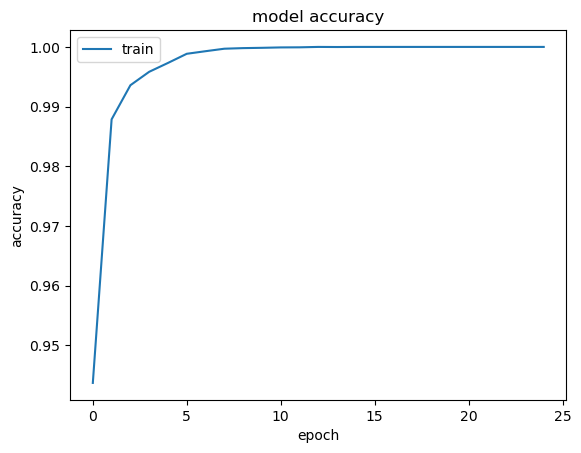

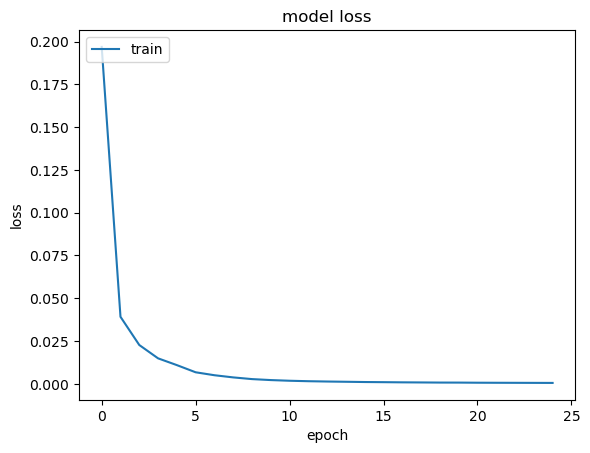

313/313 [==============================] - 2s 6ms/step - loss: 0.0308 - accuracy: 0.9914
> 99.140
1875/1875 [==============================] - 9s 5ms/step - loss: 7.3547e-04 - accuracy: 1.0000
> 100.000


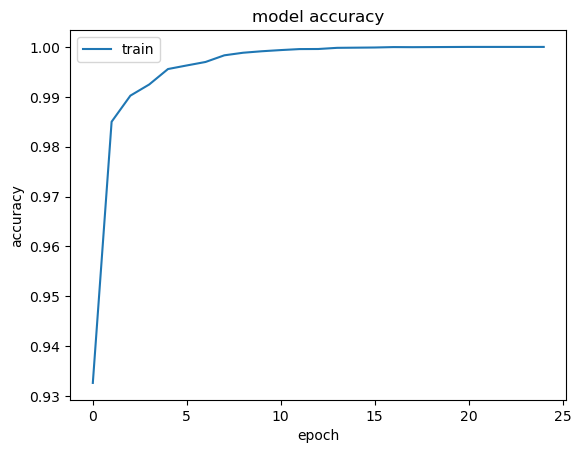

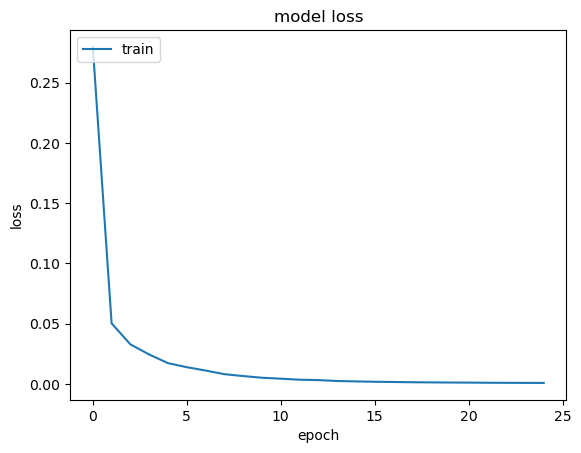

313/313 [==============================] - 2s 5ms/step - loss: 0.0304 - accuracy: 0.9913
> 99.130
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0012 - accuracy: 0.9999
> 99.995


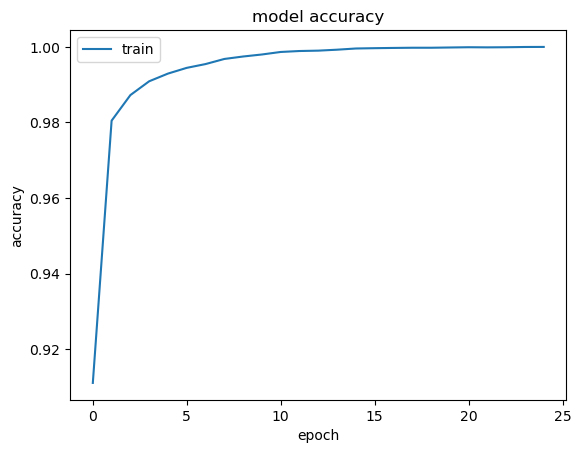

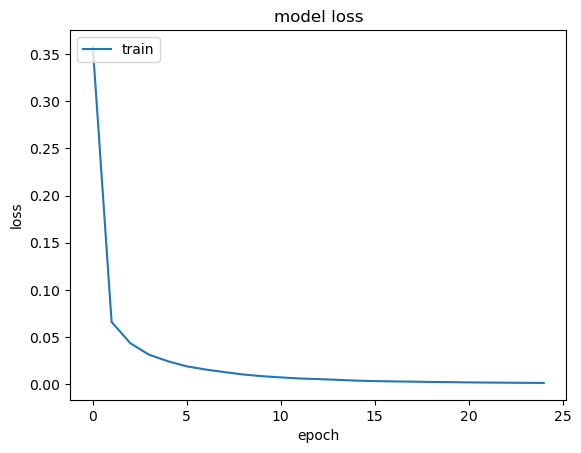

313/313 [==============================] - 2s 5ms/step - loss: 0.0275 - accuracy: 0.9900
> 99.000
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0040 - accuracy: 0.9998
> 99.978


2023-04-15 23:47:28.766102: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape ingradient_tape/model_71/conv2d_935/ta_lu_15/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


313/313 [==============================] - 2s 6ms/step - loss: 0.0309 - accuracy: 0.9914
> 99.140
1875/1875 [==============================] - 10s 5ms/step - loss: 4.9717e-04 - accuracy: 1.0000
> 100.000


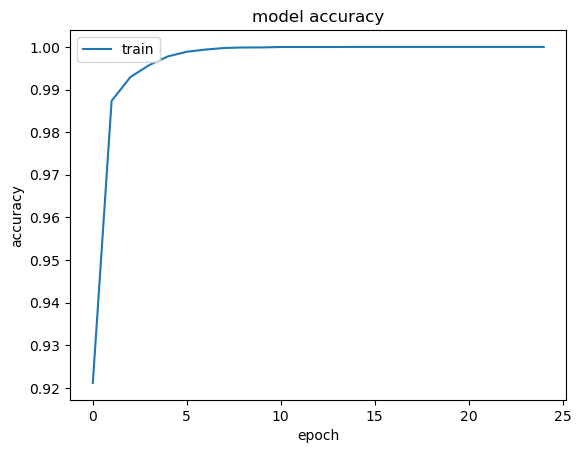

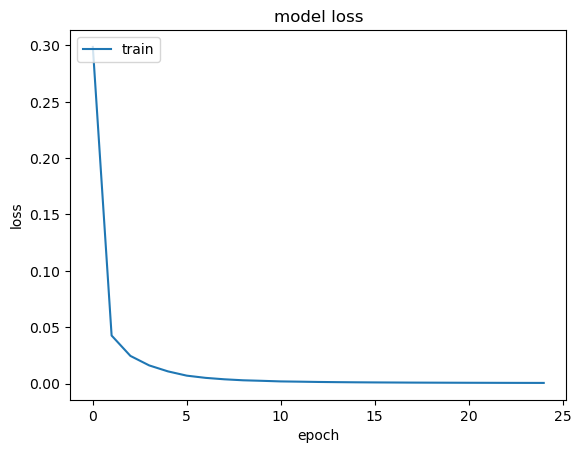

In [21]:
# run the test harness for evaluating a model
def run_test_harness(act):
    # load dataset
    trainX, trainY, testX, testY = load_dataset(d='mnist')
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # define model
    model = define_model_mnist_batch_res(act)
    opt = SGD(lr=0.01, decay=0.0001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy',  metrics=['accuracy'])
    # fit model
    history=model.fit(trainX, trainY, epochs=25, batch_size=512, verbose=0)
    _, acc = model.evaluate(testX, testY, verbose=1)
    print('> %.3f' % (acc * 100.0))
    _, acc2 = model.evaluate(trainX, trainY, verbose=1)
    print('> %.3f' % (acc2 * 100.0))
    # save model
    #model.save('final_model.h5')
    return model,history, acc

hist = []
accuracy = []
act = [tf.keras.activations.swish, tf.keras.activations.gelu, tf.keras.layers.LeakyReLU(alpha=0.1), 'relu', 'elu', 'selu', 'softplus', 'softsign', TaLU(alpha=0.0, trainable=True)]
#act = [TaLU(alpha=0.0, trainable=True)]
for i in act:
    # entry point, run the test harness
    model, history, acc = run_test_harness(act=i)
    hist.append(history)
    accuracy.append(acc)
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    #plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    #plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()